# HOUSING: PRICE PREDICTION
### Problem Statement:
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market
and there are various companies working in the domain. Data science comes as a very important tool to solve problems
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling,
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing
companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file
below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest
in them or not. For this company wants to know:
• Which variables are important to predict the price of variable?
• How do these variables describe the price of the house?
#### Business Goal:
You are required to model the price of houses with the available independent variables. This model will then be used
by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the
management to understand the pricing dynamics of a new market.
#### Technical Requirements:
• Data contains 1460 entries each having 81 variables.
• Data contains Null values. You need to treat them using the domain knowledge and your own understanding.
• Extensive EDA has to be performed to gain relationships of important variable and price.
• Data contains numerical as well as categorical variable. You need to handle them accordingly.
• You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper
Parameters.
• You need to find important features which affect the price positively or negatively.
• Two datasets are being provided to you (test.csv, train.csv). You will train on train.csv dataset and predict on
test.csv file.
The “Data file.csv” and “Data description.txt” are enclosed with this file

# Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis

In [2]:
#Setting option to show max rows and max columns
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", None)

### Loading Data

In [3]:
test=pd.read_csv('housing_test.csv')
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4         Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            9            5       2005   
1       Norm   TwnhsE     1Story            8            5       1984   
2       Norm     1Fam     1Story            8            5       2001   
3       Norm     1Fam     2Story            7            7       1941   
4       Norm     1Fam     2Story            6            5       2007   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1          1984     Gable  CompShg     HdBoard     HdBoard       None   
2          2001       Hip  CompShg     VinylSd     VinylSd       None   
3          1950     Gable  CompShg     MetalSd     MetalSd       None   
4          2007     Gable  CompShg     VinylSd     VinylSd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       200.0        Gd        TA      PConc       Ex       TA           Gd   
1         0.0        Gd        TA     CBlock       Gd       TA           Av   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3         0.0        TA        TA     CBlock       TA       TA           No   
4        74.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ        1249          Unf           0        673         1922   
1          GLQ        1036          Unf           0        184         1220   
2          Unf           0          Unf           0       1753         1753   
3          Rec         275          Unf           0        429          704   
4          Unf           0          Unf           0        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr      1922         0             0   
1    GasA        Gd          Y      SBrkr      1360         0             0   
2    GasA        Ex          Y      SBrkr      1788         0             0   
3    GasA        Ex          Y      SBrkr       860       704             0   
4    GasA        Ex          Y      SBrkr       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           1          Gd   
1             1          Gd             4        Typ           1          Ex   
2             1          Ex             7        Typ           1          TA   
3             1          Fa  

In [4]:
train=pd.read_csv('housing_train.csv')
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA       

### Shape of data

In [5]:
print(test.shape, train.shape)

(292, 80) (1168, 81)


### Data Types

In [6]:
test .dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [7]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


### Data Info

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

### Checking Duplicates

In [10]:
## Checking for duplicates on train data
train.duplicated().sum()

0

In [11]:
## Checking for duplicates on train data
test.duplicated().sum()

0

#### We dont have any duplicates for both train and test data

### Checking for Null values

In [12]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [13]:
test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

##### We have a lot of null values. we need to handle them

# Data Cleaning

In [14]:
# We will drop 'ID' column for both train and test data as it has no relavance in predicting target variable
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

### Handling Null values

In [15]:
# We will drop the column with high null values for both train and test data
train.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], axis=1, inplace=True)
test.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], axis=1, inplace=True)

In [16]:
null_column=train.columns[train.isnull().any()]
null_column

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

In [17]:
for i in null_column:
    print(i,'\n', train[i].unique())

LotFrontage 
 [ nan  95.  92. 105.  58.  88.  70.  80.  50.  44. 129.  59.  55.  64.
  24.  68.  71.  74.  61.  60. 120.  84. 141.  30.  65.  76. 100.  85.
  75. 107. 122.  82.  62.  73.  79.  77.  41.  69.  90.  96.  72.  34.
  78.  63.  40.  98. 160. 108. 128.  51.  81.  99.  66.  37. 174.  87.
  53. 152.  47.  86.  56.  89.  35.  52.  21. 104.  57.  83.  46. 101.
 112. 149.  93.  49.  43. 130.  54.  91.  67.  97. 110. 103. 115.  94.
  48.  36. 313. 109. 144. 121. 102. 116. 182.  32.  42. 168. 118.  38.
 140. 134. 114. 124.  39. 111.  45. 106. 153.]
MasVnrType 
 ['None' 'BrkFace' 'Stone' 'BrkCmn' nan]
MasVnrArea 
 [0.000e+00 4.800e+02 1.260e+02 1.800e+02 6.700e+01 2.230e+02 6.600e+01
 8.200e+01 1.740e+02 3.040e+02 1.720e+02 1.660e+02 1.840e+02 3.500e+02
 4.120e+02 1.000e+00 1.890e+02 1.120e+02 5.000e+01 2.200e+02 1.600e+01
 6.300e+02 2.810e+02 2.870e+02 3.400e+02 2.160e+02       nan 1.400e+02
 1.830e+02 3.360e+02 3.960e+02 2.320e+02 3.200e+02 8.500e+01 1.620e+02
 1.540e+02 1.760e+02 

In [18]:
train['GarageYrBlt'].fillna(train['YearBuilt'],inplace=True)
test['GarageYrBlt'].fillna(test['YearBuilt'],inplace=True)

In [19]:
train['GarageYrBlt'].unique()

array([1977., 1970., 1997., 2006., 1957., 1965., 1947., 1937., 2003.,
       1974., 1955., 1923., 2002., 2007., 1987., 2001., 1988., 1950.,
       1961., 1953., 2010., 1922., 1939., 2005., 1991., 1979., 1975.,
       1976., 1978., 1960., 1956., 2004., 1982., 2000., 1948., 1946.,
       1964., 1920., 1930., 1968., 1992., 1936., 1967., 1989., 1959.,
       1935., 1966., 1931., 1916., 1941., 1998., 1962., 1926., 1925.,
       1983., 1999., 1969., 1985., 1993., 2008., 1971., 1980., 1945.,
       1995., 1981., 1994., 1949., 1940., 1996., 1921., 1924., 1963.,
       1938., 1910., 1958., 1911., 1990., 1954., 1927., 2009., 1986.,
       1929., 1984., 1973., 1900., 1942., 1951., 1972., 1934., 1932.,
       1928., 1918., 1908., 1914., 1933., 1875., 1906., 1952., 1915.,
       1912.])

In [20]:
null=train.columns[train.isnull().any()]
null

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

In [21]:
#replacing missing values in for numerical culumns with their mean value

# for train data
for i in null:
    if train[i].dtypes!='O':
        train[i].fillna(train[i].mean(),inplace=True)

# for test data        
for i in null:
    if test[i].dtypes!='O':
        test[i].fillna(test[i].mean(),inplace=True)

In [22]:
#replacing missing values in for categorical culumns with their mode value

# for train data
for i in null:
    if train[i].dtypes=='O':
        train[i].fillna(train[i].mode()[0],inplace=True)

# for test data        
for i in null:
    if test[i].dtypes=='O':
        test[i].fillna(test[i].mode()[0],inplace=True)

In [23]:
train.isnull().sum().sum()

0

In [24]:
test.isnull().sum().sum()

1

#### we have 1 column with null value in it for our test data

In [25]:
test.columns[test.isnull().any()]


Index(['Electrical'], dtype='object')

In [26]:
test['Electrical'].unique()

array(['SBrkr', 'FuseA', 'FuseP', nan, 'FuseF'], dtype=object)

In [27]:
test['Electrical'].fillna(test['Electrical'].mode()[0],inplace=True)

In [28]:
test.isnull().sum().sum()

0

#### We have no null value left in our both test and train data

 ## Replacing whitespaces if any

In [29]:
train.replace([' ','  '], ['',''], inplace=True)
test.replace([' ','  '], ['',''], inplace=True)

In [30]:
train.isnull().sum().sum()

0

In [31]:
test.isnull().sum().sum()

0

##### We dont have any whitespaces in both train and test data

### Statistical Analysis

In [32]:
train.describe().T

count           mean           std      min        25%  \
MSSubClass     1168.0      56.767979     41.940650     20.0      20.00   
LotFrontage    1168.0      70.988470     22.437056     21.0      60.00   
LotArea        1168.0   10484.749144   8957.442311   1300.0    7621.50   
OverallQual    1168.0       6.104452      1.390153      1.0       5.00   
OverallCond    1168.0       5.595890      1.124343      1.0       5.00   
YearBuilt      1168.0    1970.930651     30.145255   1875.0    1954.00   
YearRemodAdd   1168.0    1984.758562     20.785185   1950.0    1966.00   
MasVnrArea     1168.0     102.310078    182.047152      0.0       0.00   
BsmtFinSF1     1168.0     444.726027    462.664785      0.0       0.00   
BsmtFinSF2     1168.0      46.647260    163.520016      0.0       0.00   
BsmtUnfSF      1168.0     569.721747    449.375525      0.0     216.00   
TotalBsmtSF    1168.0    1061.095034    442.272249      0.0     799.00   
1stFlrSF       1168.0    1169.860445    391.161983    334.0     892.00   
2ndFlrSF       1168.0     348.826199    439.696370      0.0       0.00   
LowQualFinSF   1168.0       6.380137     50.892844      0.0       0.00   
GrLivArea      1168.0    1525.066781    528.042957    334.0    1143.25   
BsmtFullBath   1168.0       0.425514      0.521615      0.0       0.00   
BsmtHalfBath   1168.0       0.055651      0.236699      0.0       0.00   
FullBath       1168.0       1.562500      0.551882      0.0       1.00   
HalfBath       1168.0       0.388699      0.504929      0.0       0.00   
BedroomAbvGr   1168.0       2.884418      0.817229      0.0       2.00   
KitchenAbvGr   1168.0       1.045377      0.216292      0.0       1.00   
TotRmsAbvGrd   1168.0       6.542808      1.598484      2.0       5.00   
Fireplaces     1168.0       0.617295      0.650575      0.0       0.00   
GarageYrBlt    1168.0    1976.287671     26.376864   1875.0    1959.00   
GarageCars     1168.0       1.776541      0.745554      0.0       1.00   
GarageArea     1168.0     476.860445    214.466769      0.0     338.00   
WoodDeckSF     1168.0      96.206336    126.158988      0.0       0.00   
OpenPorchSF    1168.0      46.559932     66.381023      0.0       0.00   
EnclosedPorch  1168.0      23.015411     63.191089      0.0       0.00   
3SsnPorch      1168.0       3.639555     29.088867      0.0       0.00   
ScreenPorch    1168.0      15.051370     55.080816      0.0       0.00   
PoolArea       1168.0       3.448630     44.896939      0.0       0.00   
MiscVal        1168.0      47.315068    543.264432      0.0       0.00   
MoSold         1168.0       6.344178      2.686352      1.0       5.00   
YrSold         1168.0    2007.804795      1.329738   2006.0    2007.00   
SalePrice      1168.0  181477.005993  79105.586863  34900.0  130375.00   

                        50%        75%       max  
MSSubClass         50.00000      70.00     190.0  
LotFrontage        70.98847      79.25     313.0  
LotArea          9522.50000   11515.50  164660.0  
OverallQual         6.00000       7.00      10.0  
OverallCond         5.00000       6.00       9.0  
YearBuilt        1972.00000    2000.00    2010.0  
YearRemodAdd     1993.00000    2004.00    2010.0  
MasVnrArea          0.00000     160.00    1600.0  
BsmtFinSF1        385.50000     714.50    5644.0  
BsmtFinSF2          0.00000       0.00    1474.0  
BsmtUnfSF         474.00000     816.00    2336.0  
TotalBsmtSF      1005.50000    1291.50    6110.0  
1stFlrSF         1096.50000    1392.00    4692.0  
2ndFlrSF            0.00000     729.00    2065.0  
LowQualFinSF        0.00000       0.00     572.0  
GrLivArea        1468.50000    1795.00    5642.0  
BsmtFullBath        0.00000       1.00       3.0  
BsmtHalfBath        0.00000       0.00       2.0  
FullBath            2.00000       2.00       3.0  
HalfBath            0.00000       1.00       2.0  
BedroomAbvGr        3.00000       3.00       8.0  
KitchenAbvGr        1.00000       1.00       3.0  
TotRmsAbvGrd        6.00000   

In [33]:
test.describe().T

count          mean           std     min      25%  \
MSSubClass     292.0     57.414384     43.780649    20.0    20.00   
LotFrontage    292.0     66.425101     19.975962    21.0    57.75   
LotArea        292.0  10645.143836  13330.669795  1526.0  7200.00   
OverallQual    292.0      6.078767      1.356147     3.0     5.00   
OverallCond    292.0      5.493151      1.063267     3.0     5.00   
YearBuilt      292.0   1972.616438     30.447016  1872.0  1954.00   
YearRemodAdd   292.0   1985.294521     20.105792  1950.0  1968.00   
MasVnrArea     292.0    109.171821    174.729023     0.0     0.00   
BsmtFinSF1     292.0    439.294521    429.559675     0.0     0.00   
BsmtFinSF2     292.0     46.157534    152.467119     0.0     0.00   
BsmtUnfSF      292.0    557.315068    411.043768     0.0   255.00   
TotalBsmtSF    292.0   1042.767123    424.561153     0.0   771.75   
1stFlrSF       292.0   1133.691781    366.941919   372.0   858.00   
2ndFlrSF       292.0    339.657534    424.278825     0.0     0.00   
LowQualFinSF   292.0      3.702055     38.219527     0.0     0.00   
GrLivArea      292.0   1477.051370    514.199429   520.0  1061.50   
BsmtFullBath   292.0      0.424658      0.508831     0.0     0.00   
BsmtHalfBath   292.0      0.065068      0.247070     0.0     0.00   
FullBath       292.0      1.575342      0.547856     0.0     1.00   
HalfBath       292.0      0.359589      0.494795     0.0     0.00   
BedroomAbvGr   292.0      2.794521      0.807336     0.0     2.00   
KitchenAbvGr   292.0      1.051370      0.236160     1.0     1.00   
TotRmsAbvGrd   292.0      6.417808      1.728105     3.0     5.00   
Fireplaces     292.0      0.595890      0.621259     0.0     0.00   
GarageYrBlt    292.0   1977.386986     26.050656  1872.0  1962.00   
GarageCars     292.0      1.729452      0.754430     0.0     1.00   
GarageArea     292.0    457.458904    210.785591     0.0   300.00   
WoodDeckSF     292.0     86.397260    121.898836     0.0     0.00   
OpenPorchSF    292.0     47.061644     65.865449     0.0     0.00   
EnclosedPorch  292.0     17.708904     51.892906     0.0     0.00   
3SsnPorch      292.0      2.489726     30.247488     0.0     0.00   
ScreenPorch    292.0     15.099315     58.483473     0.0     0.00   
PoolArea       292.0      0.000000      0.000000     0.0     0.00   
MiscVal        292.0     28.184932    224.036218     0.0     0.00   
MoSold         292.0      6.232877      2.774556     1.0     4.00   
YrSold         292.0   2007.859589      1.322867  2006.0  2007.00   

                       50%       75%       max  
MSSubClass       50.000000     70.00     190.0  
LotFrontage      66.425101     76.00     150.0  
LotArea        9200.000000  11658.75  215245.0  
OverallQual       6.000000      7.00      10.0  
OverallCond       5.000000      6.00       9.0  
YearBuilt      1976.000000   2001.00    2009.0  
YearRemodAdd   1994.000000   2003.25    2010.0  
MasVnrArea        0.000000    180.00    1031.0  
BsmtFinSF1      369.500000    700.50    1767.0  
BsmtFinSF2        0.000000      0.00    1085.0  
BsmtUnfSF       487.000000    780.00    1935.0  
TotalBsmtSF     971.000000   1322.00    3094.0  
1stFlrSF       1047.500000   1370.50    2402.0  
2ndFlrSF          0.000000    717.00    1589.0  
LowQualFinSF      0.000000      0.00     479.0  
GrLivArea      1440.000000   1720.25    3447.0  
BsmtFullBath      0.000000      1.00       2.0  
BsmtHalfBath      0.000000      0.00       1.0  
FullBath          2.000000      2.00       3.0  
HalfBath          0.000000      1.00       2.0  
BedroomAbvGr      3.000000      3.00       6.0  
KitchenAbvGr      1.000000      1.00       3.0  
TotRmsAbvGrd      6.000000      7.00      12.0  
Fireplaces        1.000000      1.00       2.0  
GarageYrBlt    1978.000000   2002.00    2010.0  
GarageCars        2.000000      2.00       4.0  
GarageArea      467.500000    569.75    1052.0  
WoodDeckSF        0.000000    149.25     728.0  
OpenPorchSF      28.500000     66.00    

# Data Visualisation and graphical analysis

In [34]:
train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0         120       RL     70.98847     4928   Pave      IR1         Lvl   
1          20       RL     95.00000    15865   Pave      IR1         Lvl   
2          60       RL     92.00000     9920   Pave      IR1         Lvl   
3          20       RL    105.00000    11751   Pave      IR1         Lvl   
4          20       RL     70.98847    16635   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      NPkVill       Norm       Norm   TwnhsE   
1    AllPub    Inside       Mod        NAmes       Norm       Norm     1Fam   
2    AllPub   CulDSac       Gtl      NoRidge       Norm       Norm     1Fam   
3    AllPub    Inside       Gtl       NWAmes       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl       NWAmes       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     1Story            6            5       1976          1976     Gable   
1     1Story            8            6       1970          1970      Flat   
2     2Story            7            5       1996          1997     Gable   
3     1Story            6            6       1977          1977       Hip   
4     1Story            6            7       1977          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     Plywood     Plywood       None         0.0        TA        TA   
1  Tar&Grv     Wd Sdng     Wd Sdng       None         0.0        Gd        Gd   
2  CompShg     MetalSd     MetalSd       None         0.0        Gd        TA   
3  CompShg     Plywood     Plywood    BrkFace       480.0        TA        TA   
4  CompShg     CemntBd     CmentBd      Stone       126.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0     CBlock       Gd       TA           No          ALQ         120   
1      PConc       TA       Gd           Gd          ALQ         351   
2      PConc       Gd       TA           Av          GLQ         862   
3     CBlock       Gd       TA           No          BLQ         705   
4     CBlock       Gd       TA           No          ALQ        1246   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        958         1078    GasA        TA   
1          Rec         823       1043         2217    GasA        Ex   
2          Unf           0        255         1117    GasA        Ex   
3          Unf           0       1139         1844    GasA        Ex   
4          Unf           0        356         1602    GasA        Gd   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       958         0             0        958   
1          Y      SBrkr      2217         0             0       2217   
2          Y      SBrkr      1127       886             0       2013   
3          Y      SBrkr      1844         0             0       1844   
4          Y      SBrkr      1602         0             0       1602   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             0             0         2         0             2             1   
1             1             0         2         0             4             1   
2             1             0         2         1             3             1   
3             0             0         2         0             3             1   
4             0             1         2         0             3             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          TA             5        Typ           1     Attchd       1977.0   
1          Gd             8        Typ           1     Attchd       1970.0   
2          TA             8        Typ           1     Attchd       1997.0   
3          TA          

#### We will use pie chart for all the categorical columns

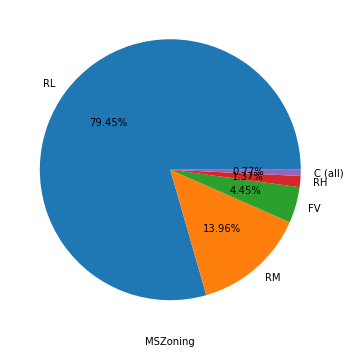

<Figure size 432x288 with 0 Axes>

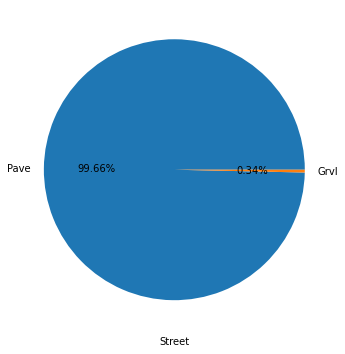

<Figure size 432x288 with 0 Axes>

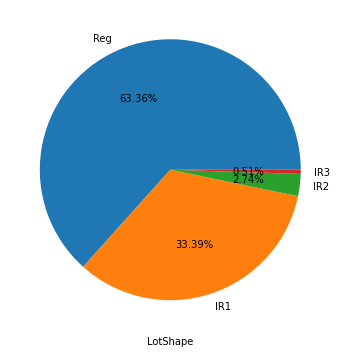

<Figure size 432x288 with 0 Axes>

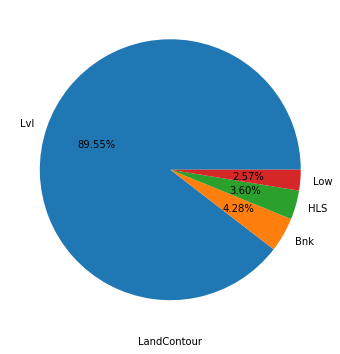

<Figure size 432x288 with 0 Axes>

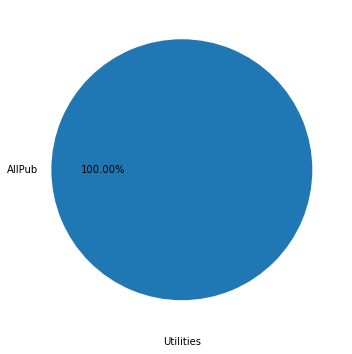

<Figure size 432x288 with 0 Axes>

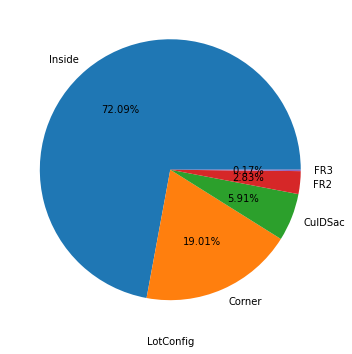

<Figure size 432x288 with 0 Axes>

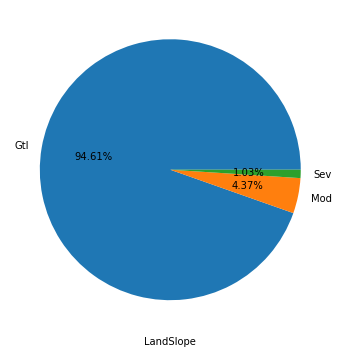

<Figure size 432x288 with 0 Axes>

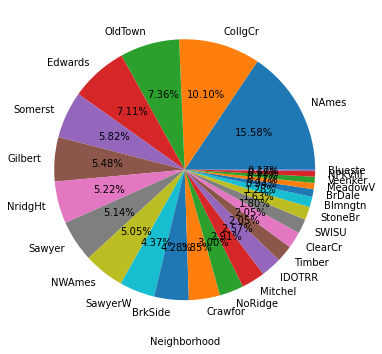

<Figure size 432x288 with 0 Axes>

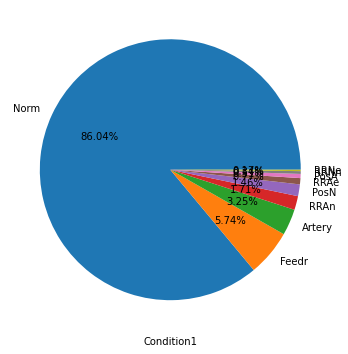

<Figure size 432x288 with 0 Axes>

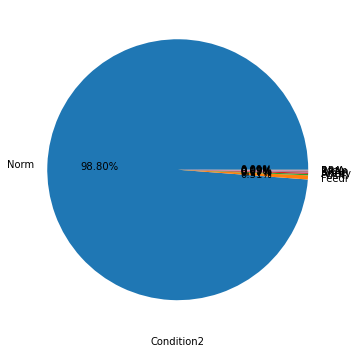

<Figure size 432x288 with 0 Axes>

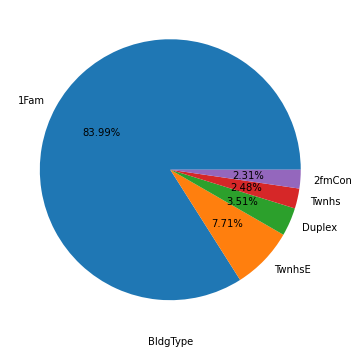

<Figure size 432x288 with 0 Axes>

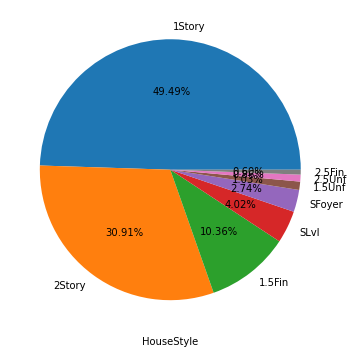

<Figure size 432x288 with 0 Axes>

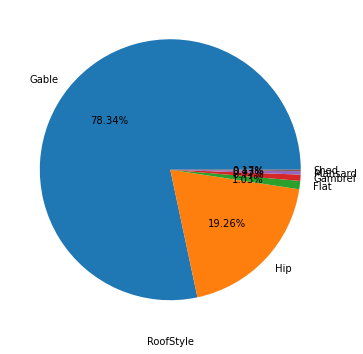

<Figure size 432x288 with 0 Axes>

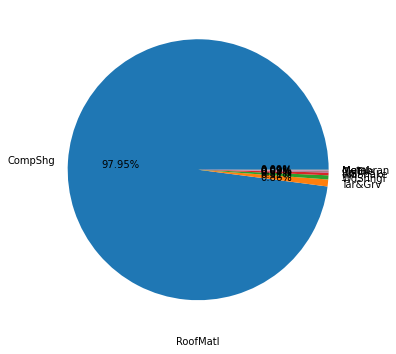

<Figure size 432x288 with 0 Axes>

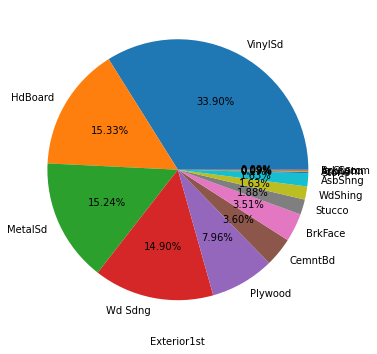

<Figure size 432x288 with 0 Axes>

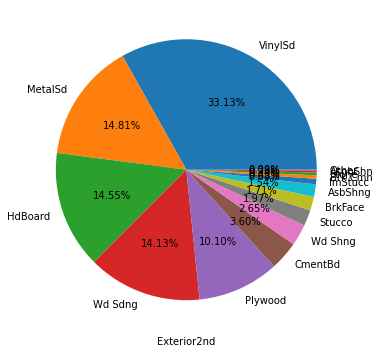

<Figure size 432x288 with 0 Axes>

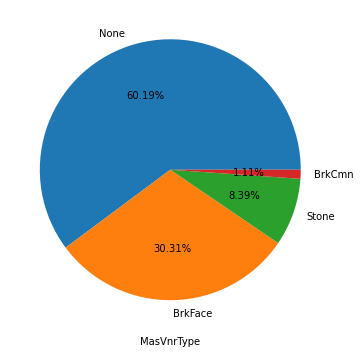

<Figure size 432x288 with 0 Axes>

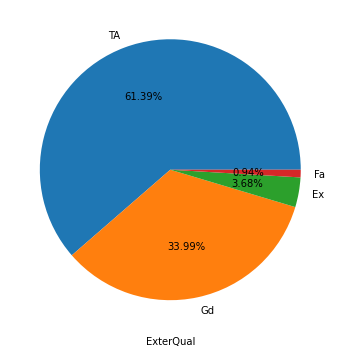

<Figure size 432x288 with 0 Axes>

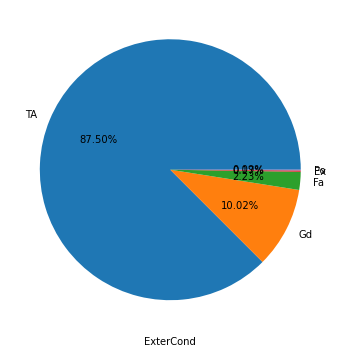

<Figure size 432x288 with 0 Axes>

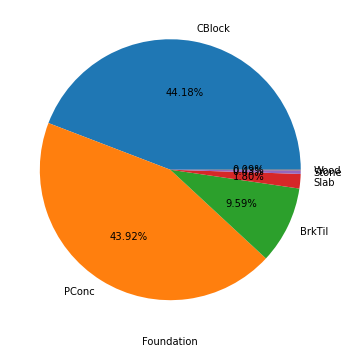

<Figure size 432x288 with 0 Axes>

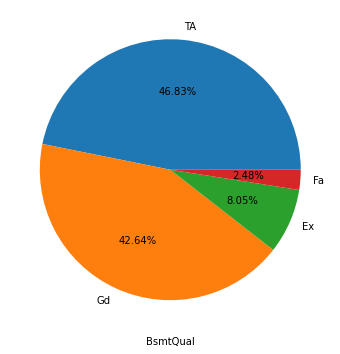

<Figure size 432x288 with 0 Axes>

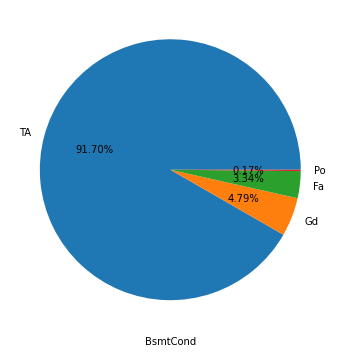

<Figure size 432x288 with 0 Axes>

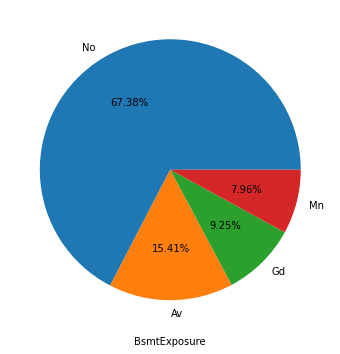

<Figure size 432x288 with 0 Axes>

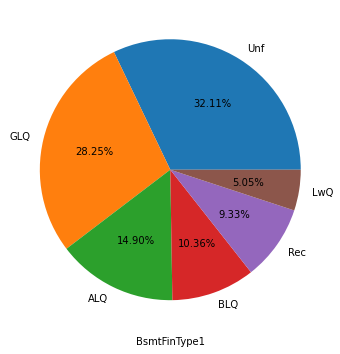

<Figure size 432x288 with 0 Axes>

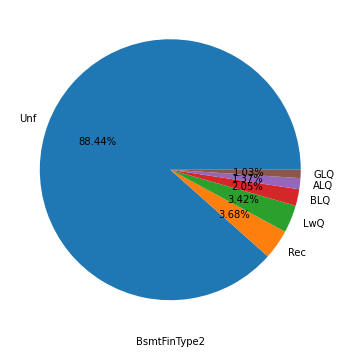

<Figure size 432x288 with 0 Axes>

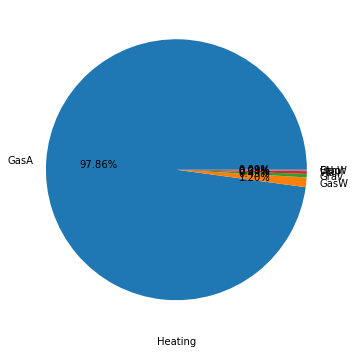

<Figure size 432x288 with 0 Axes>

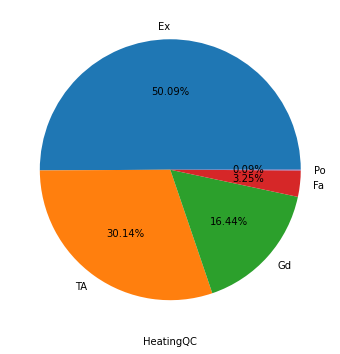

<Figure size 432x288 with 0 Axes>

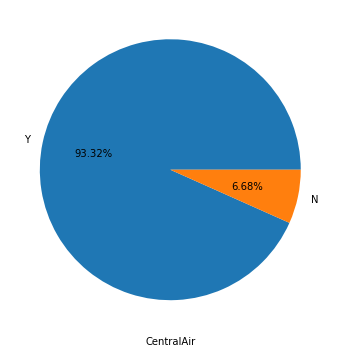

<Figure size 432x288 with 0 Axes>

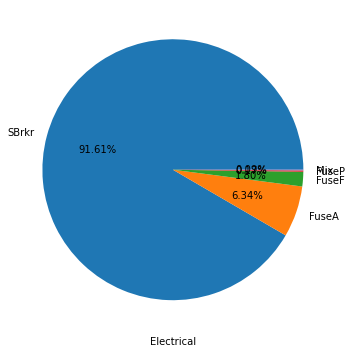

<Figure size 432x288 with 0 Axes>

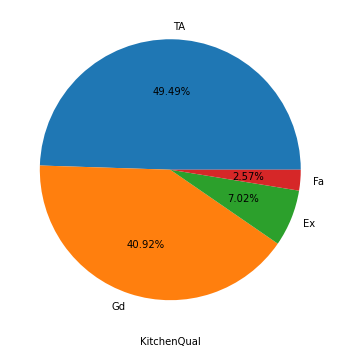

<Figure size 432x288 with 0 Axes>

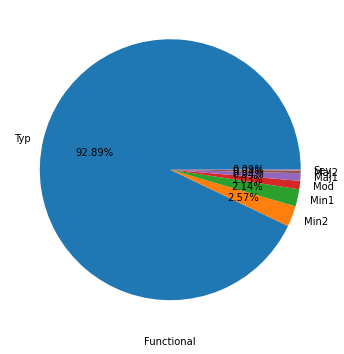

<Figure size 432x288 with 0 Axes>

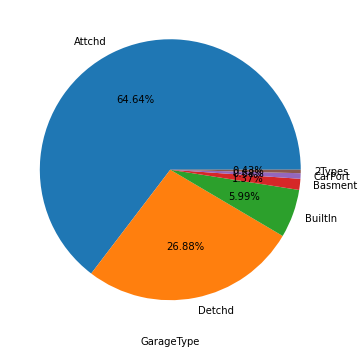

<Figure size 432x288 with 0 Axes>

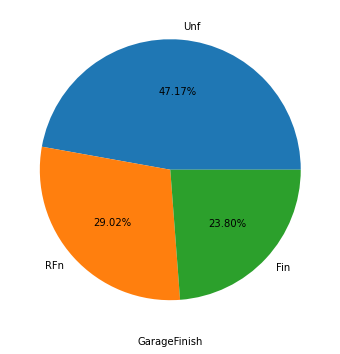

<Figure size 432x288 with 0 Axes>

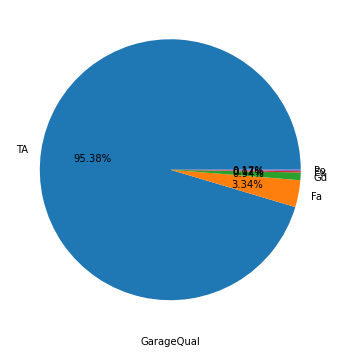

<Figure size 432x288 with 0 Axes>

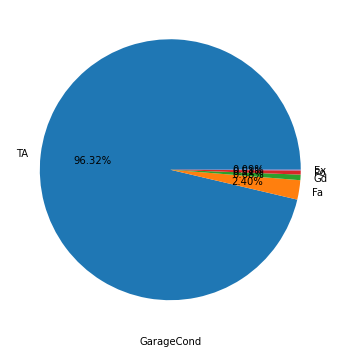

<Figure size 432x288 with 0 Axes>

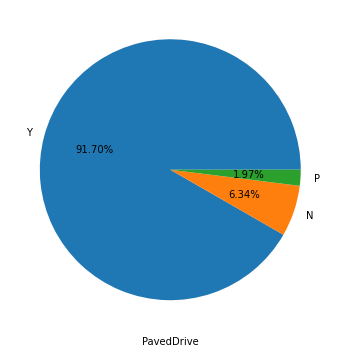

<Figure size 432x288 with 0 Axes>

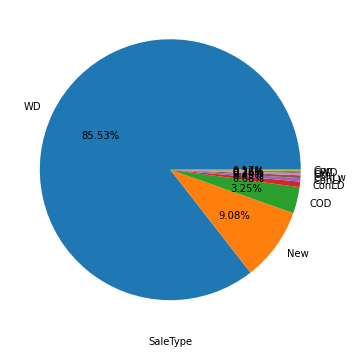

<Figure size 432x288 with 0 Axes>

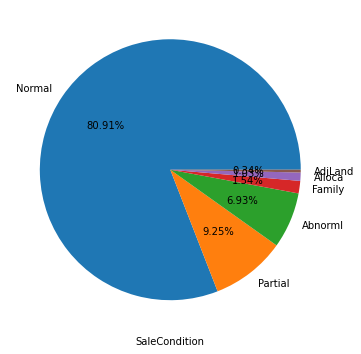

<Figure size 432x288 with 0 Axes>

In [35]:
#Ploting pie chart for evry subject
for i in train:
    if train[i].dtypes=='O':
        plt.figure(figsize=(6,6))
        train[i].value_counts().plot.pie(autopct='%.2f%%')
        plt.xlabel(i)
        plt.ylabel('')
        plt.figure()

##### We have drop utilities column because is has only one value for all rows

In [36]:
train.drop('Utilities', axis=1, inplace=True)

In [37]:
test.drop('Utilities', axis=1, inplace=True)

#### Ploting Histogram for numerical column

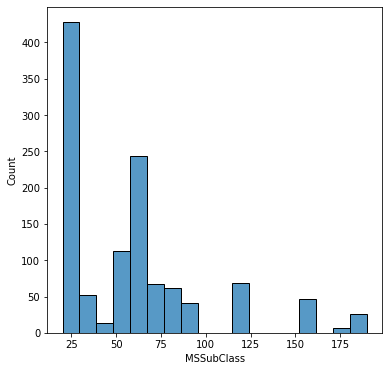

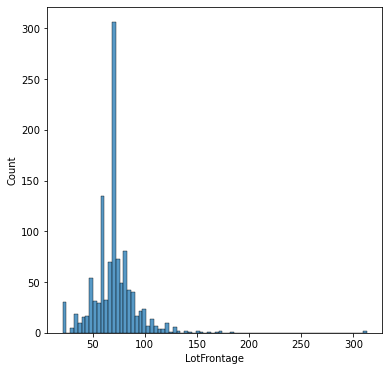

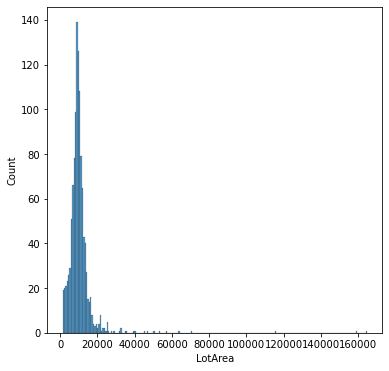

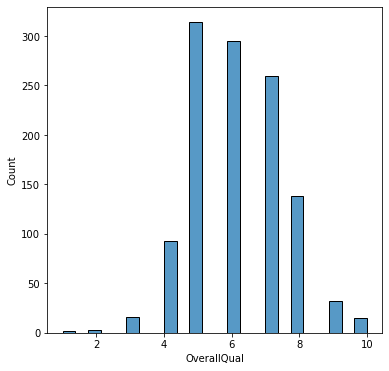

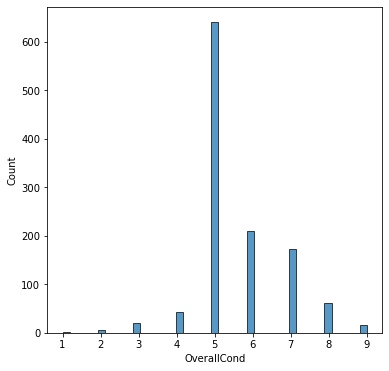

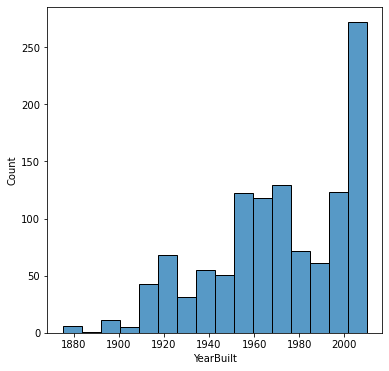

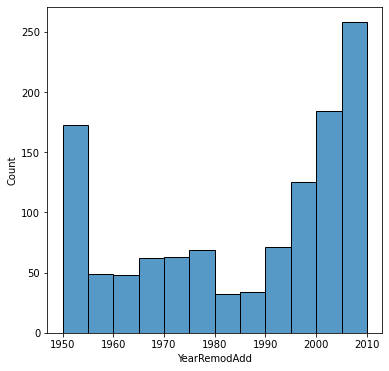

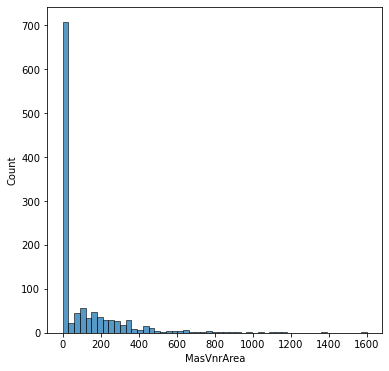

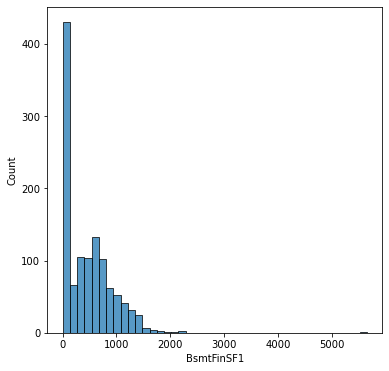

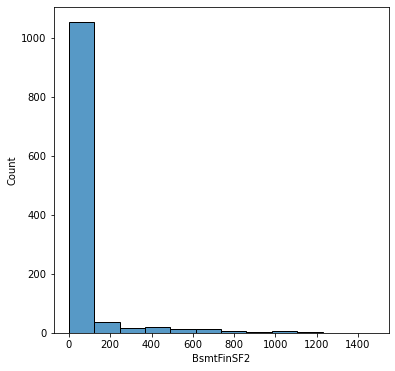

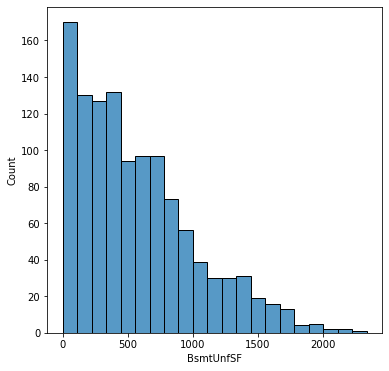

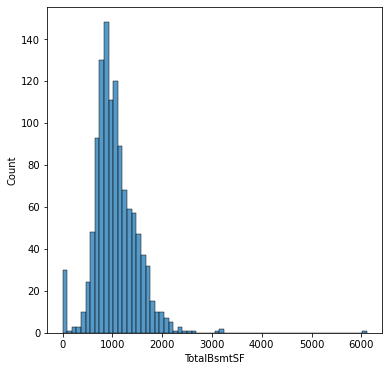

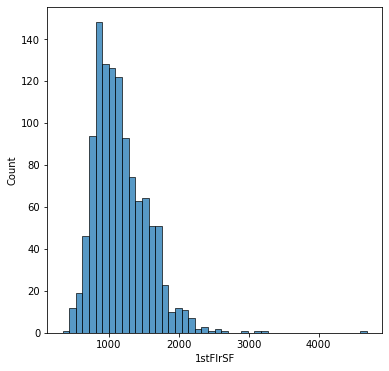

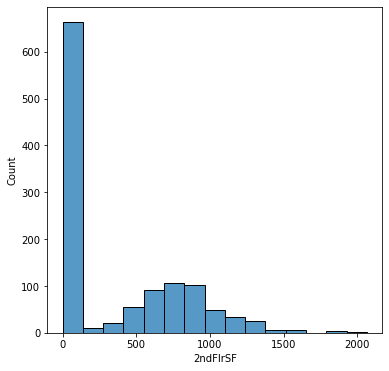

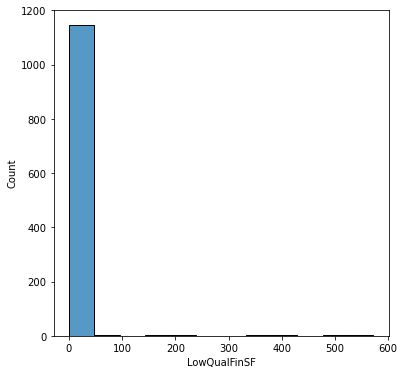

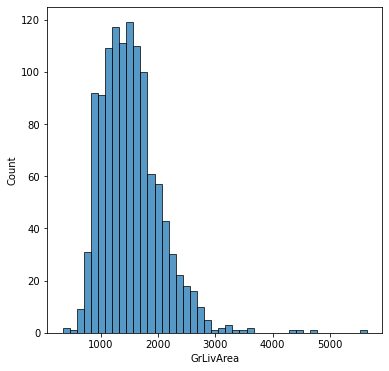

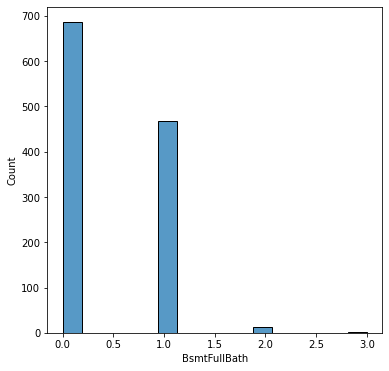

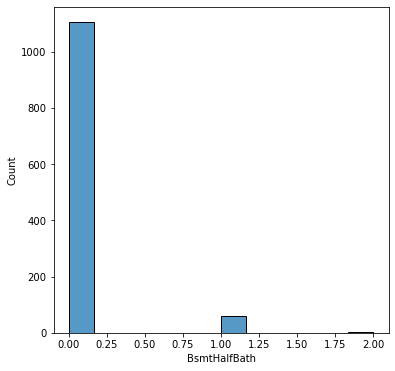

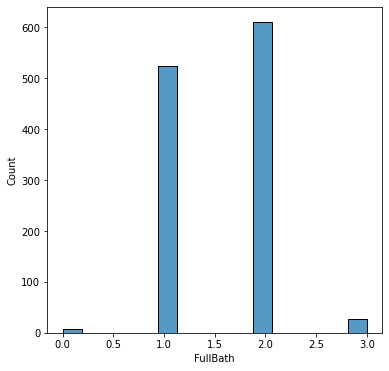

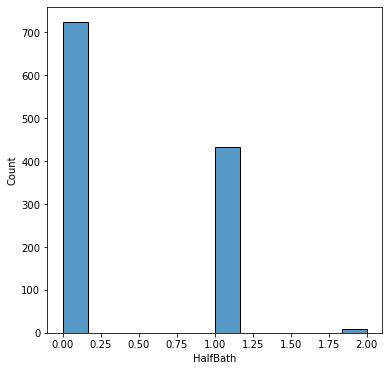

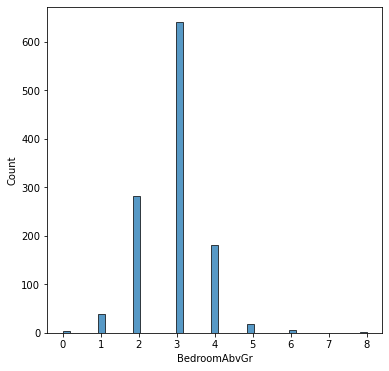

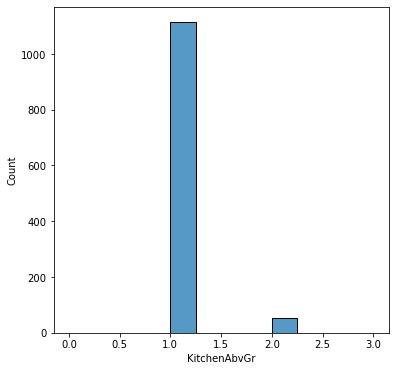

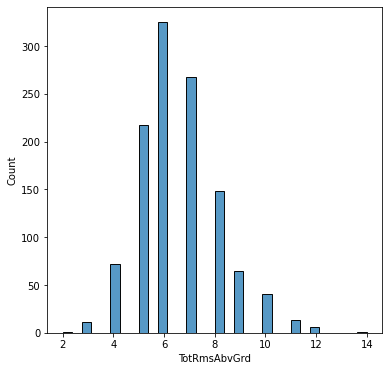

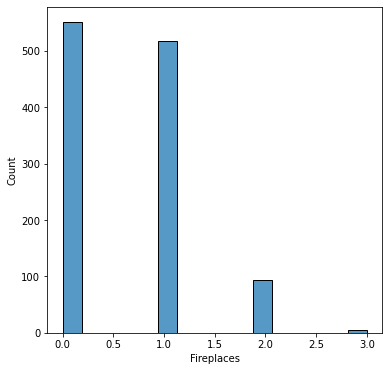

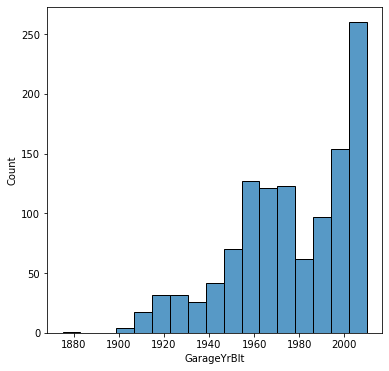

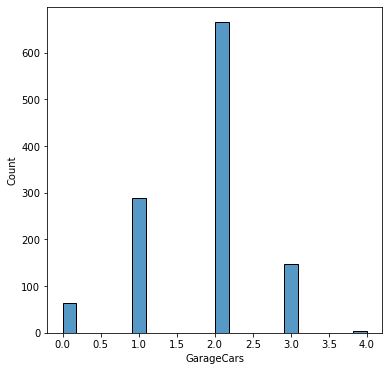

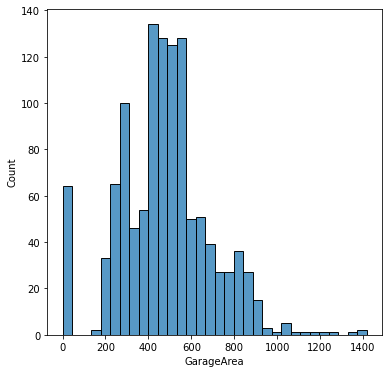

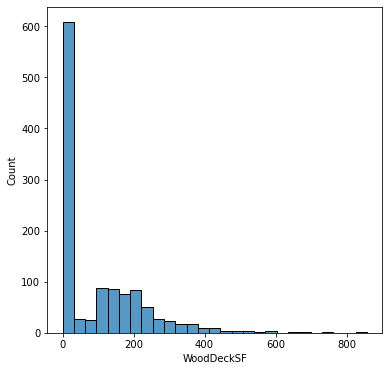

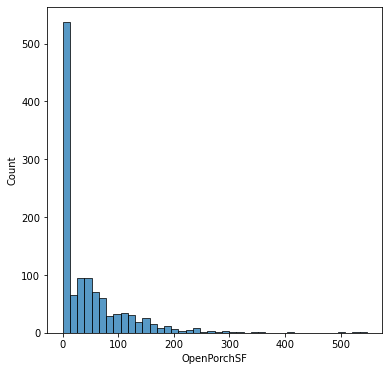

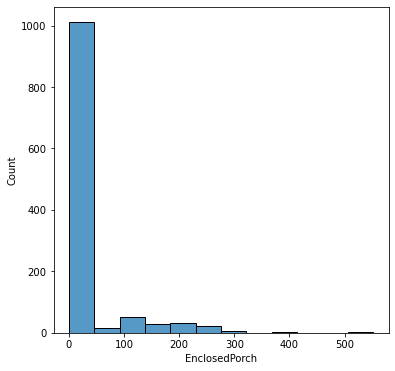

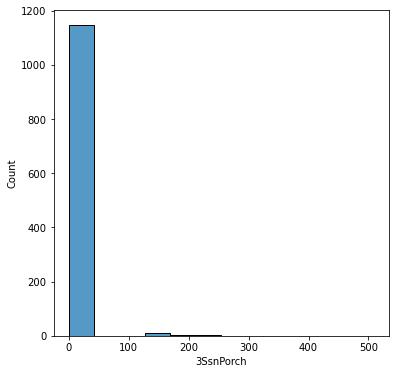

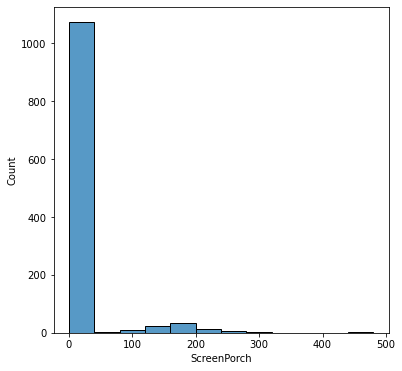

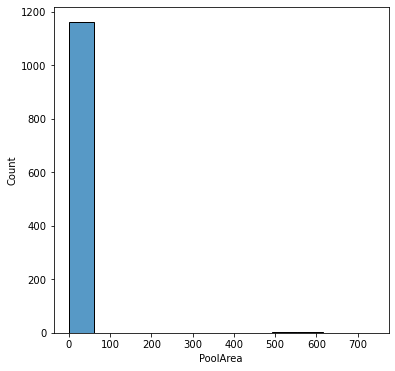

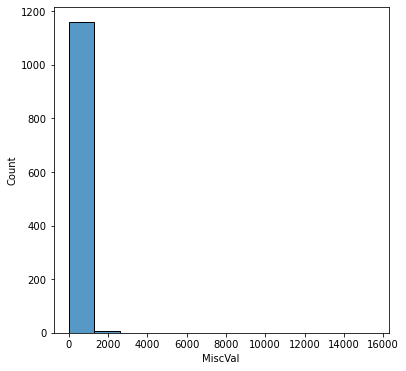

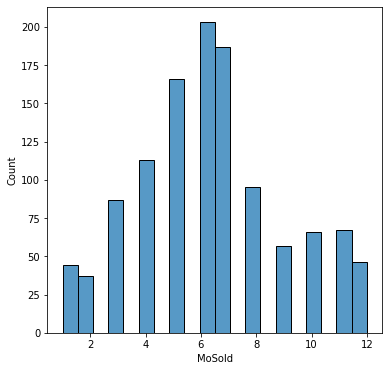

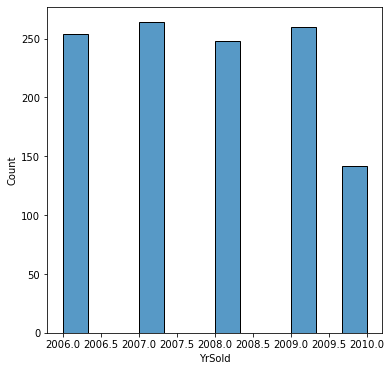

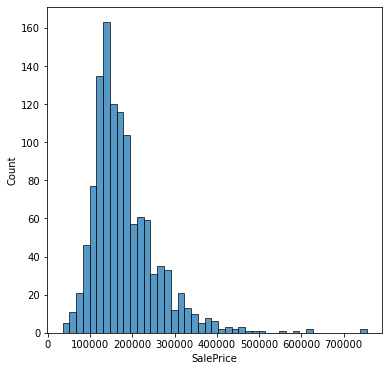

In [38]:
for i in train:
    if train[i].dtypes!='O':
        plt.figure(figsize=(6,6))
        sns.histplot(train[i])

### Bi-variate Analysis

#### For Categorical Columns

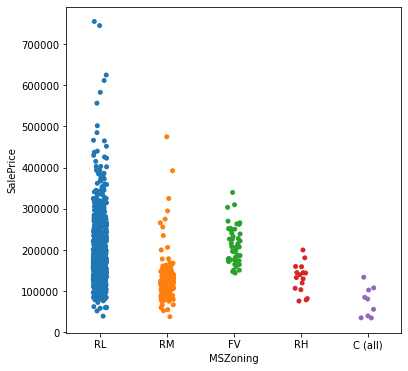

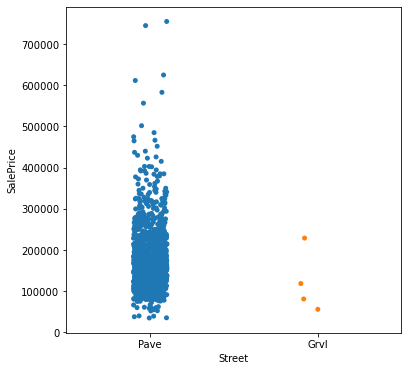

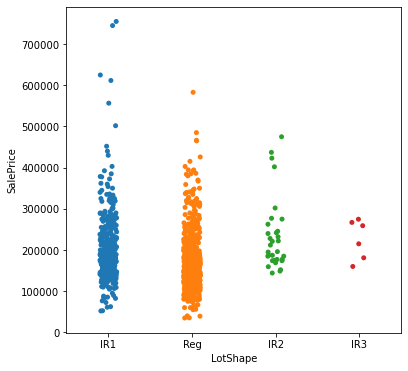

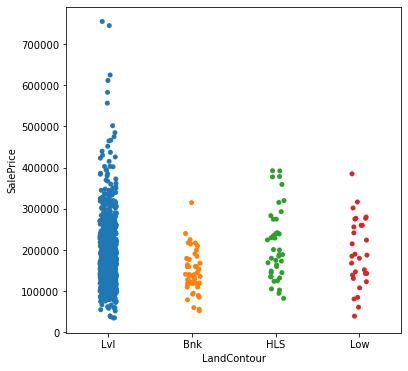

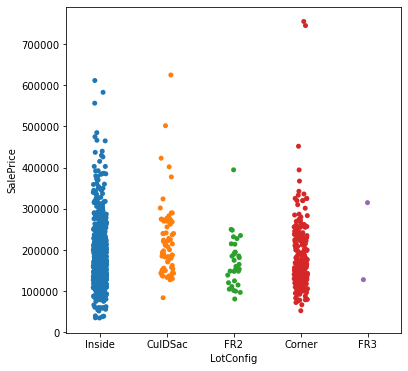

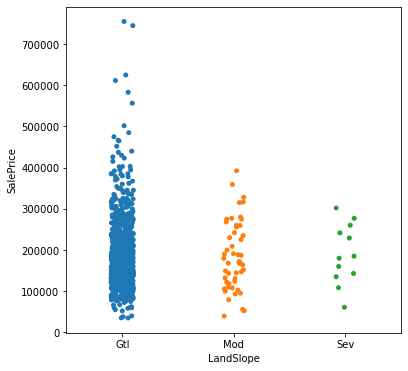

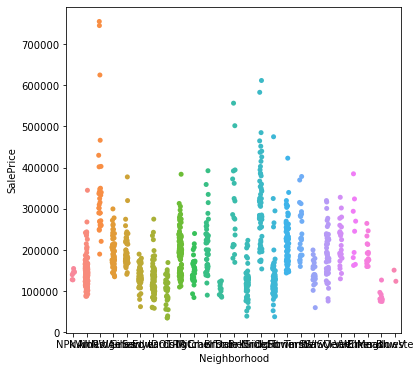

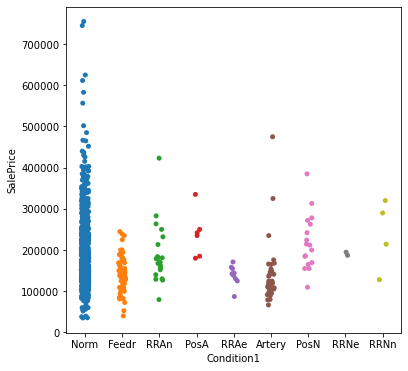

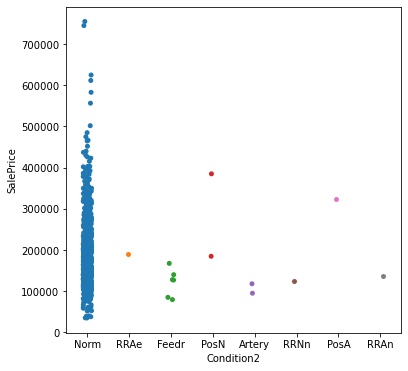

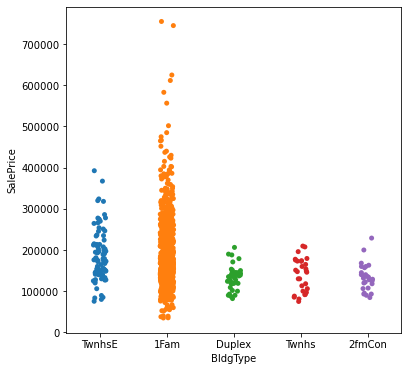

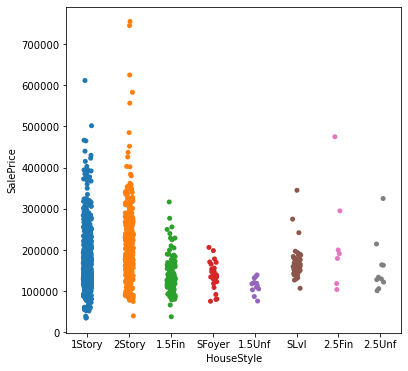

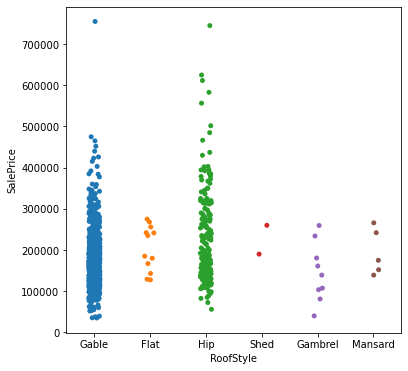

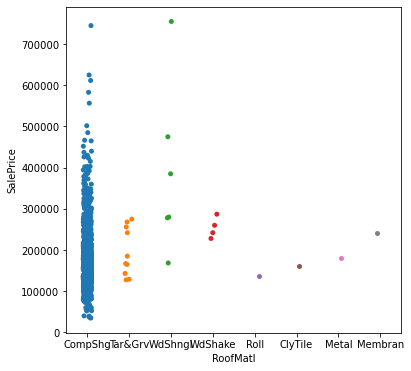

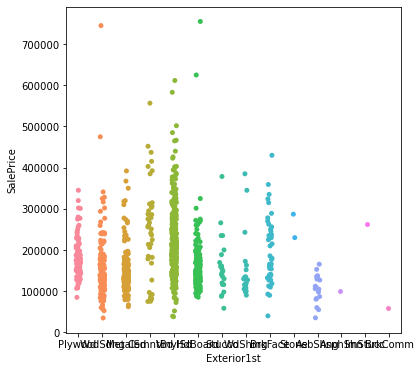

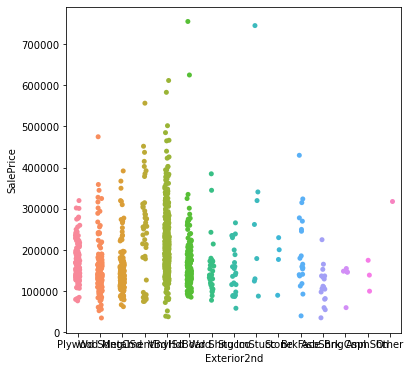

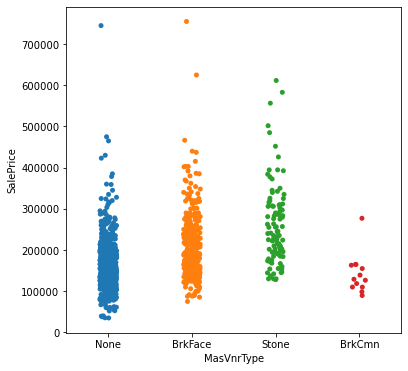

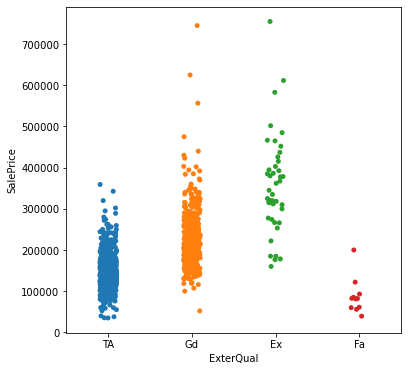

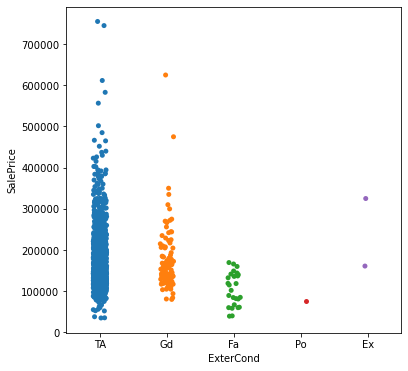

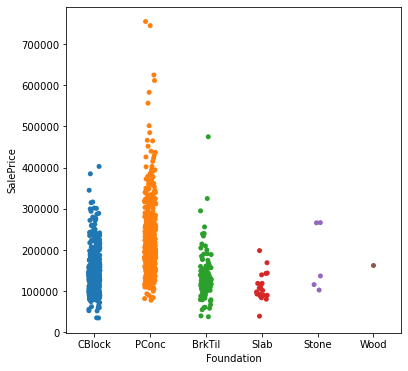

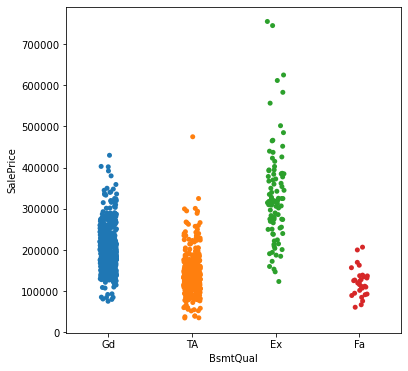

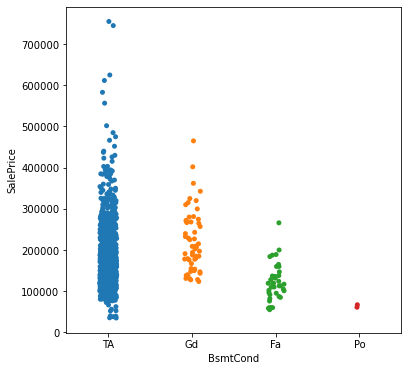

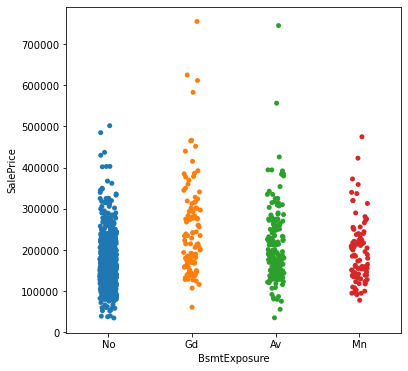

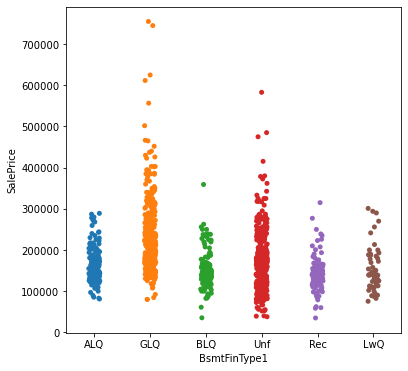

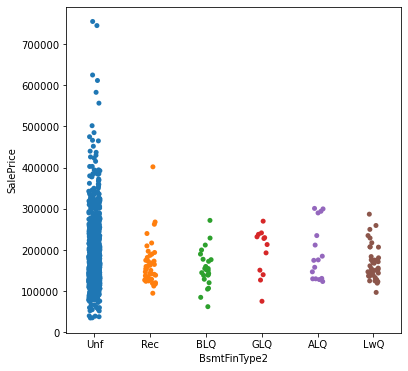

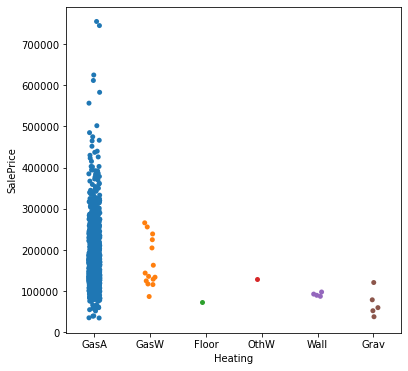

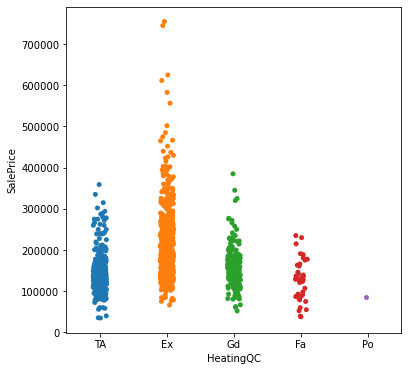

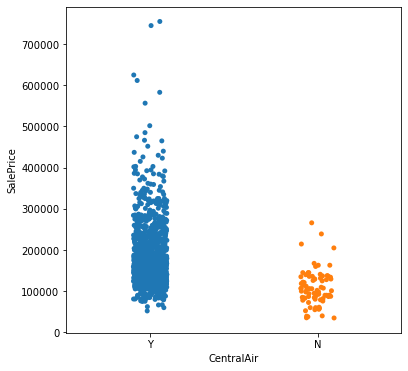

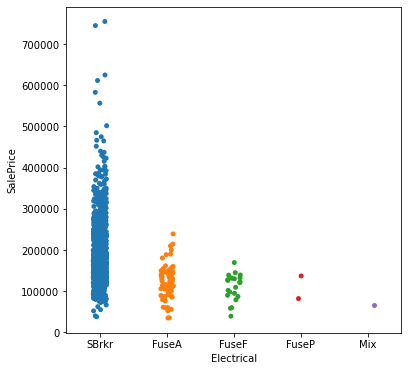

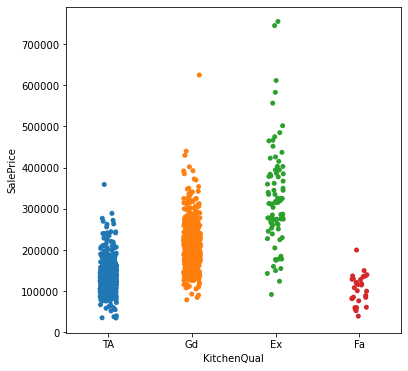

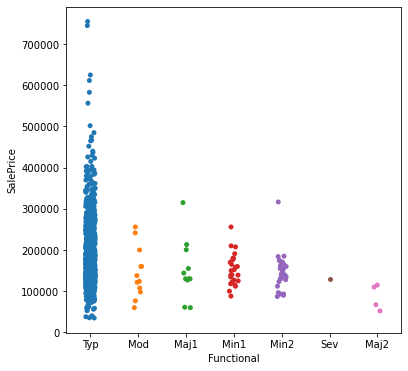

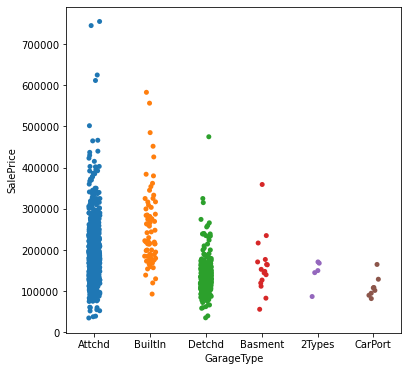

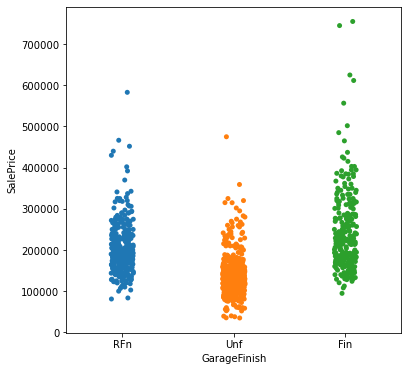

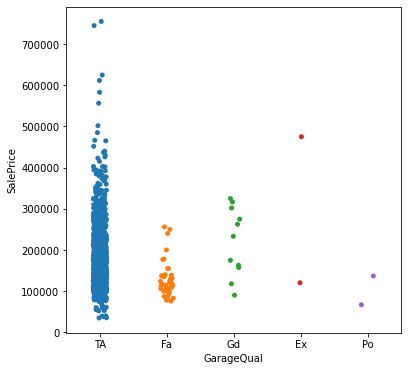

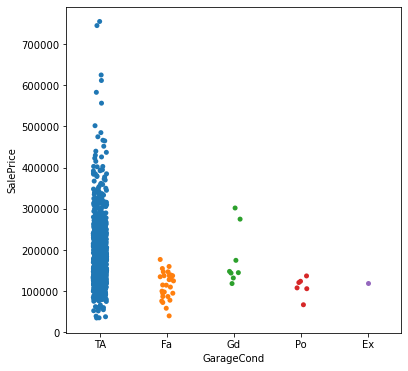

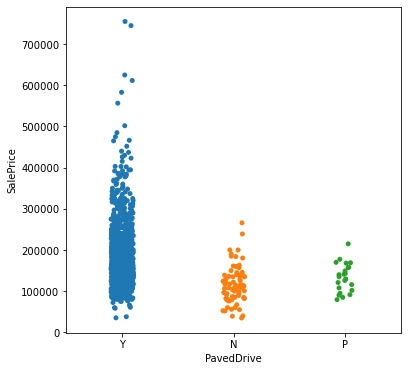

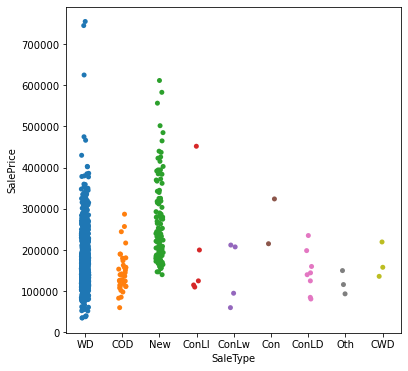

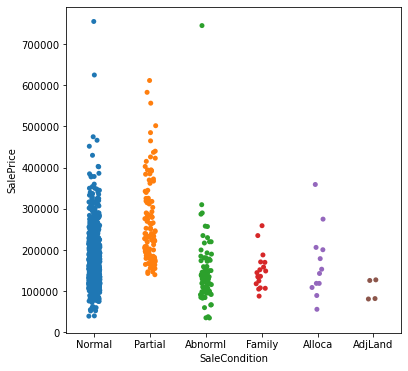

In [39]:
for i in train:
    if train[i].dtypes=='O':
        plt.figure(figsize=(6,6))
        sns.stripplot(x=i,y='SalePrice',data=train)
        plt.show()

#### For numerical column

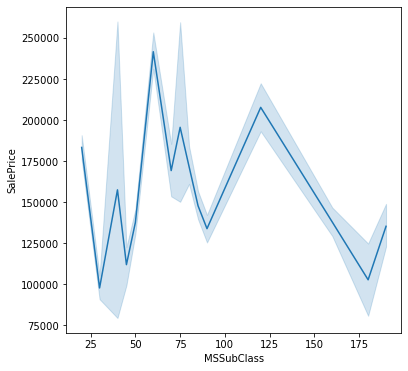

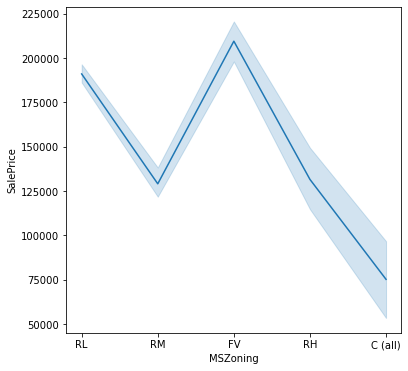

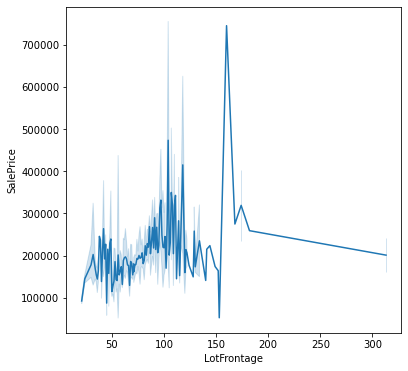

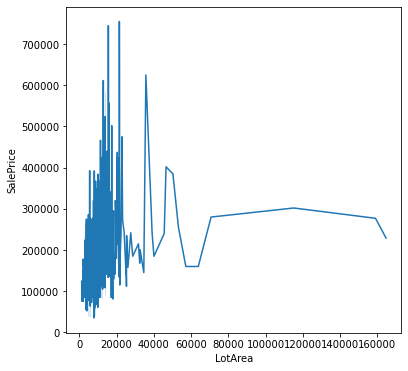

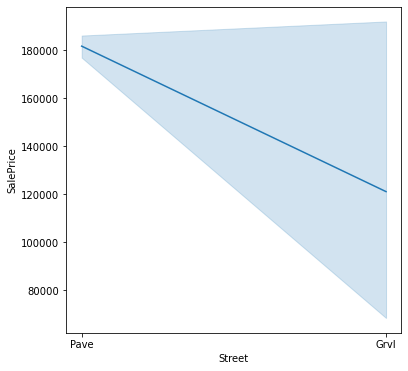

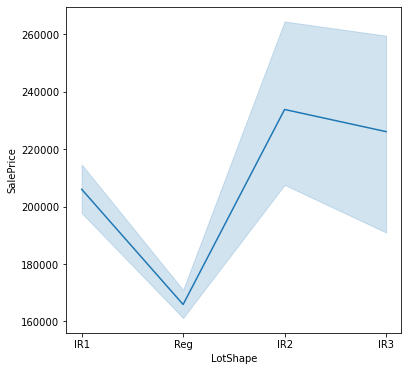

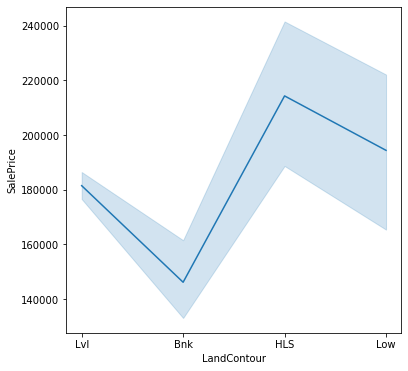

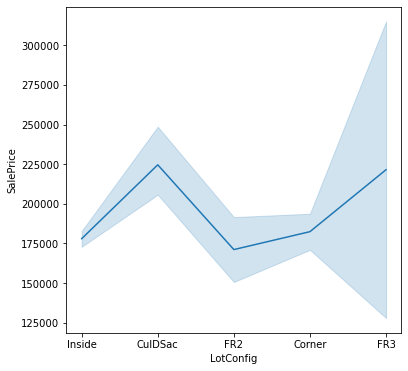

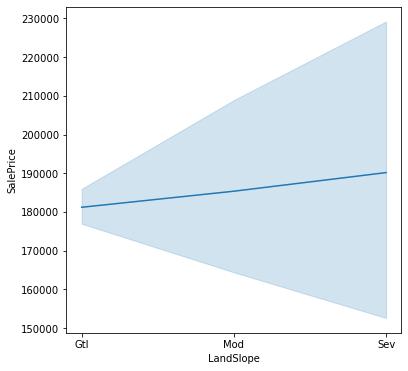

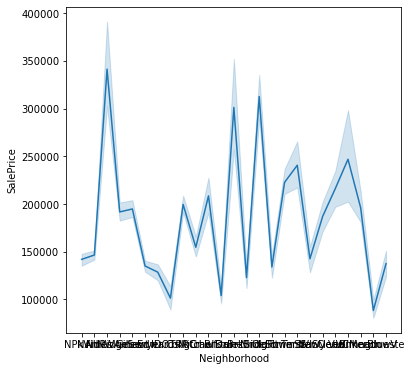

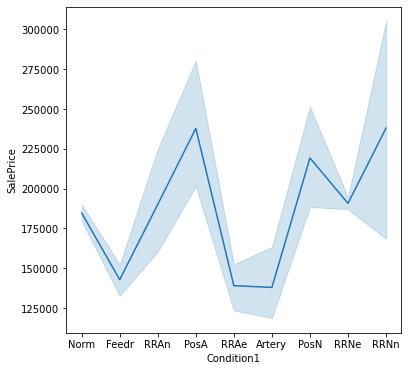

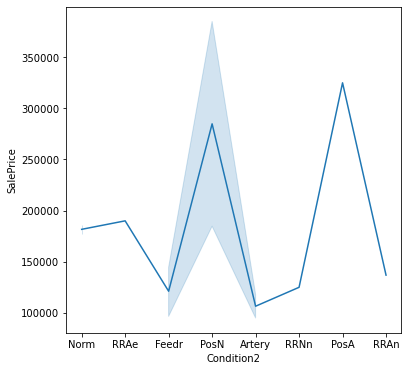

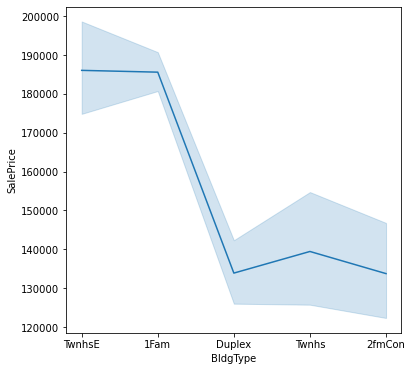

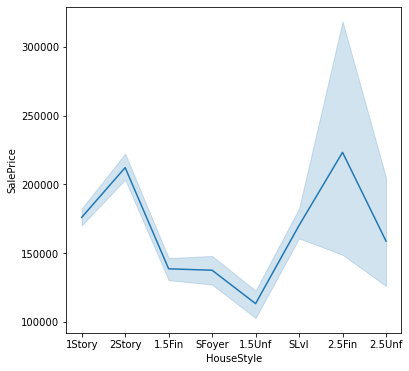

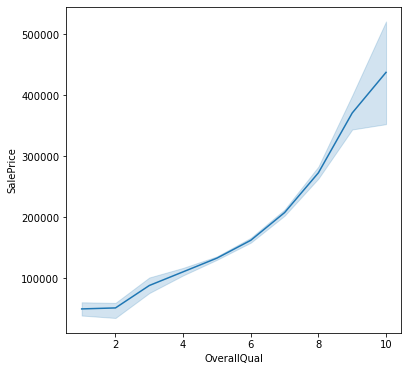

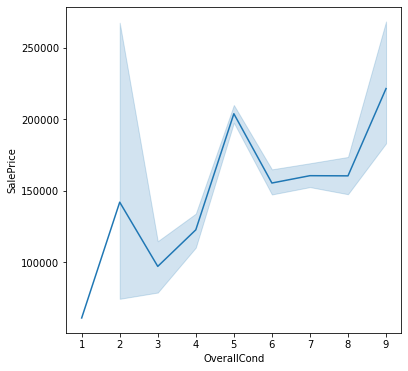

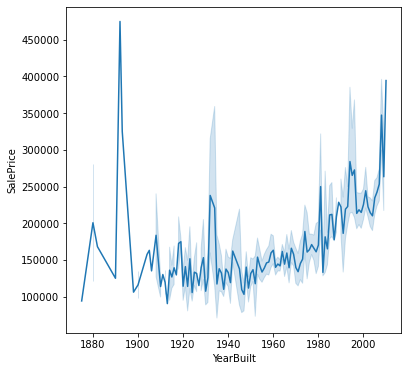

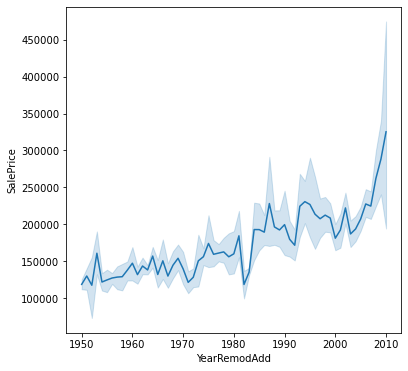

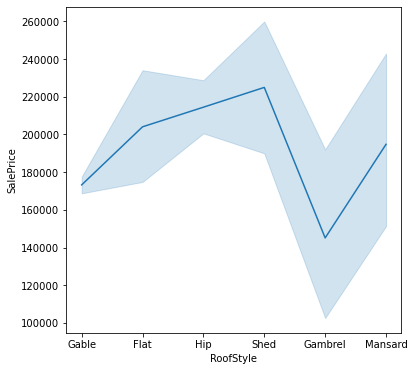

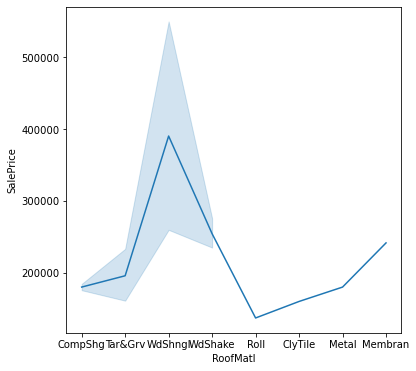

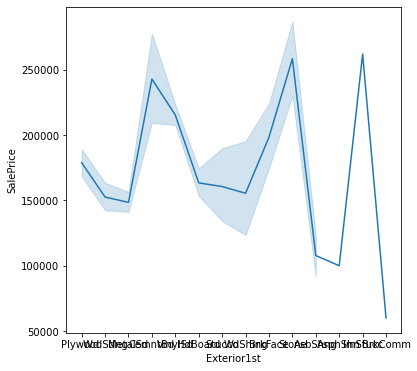

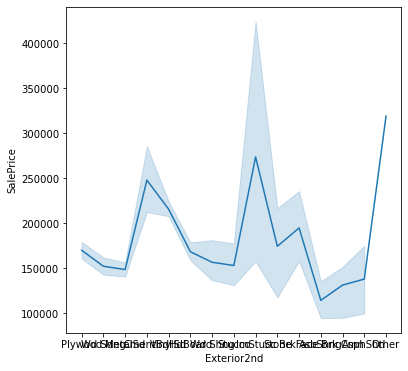

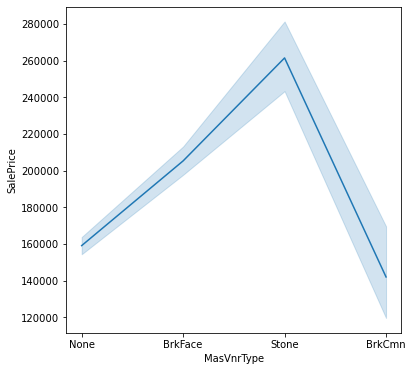

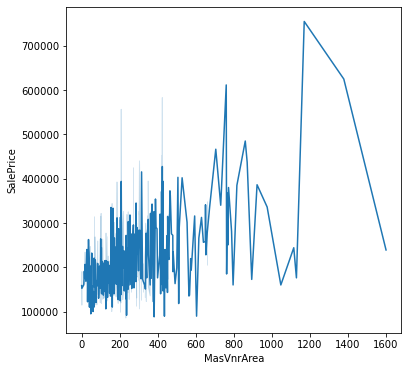

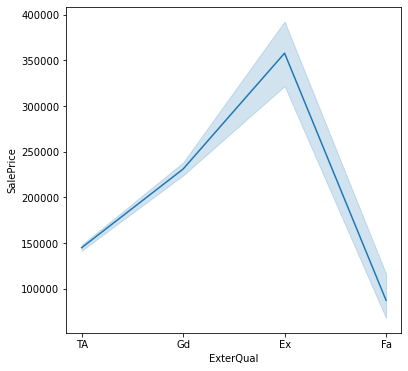

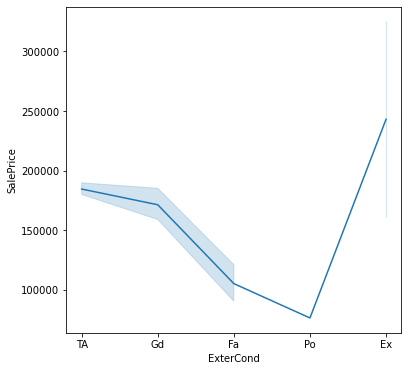

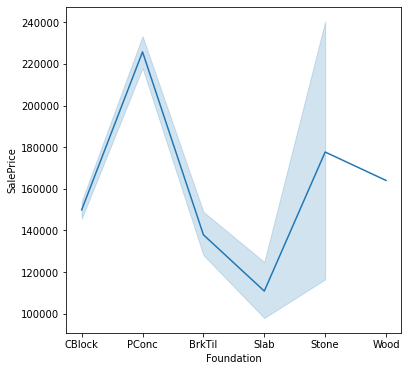

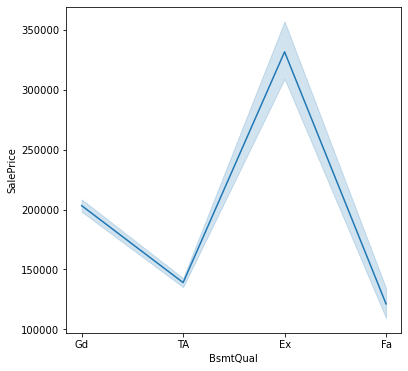

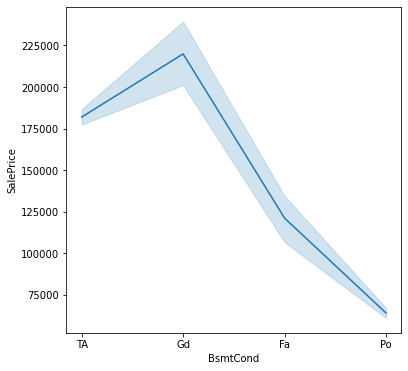

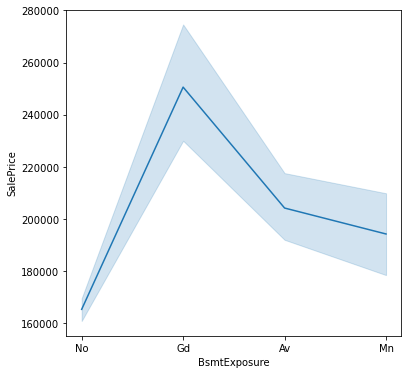

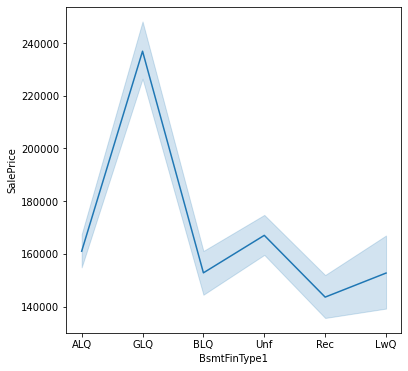

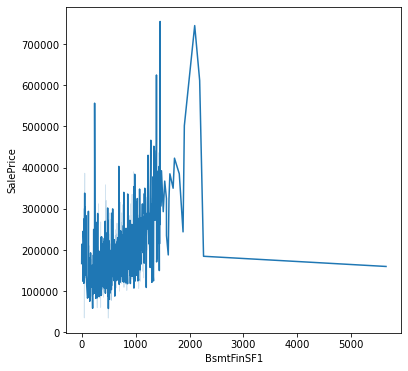

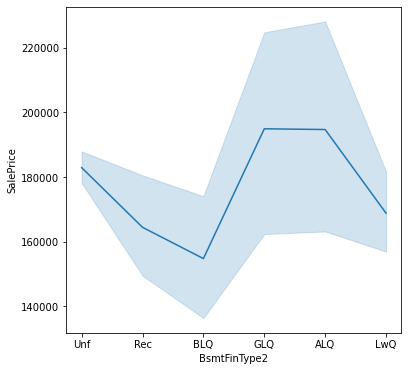

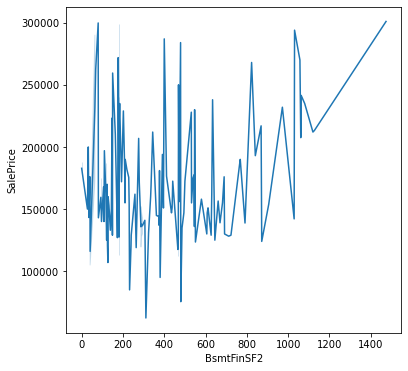

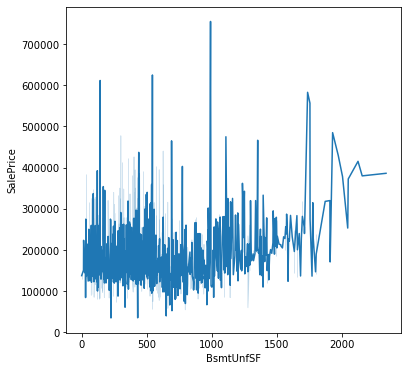

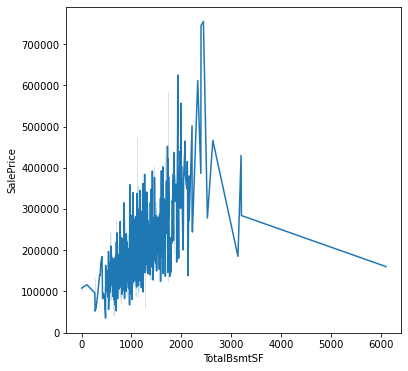

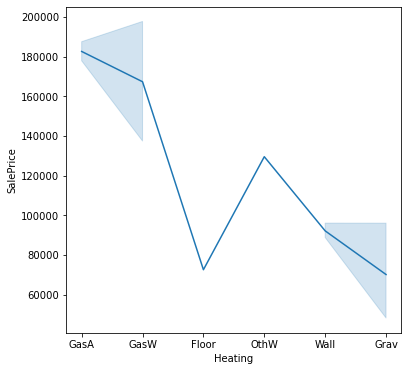

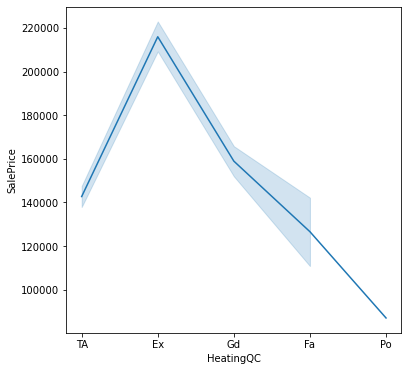

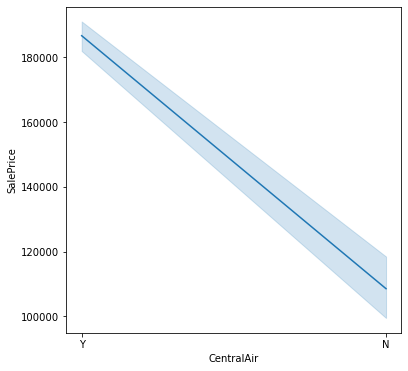

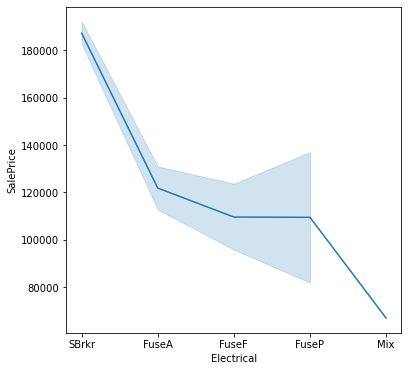

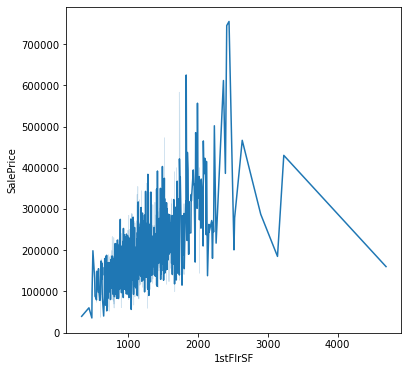

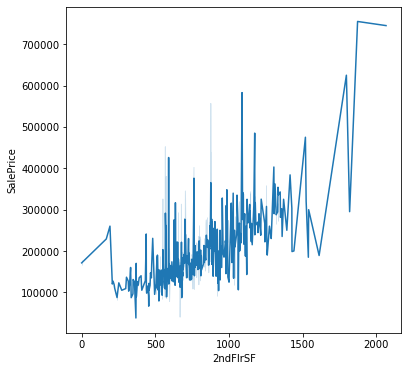

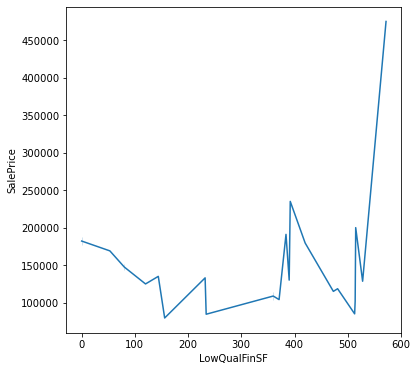

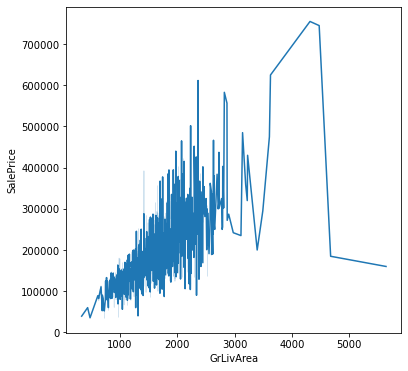

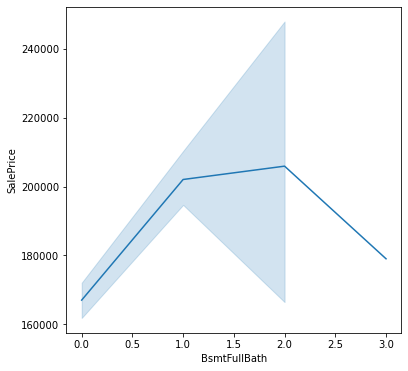

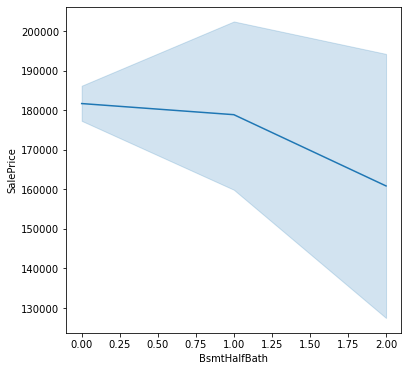

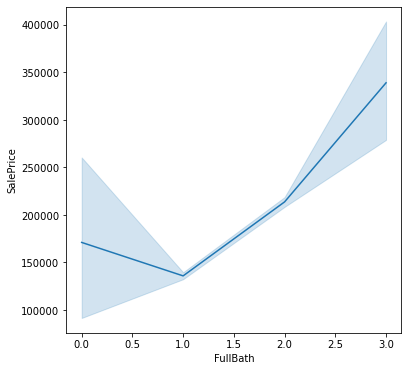

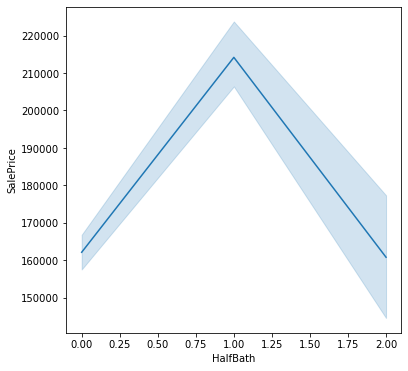

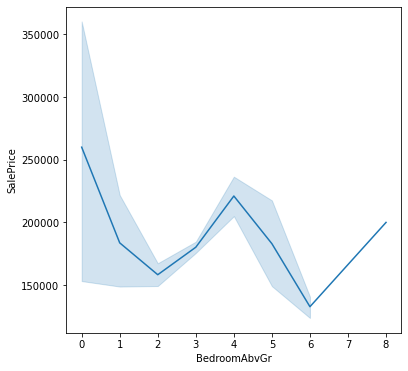

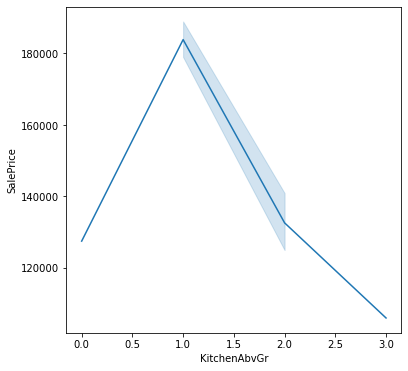

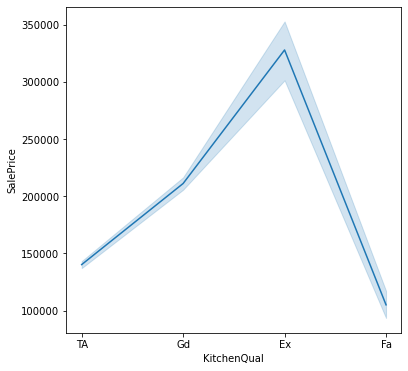

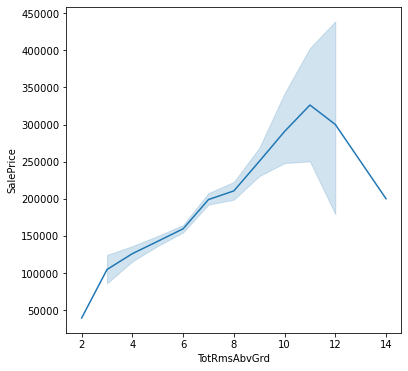

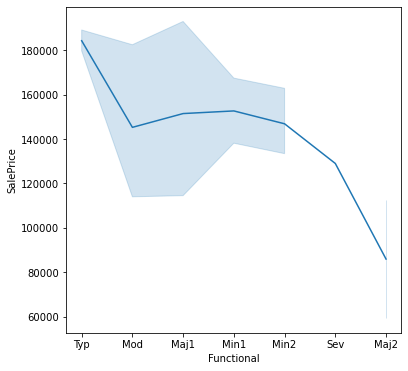

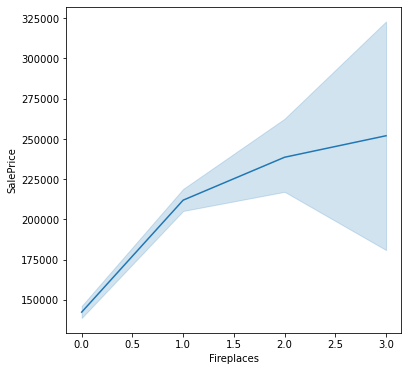

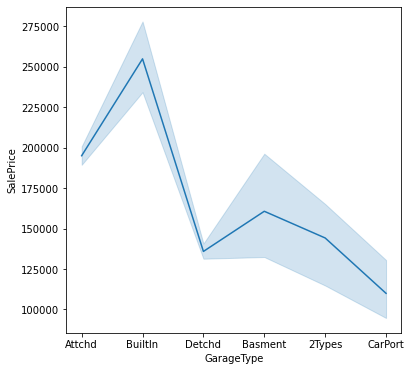

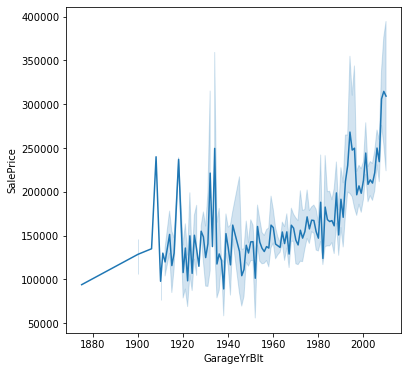

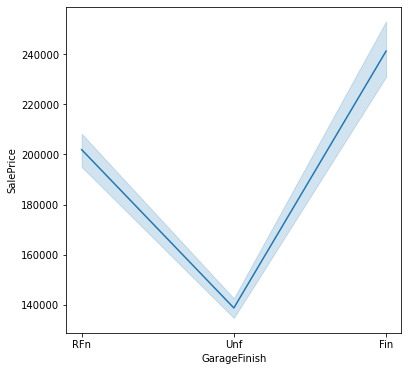

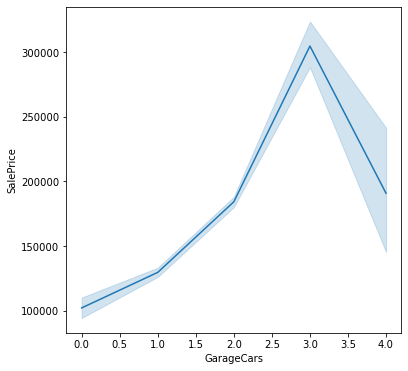

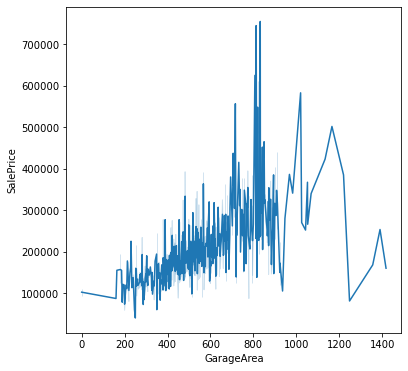

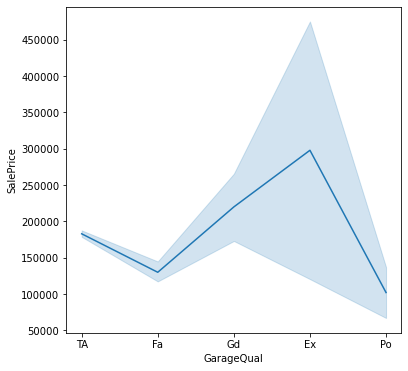

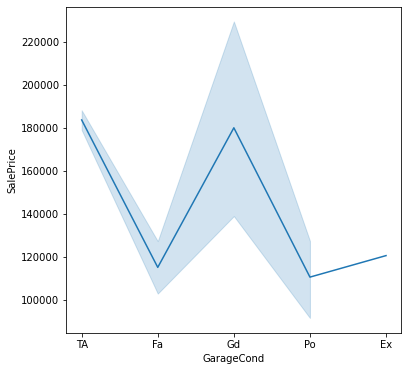

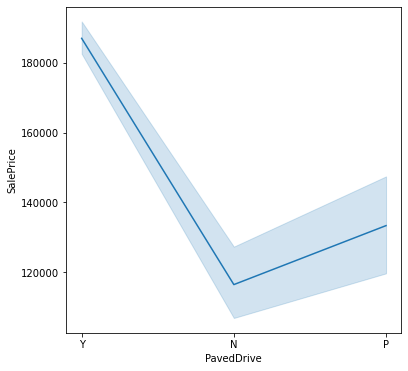

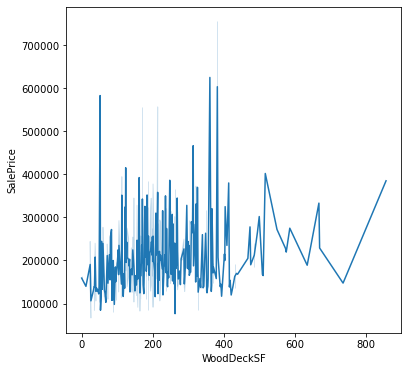

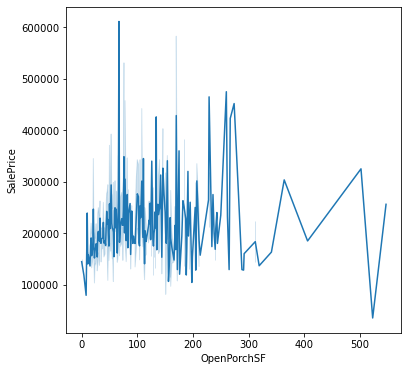

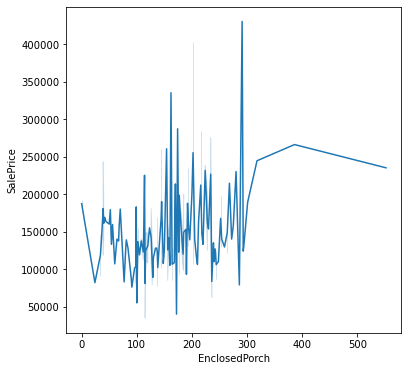

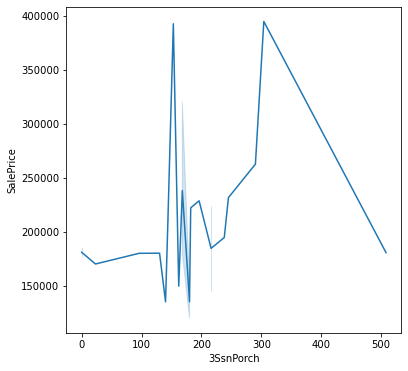

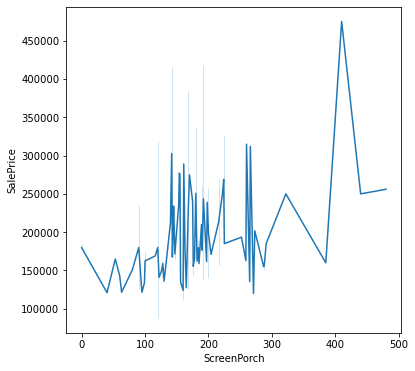

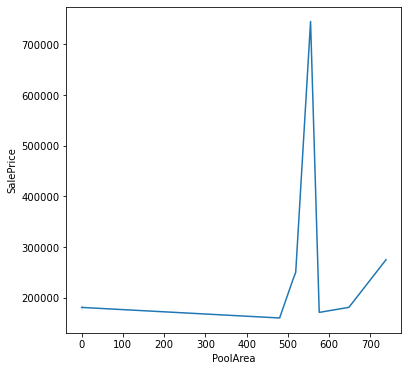

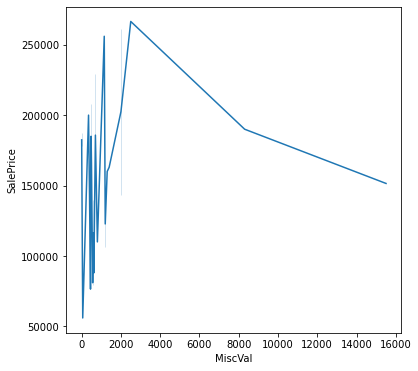

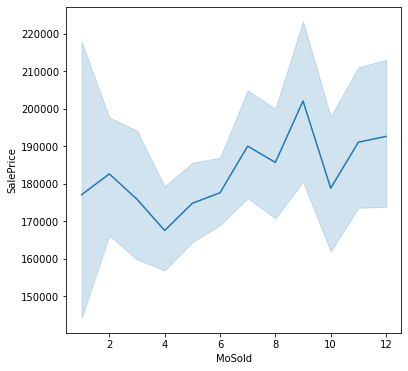

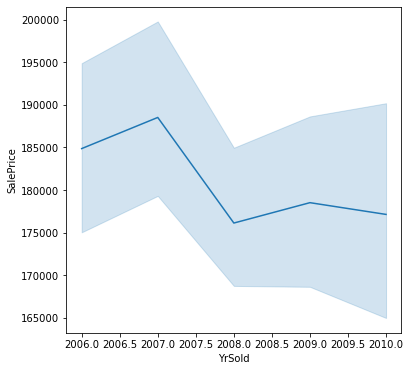

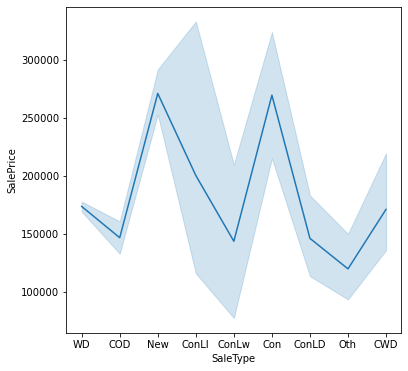

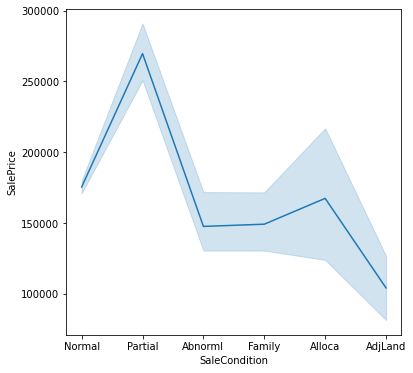

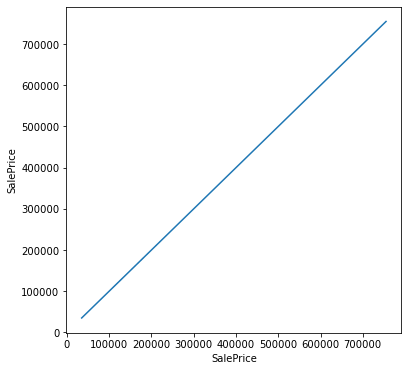

In [40]:
for i in train:
    if train[i].dtypes!='O' or i!='SalePrice':
        plt.figure(figsize=(6,6))
        sns.lineplot(x=i,y='SalePrice',data=train)
        plt.show()

# Data Preprocessing

## Encoding

#### Dividing data into feature(x) and target(y)

In [41]:
x=train.drop('SalePrice',axis=1)
y=train['SalePrice']

In [42]:
cat_columns=[i for i in x.columns if x[i].dtypes=='O']
cat_columns

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [43]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
label=LabelEncoder()

#using ordinal encoder for independent features
for i in cat_columns:
    x[i]=label.fit_transform(x[i].values.reshape(-1,1))
    train[i]=label.fit_transform(train[i].values.reshape(-1,1))
    test[i]=label.fit_transform(test[i].values.reshape(-1,1))

In [44]:
x.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0         120         3     70.98847     4928       1         0            3   
1          20         3     95.00000    15865       1         0            3   
2          60         3     92.00000     9920       1         0            3   
3          20         3    105.00000    11751       1         0            3   
4          20         3     70.98847    16635       1         0            3   

   LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
0          4          0            13           2           2         4   
1          4          1            12           2           2         0   
2          1          0            15           2           2         0   
3          4          0            14           2           2         0   
4          2          0            14           2           2         0   

   HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  \
0           2            6            5       1976          1976          1   
1           2            8            6       1970          1970          0   
2           5            7            5       1996          1997          1   
3           2            6            6       1977          1977          3   
4           2            6            7       1977          2000          1   

   RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  \
0         1            8            9           2         0.0          3   
1         5           12           13           2         0.0          2   
2         1            7            7           2         0.0          2   
3         1            8            9           1       480.0          3   
4         1            4            4           3       126.0          2   

   ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0          4           1         2         3             3             0   
1          2           2         3         1             1             0   
2          4           2         2         3             0             2   
3          4           1         2         3             3             1   
4          4           1         2         3             3             0   

   BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  \
0         120             5           0        958         1078        1   
1         351             4         823       1043         2217        1   
2         862             5           0        255         1117        1   
3         705             5           0       1139         1844        1   
4        1246             5           0        356         1602        1   

   HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0          4           1           4       958         0             0   
1          0           1           4      2217         0             0   
2          0           1           4      1127       886             0   
3          0           1           4      1844         0             0   
4          2           1           4      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
0             1            3             5           6           1   
1             1            2             8           6           1   
2             1            3             8           6           1   
3             1            3   

In [45]:
test.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0          20         2    86.000000    14157       1         0            1   
1         120         2    66.425101     5814       1         0            3   
2          20         2    66.425101    11838       1         3            3   
3          70         2    75.000000    12000       1         3            0   
4          60         2    86.000000    14598       1         0            3   

   LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
0          0          0            21           2           0         0   
1          1          0            21           2           0         4   
2          4          0             4           2           0         0   
3          4          0             5           2           0         0   
4          1          0            20           1           0         0   

   HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  \
0           2            9            5       2005          2006          3   
1           2            8            5       1984          1984          1   
2           2            8            5       2001          2001          3   
3           5            7            7       1941          1950          1   
4           5            6            5       2007          2007          1   

   RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  \
0         0            9           11           3       200.0          2   
1         0            5            5           2         0.0          2   
2         0            9           11           2         0.0          2   
3         0            6            7           2         0.0          3   
4         0            9           11           3        74.0          2   

   ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0          3           2         0         2             1             2   
1          3           1         2         2             0             2   
2          3           2         2         2             0             5   
3          3           1         3         2             3             4   
4          3           2         2         2             2             5   

   BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  \
0        1249             5           0        673         1922        0   
1        1036             5           0        184         1220        0   
2           0             5           0       1753         1753        0   
3         275             5           0        429          704        0   
4           0             5           0        894          894        0   

   HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0          0           1           3      1922         0             0   
1          2           1           3      1360         0             0   
2          0           1           3      1788         0             0   
3          0           1           3       860       704             0   
4          0           1           3       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
0             1            2             8           5           1   
1             1            2             4           5           1   
2             1            0             7           5           1   
3             1            1   

## Outliers

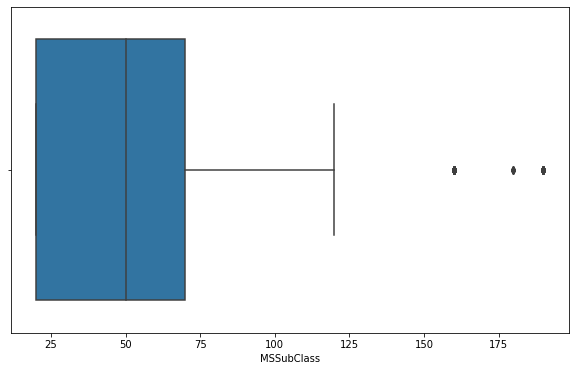

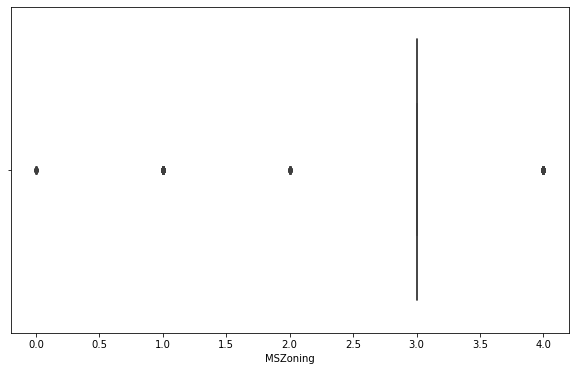

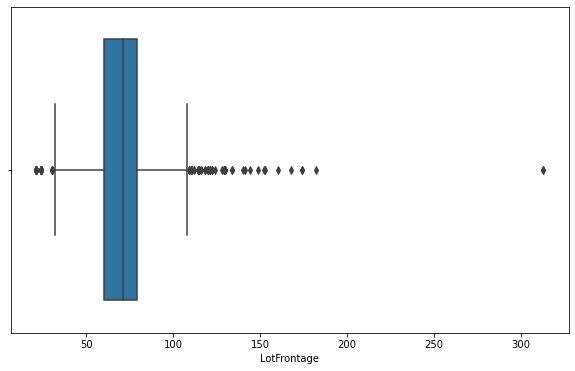

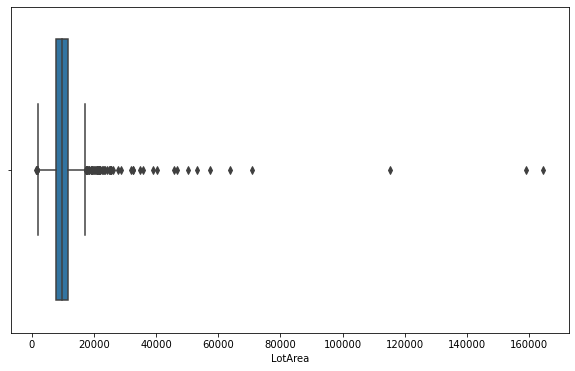

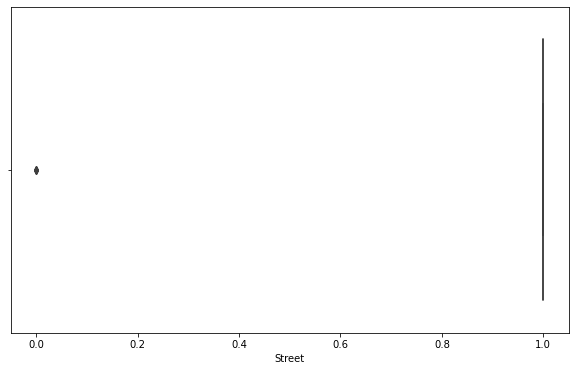

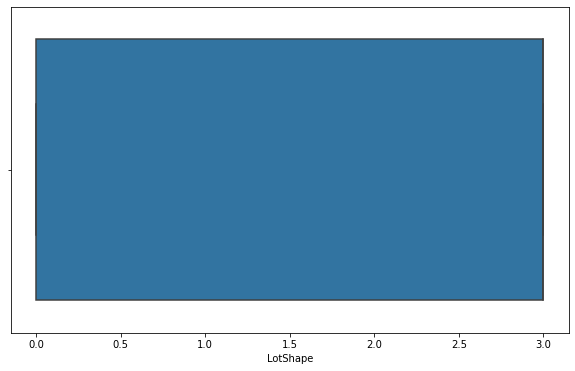

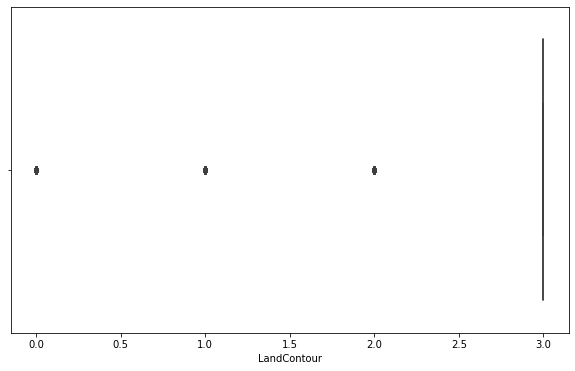

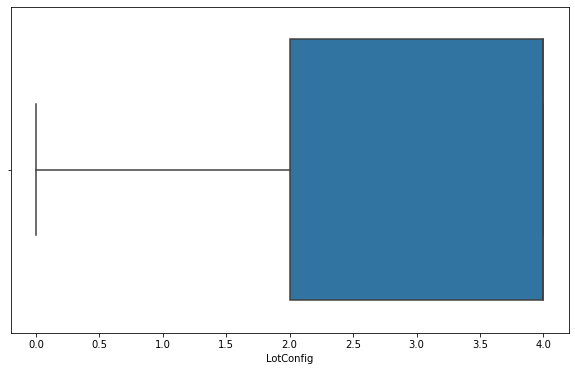

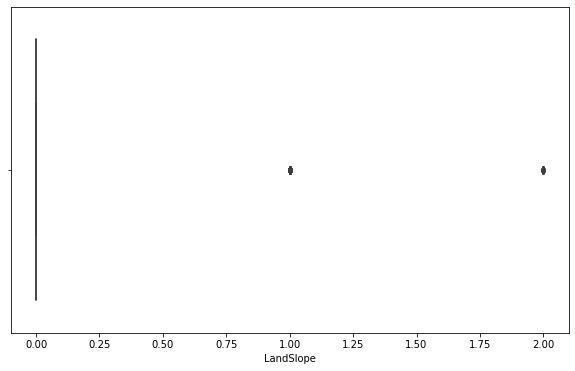

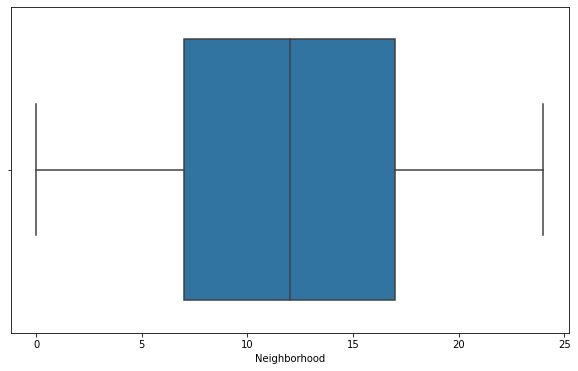

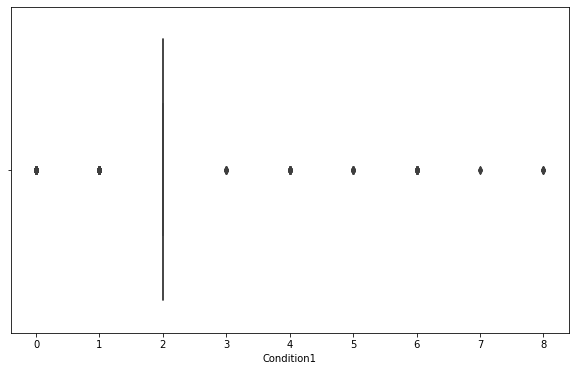

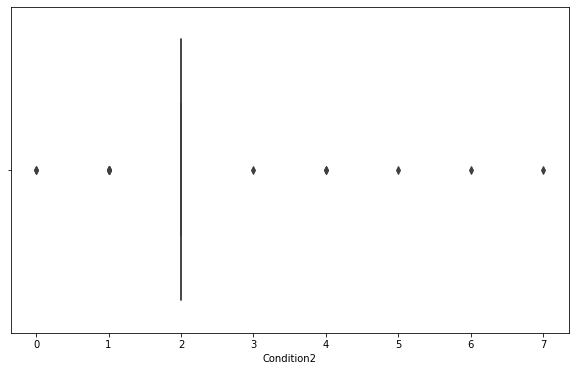

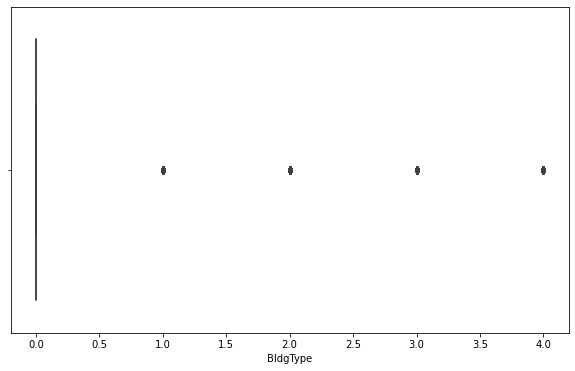

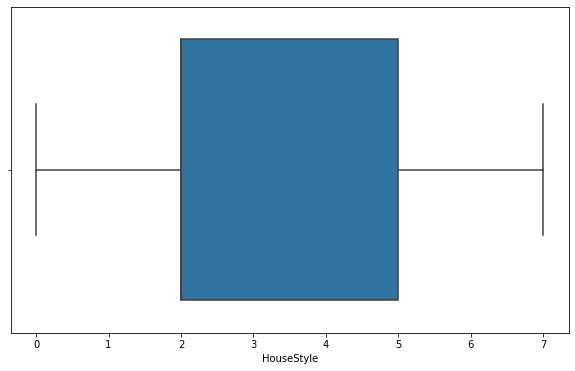

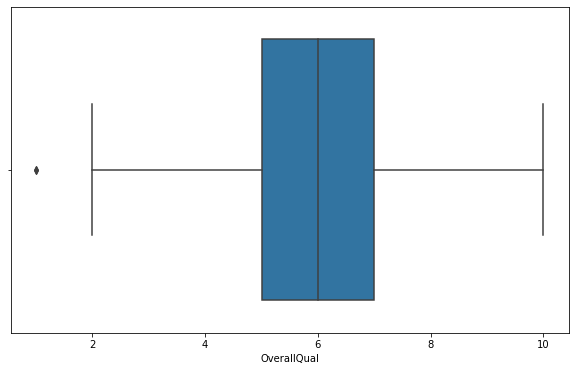

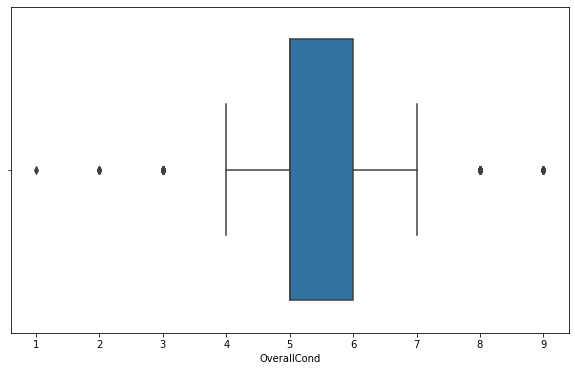

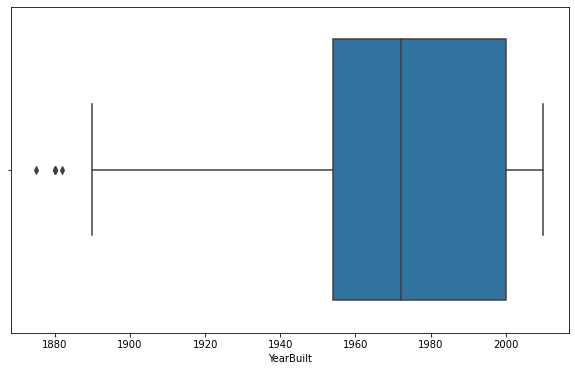

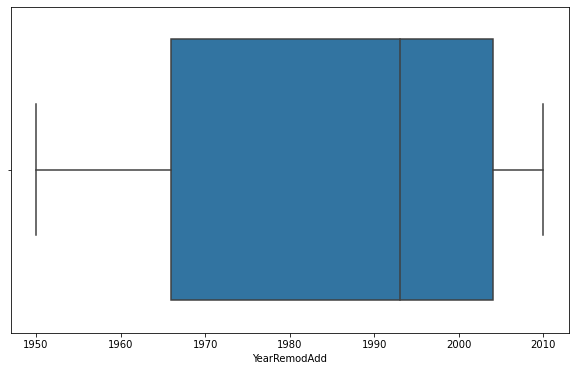

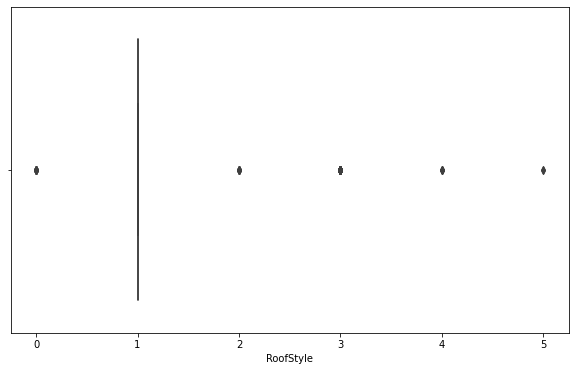

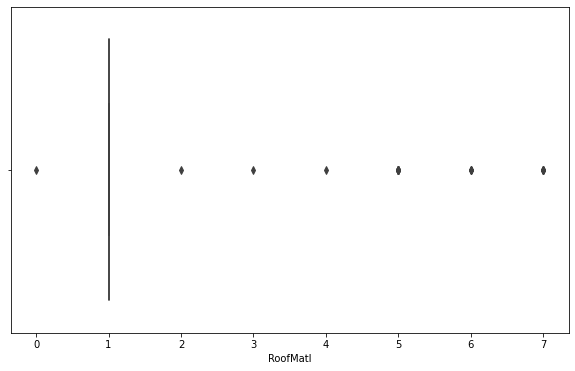

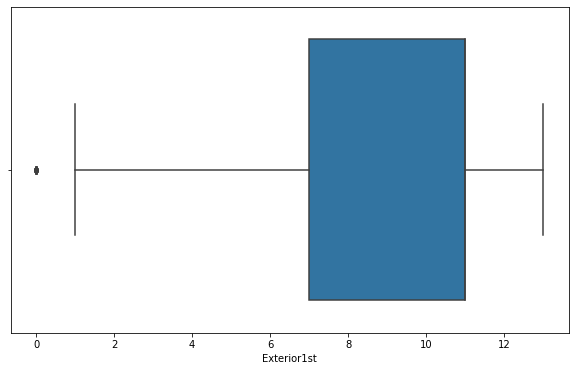

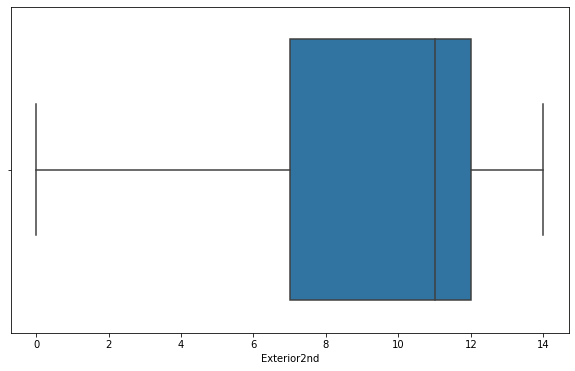

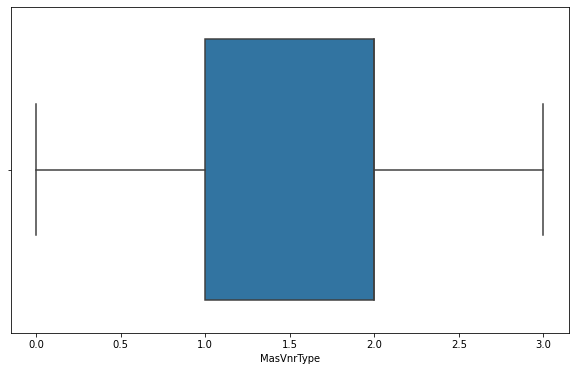

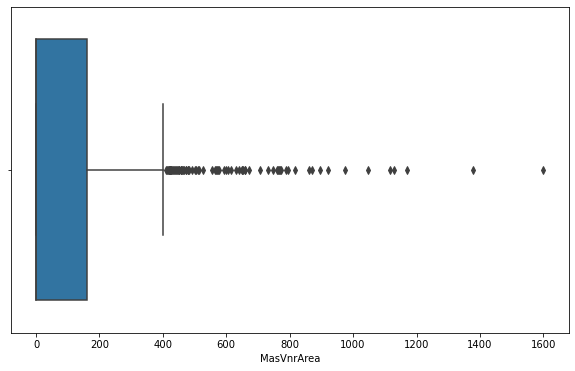

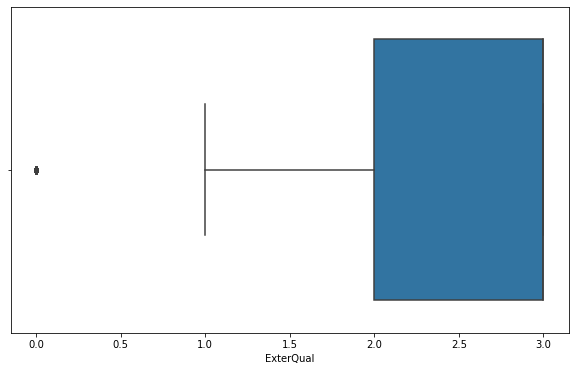

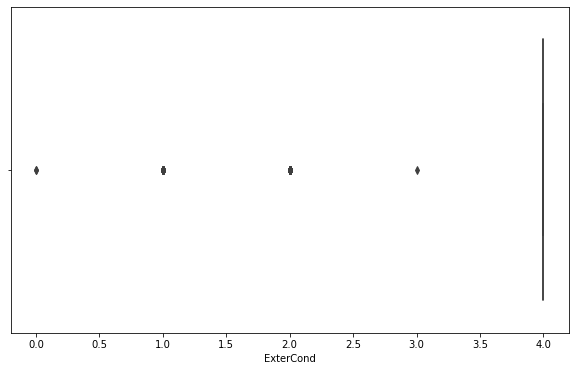

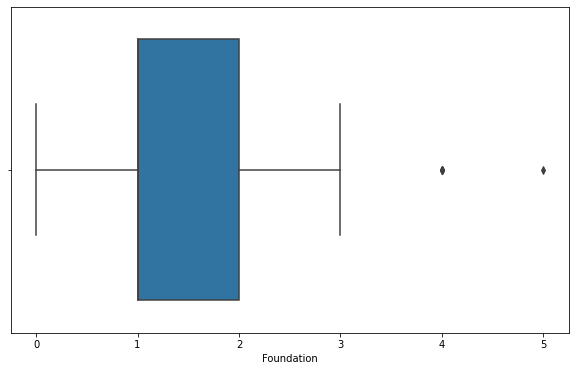

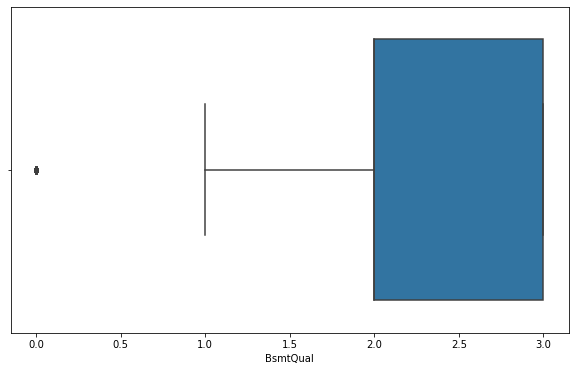

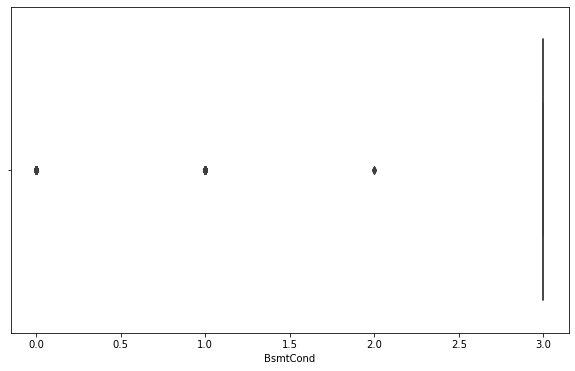

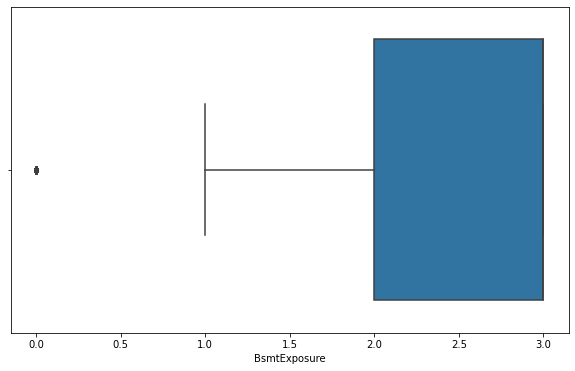

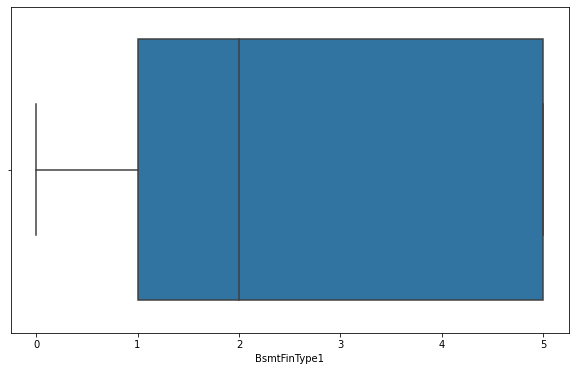

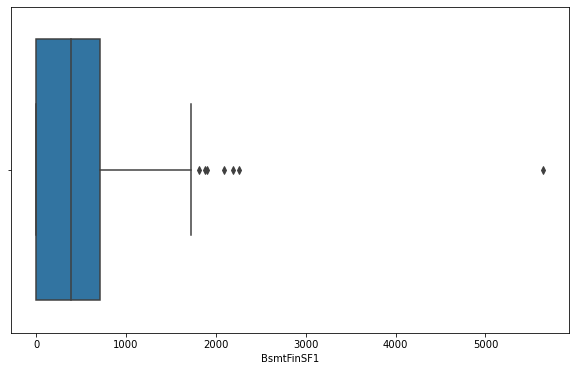

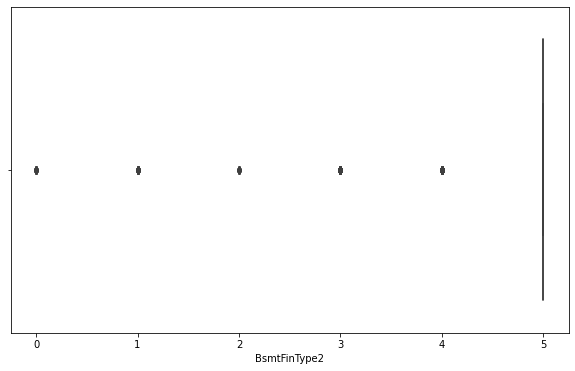

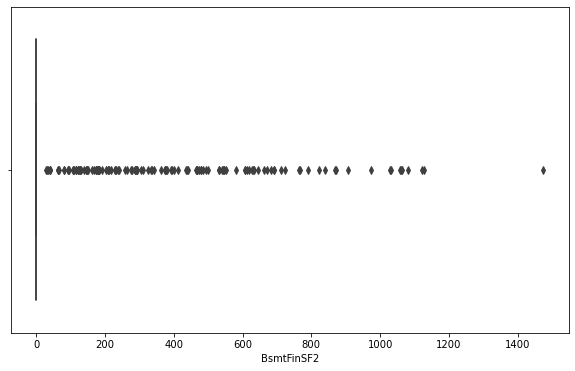

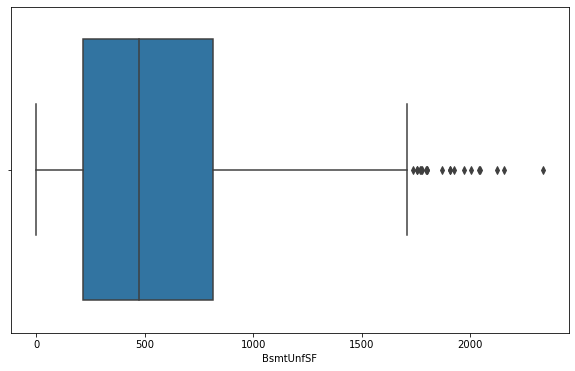

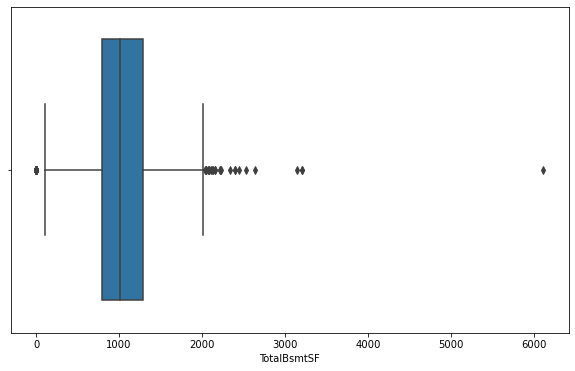

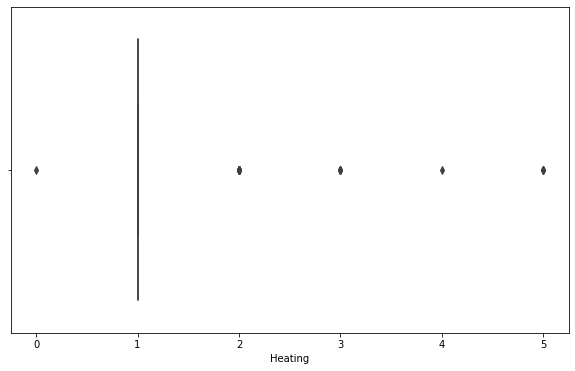

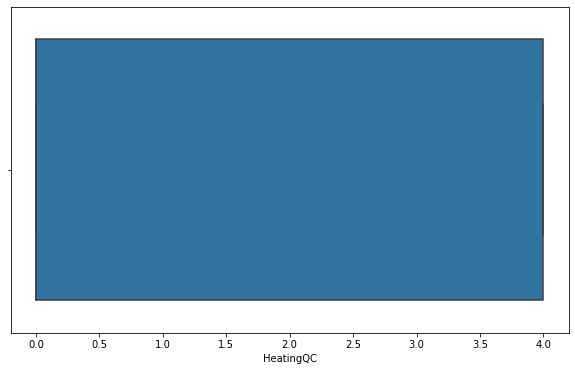

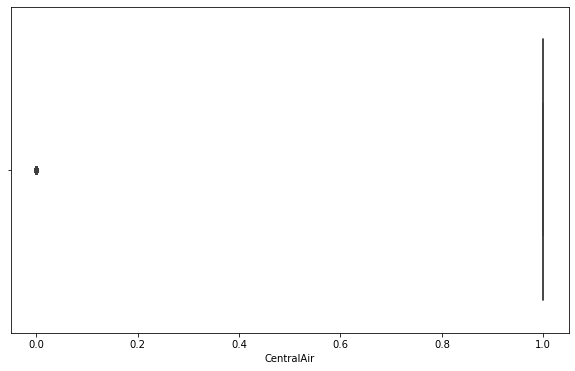

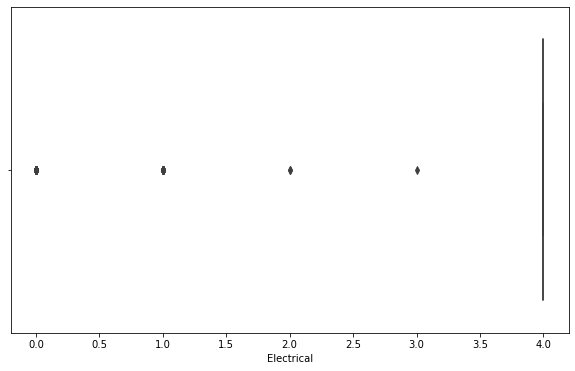

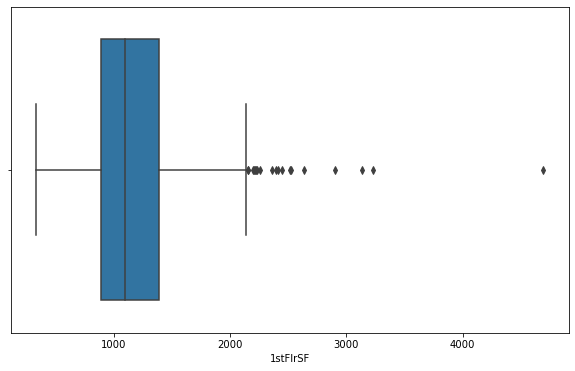

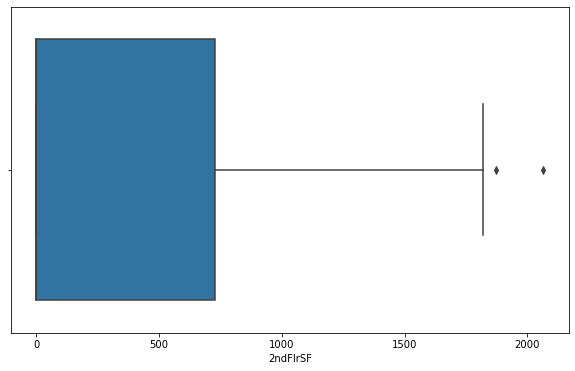

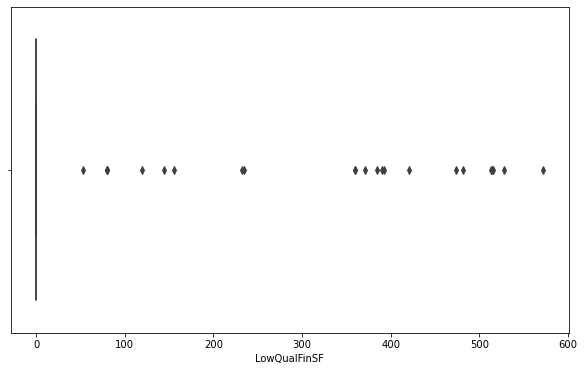

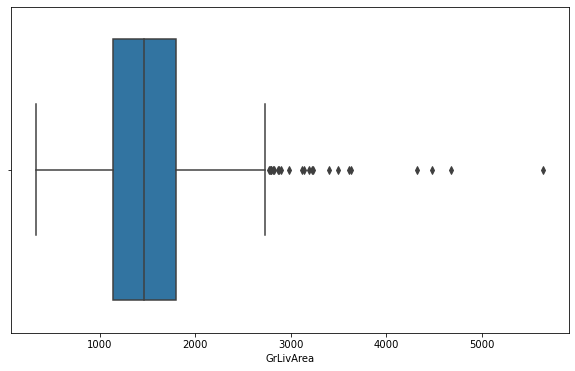

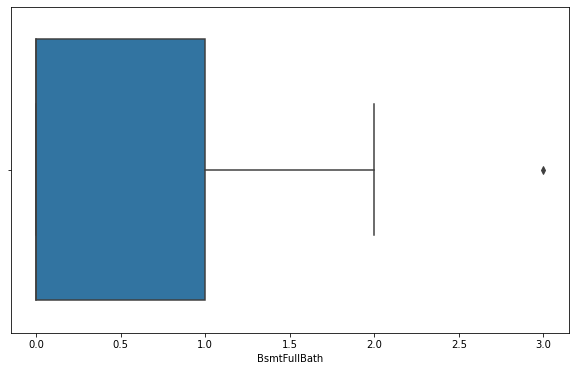

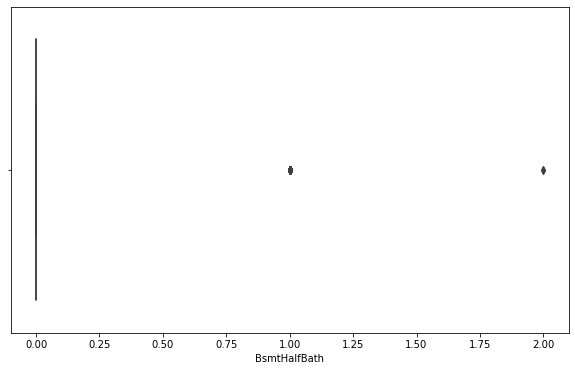

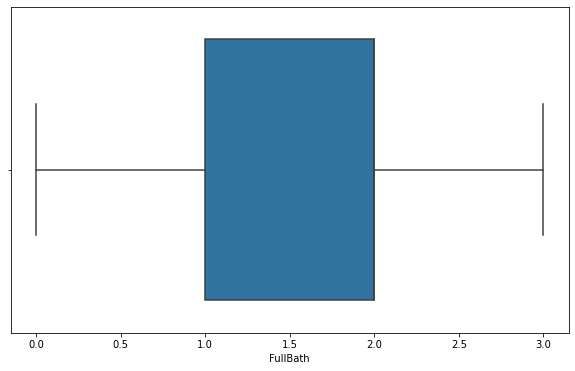

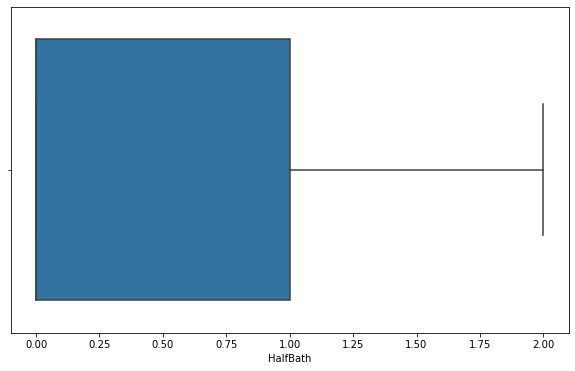

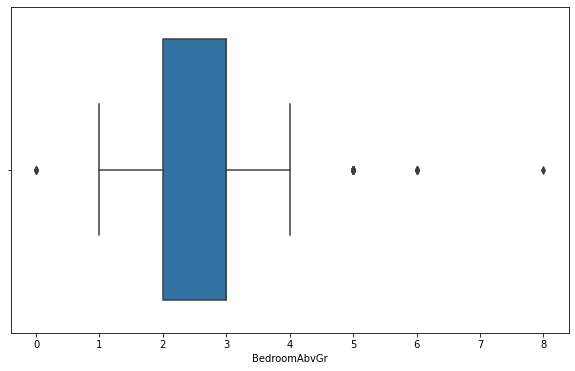

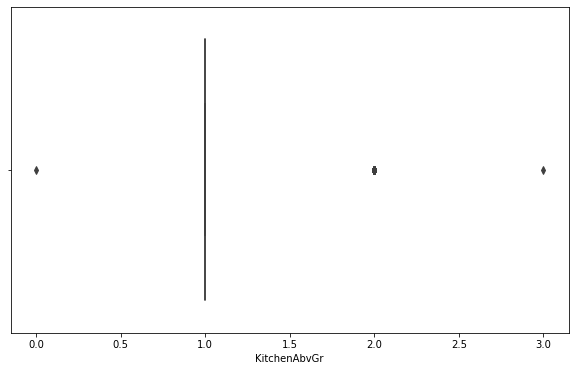

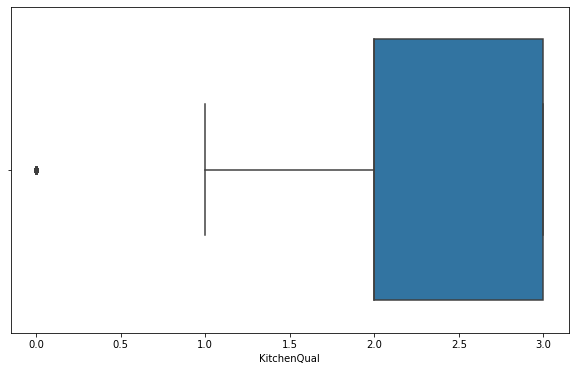

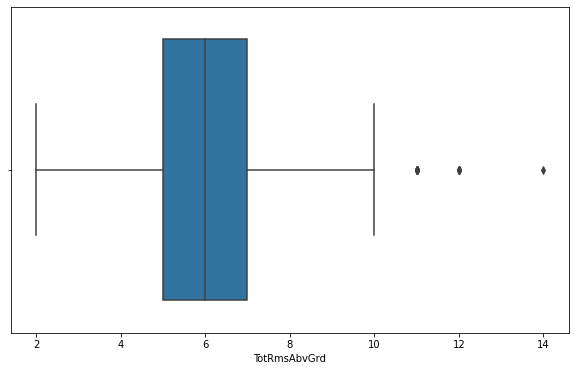

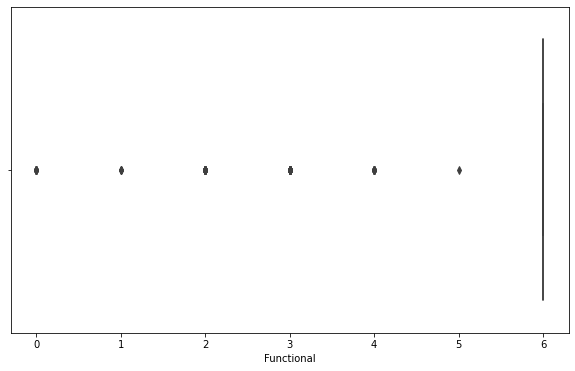

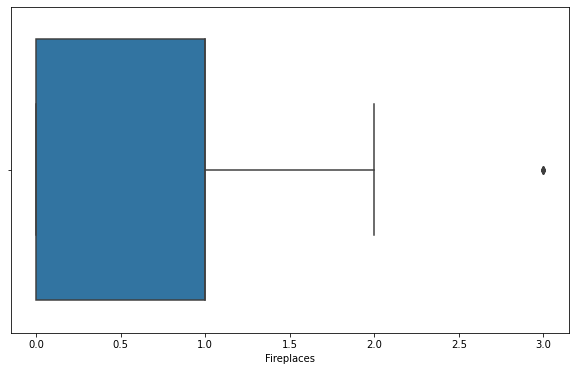

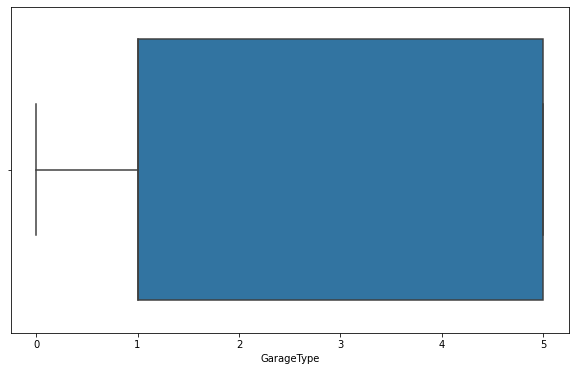

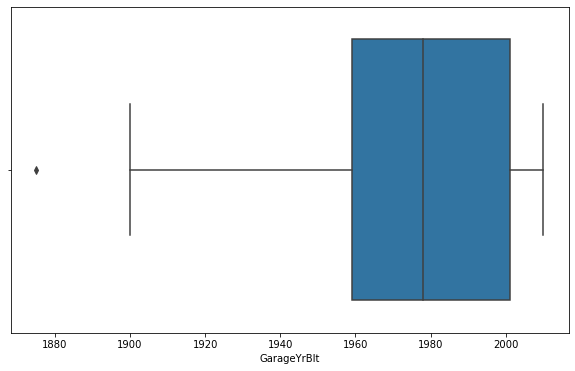

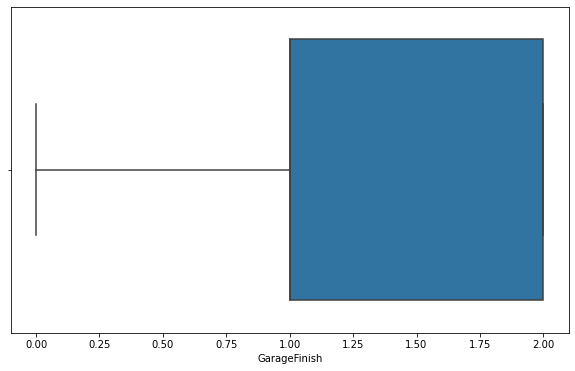

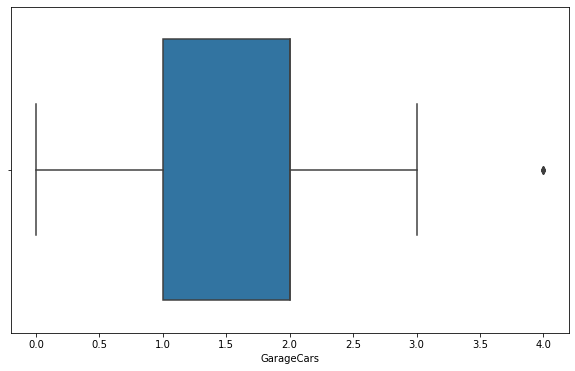

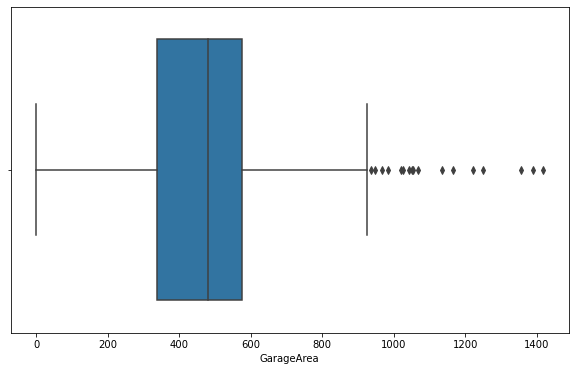

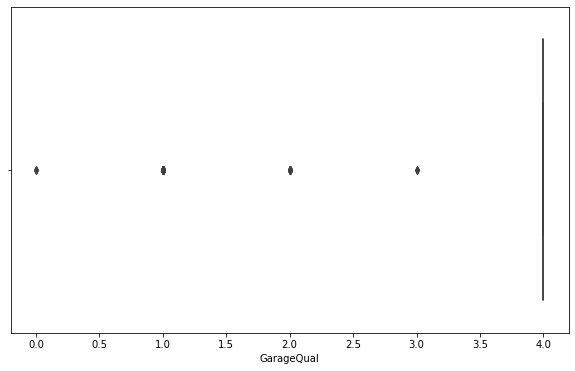

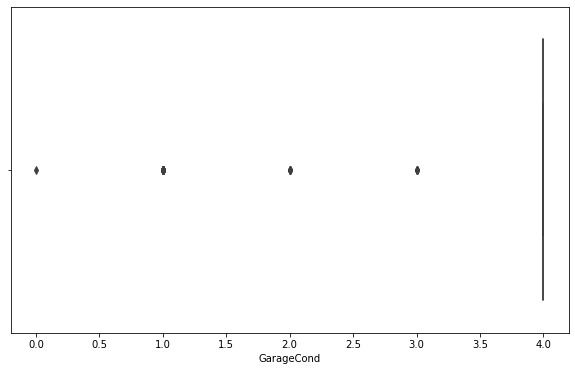

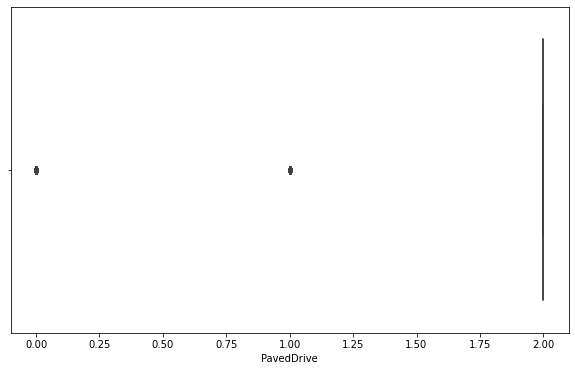

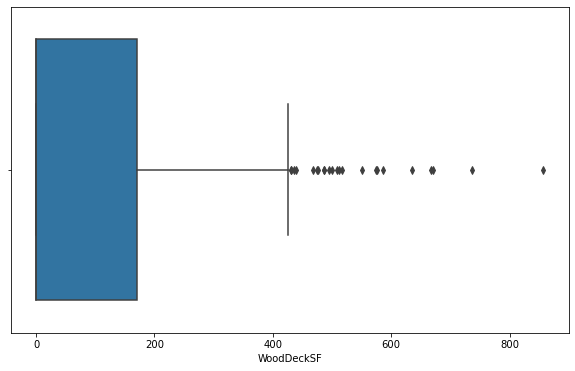

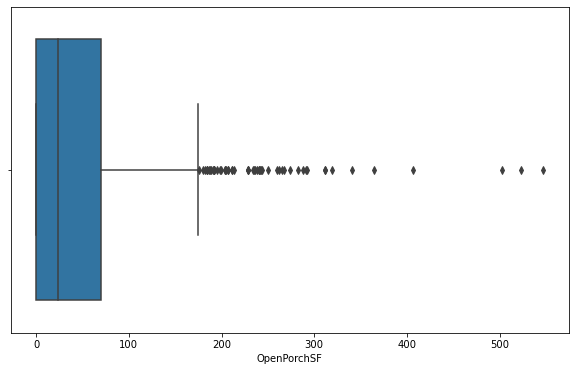

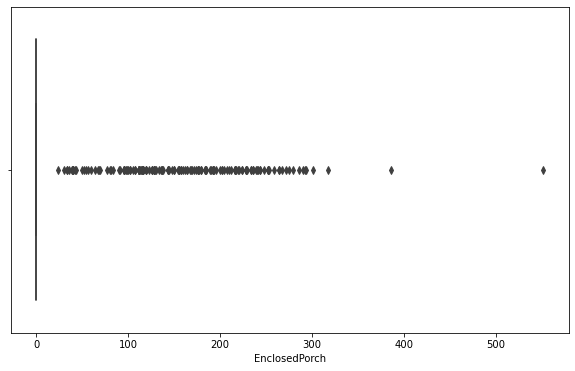

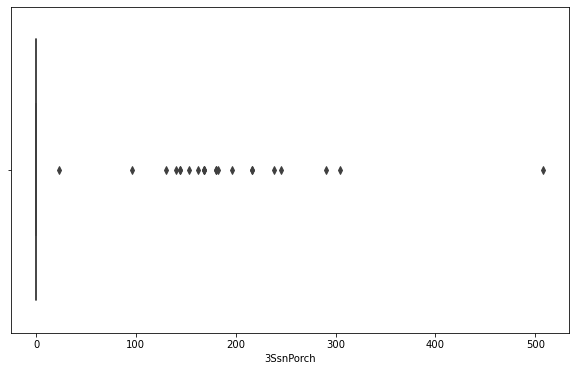

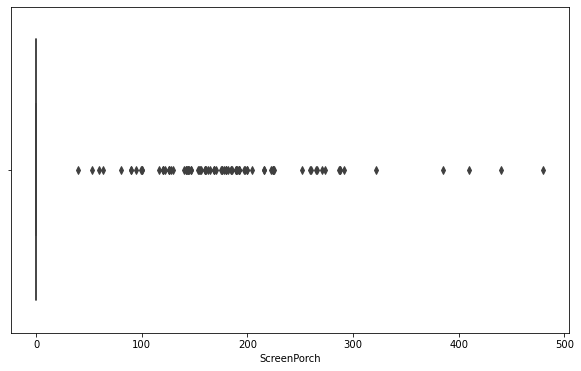

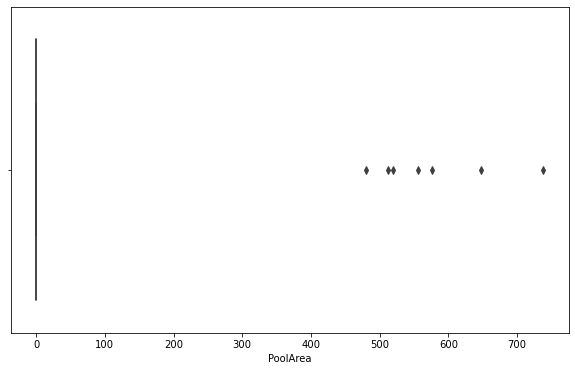

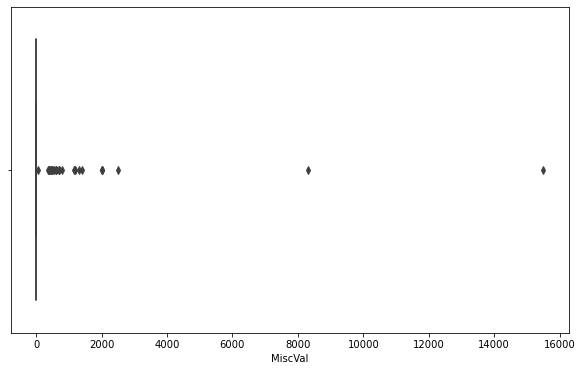

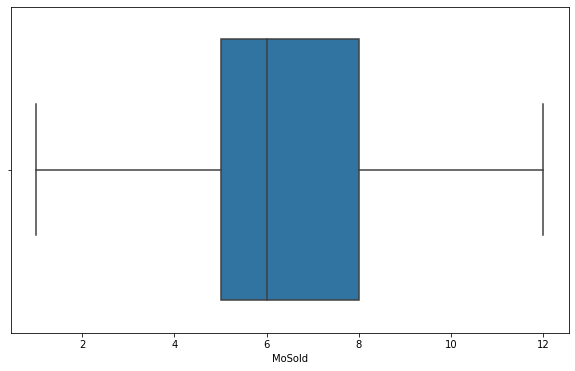

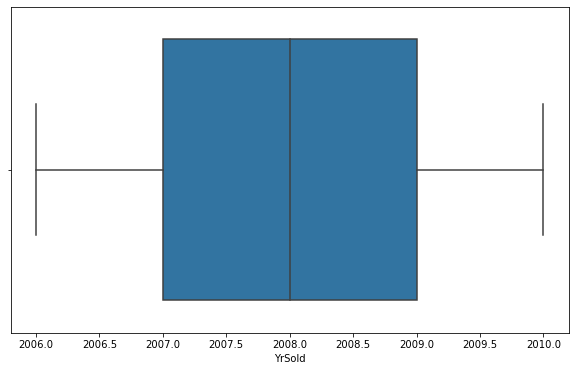

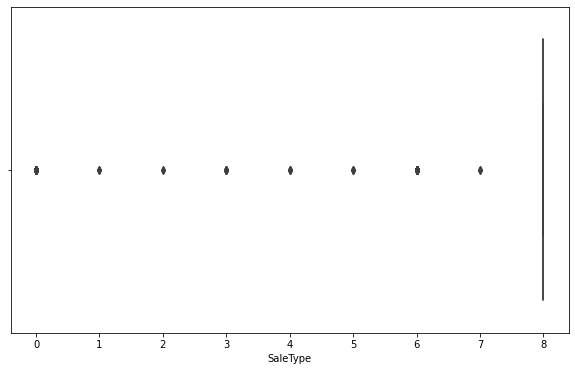

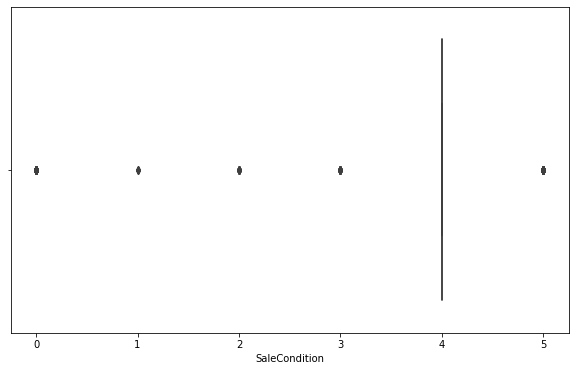

In [46]:
for i in x:
    plt.figure(figsize=(10,6))
    sns.boxplot(train[i])

### Oulier Removal

In [47]:
from scipy.stats import zscore
z=np.abs(zscore(x))
z.shape

(1168, 73)

In [48]:
np.where(z>3)

(array([   1,    1,    1, ..., 1166, 1166, 1166], dtype=int64),
 array([ 8, 19, 33, ..., 38, 60, 61], dtype=int64))

In [49]:
nd=x[(z<=3).all(axis=1)]
print(x.shape,'\n',nd.shape)

(1168, 73) 
 (484, 73)


### Data loss

In [50]:
loss=(1168-484)/1168*100
loss

58.56164383561644

#### 59% of data loss is not acceptable. Hence we will not remove outliers.

## Skewness

<Figure size 1440x576 with 0 Axes>

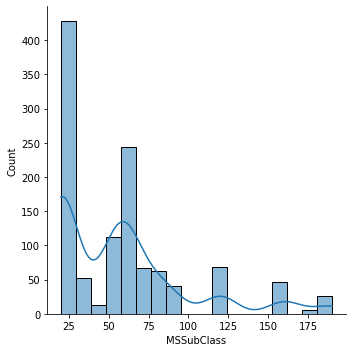

<Figure size 1440x576 with 0 Axes>

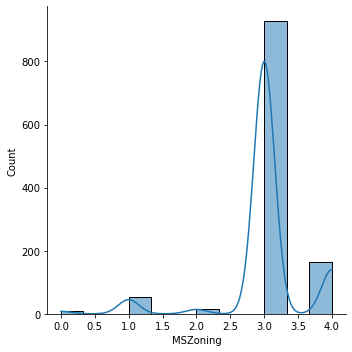

<Figure size 1440x576 with 0 Axes>

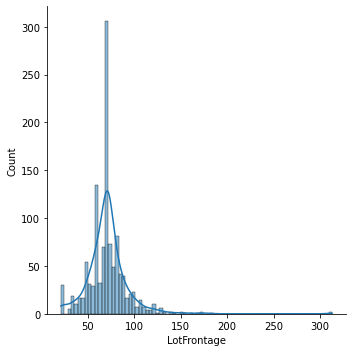

<Figure size 1440x576 with 0 Axes>

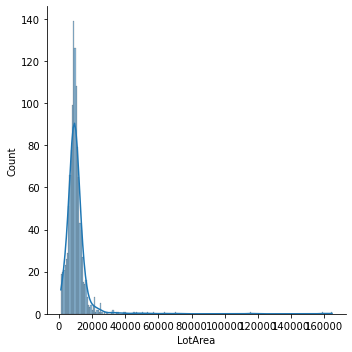

<Figure size 1440x576 with 0 Axes>

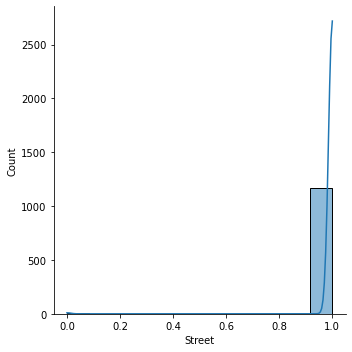

<Figure size 1440x576 with 0 Axes>

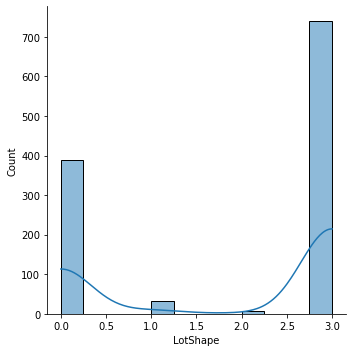

<Figure size 1440x576 with 0 Axes>

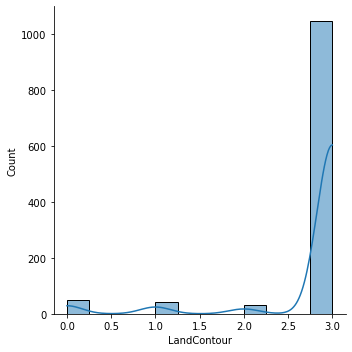

<Figure size 1440x576 with 0 Axes>

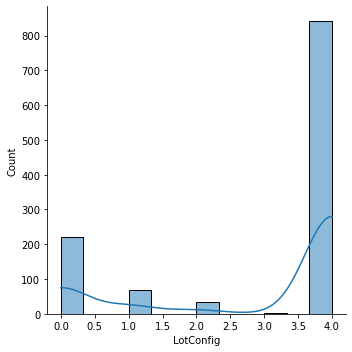

<Figure size 1440x576 with 0 Axes>

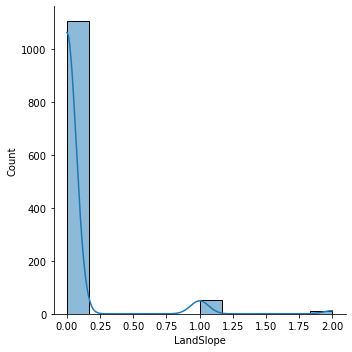

<Figure size 1440x576 with 0 Axes>

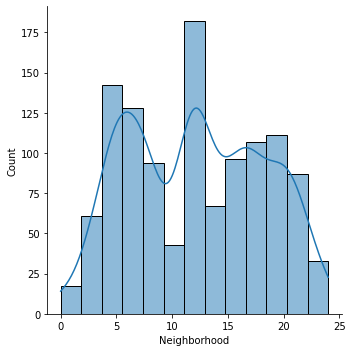

<Figure size 1440x576 with 0 Axes>

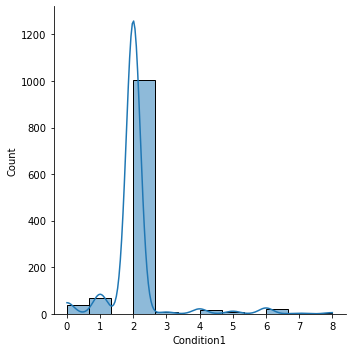

<Figure size 1440x576 with 0 Axes>

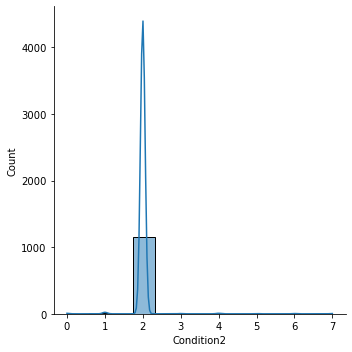

<Figure size 1440x576 with 0 Axes>

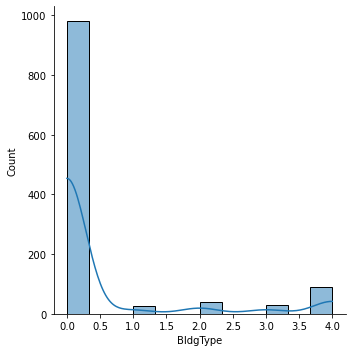

<Figure size 1440x576 with 0 Axes>

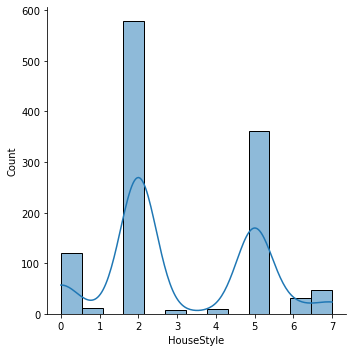

<Figure size 1440x576 with 0 Axes>

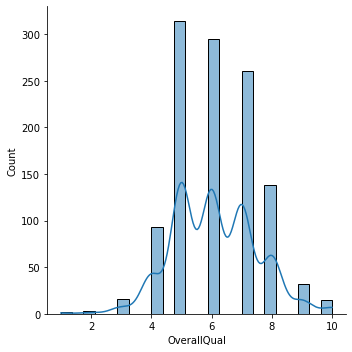

<Figure size 1440x576 with 0 Axes>

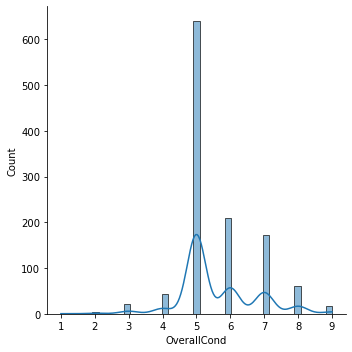

<Figure size 1440x576 with 0 Axes>

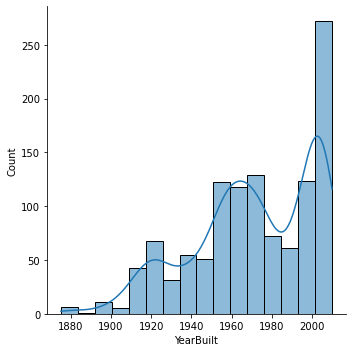

<Figure size 1440x576 with 0 Axes>

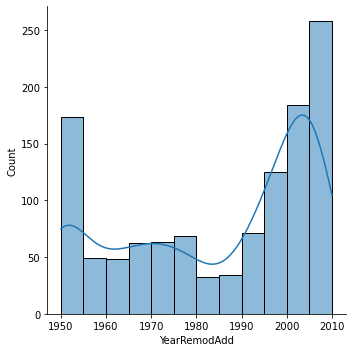

<Figure size 1440x576 with 0 Axes>

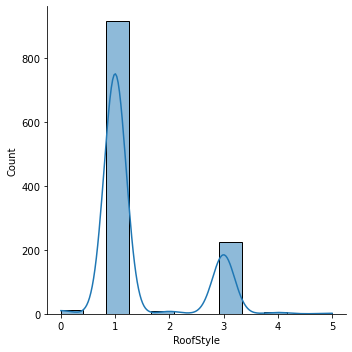

<Figure size 1440x576 with 0 Axes>

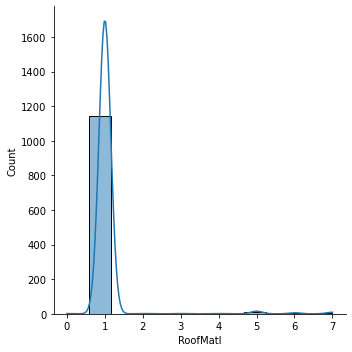

<Figure size 1440x576 with 0 Axes>

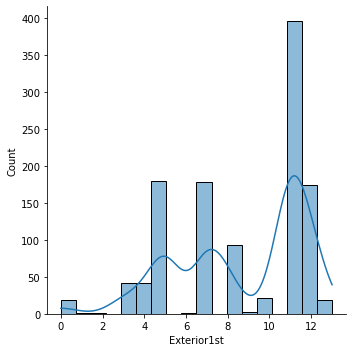

<Figure size 1440x576 with 0 Axes>

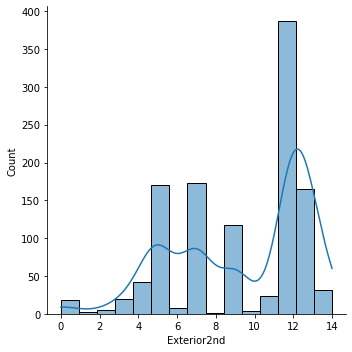

<Figure size 1440x576 with 0 Axes>

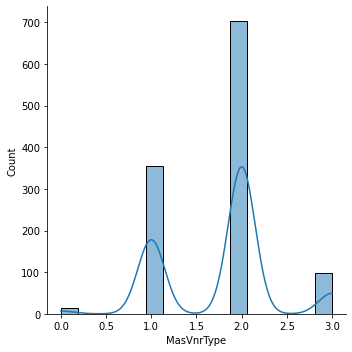

<Figure size 1440x576 with 0 Axes>

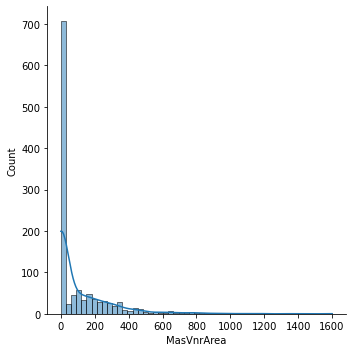

<Figure size 1440x576 with 0 Axes>

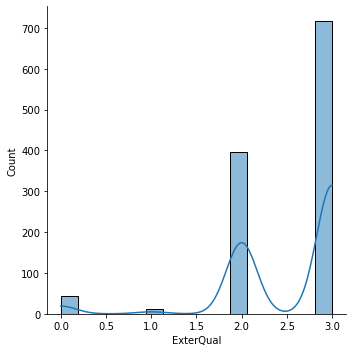

<Figure size 1440x576 with 0 Axes>

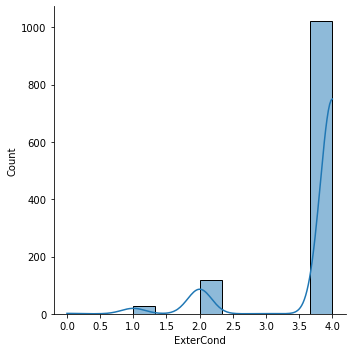

<Figure size 1440x576 with 0 Axes>

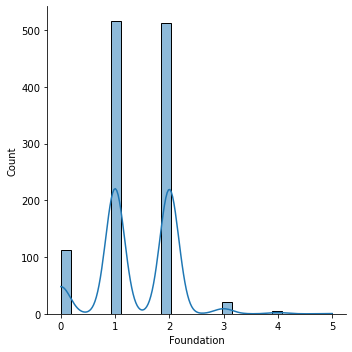

<Figure size 1440x576 with 0 Axes>

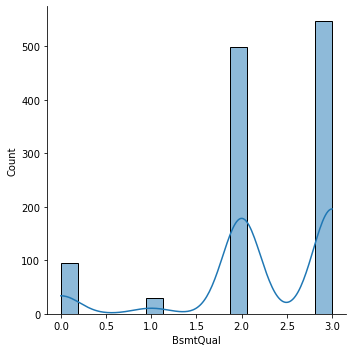

<Figure size 1440x576 with 0 Axes>

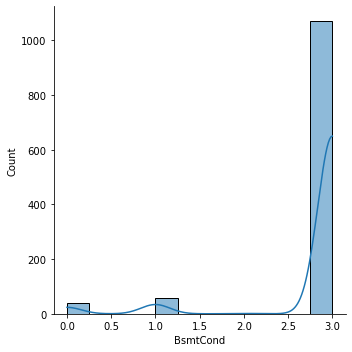

<Figure size 1440x576 with 0 Axes>

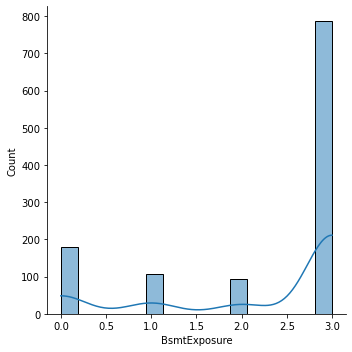

<Figure size 1440x576 with 0 Axes>

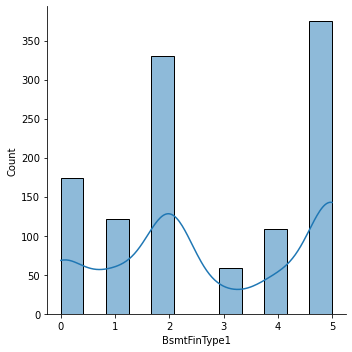

<Figure size 1440x576 with 0 Axes>

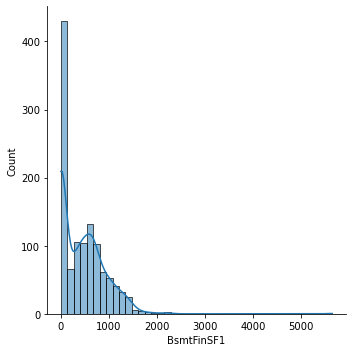

<Figure size 1440x576 with 0 Axes>

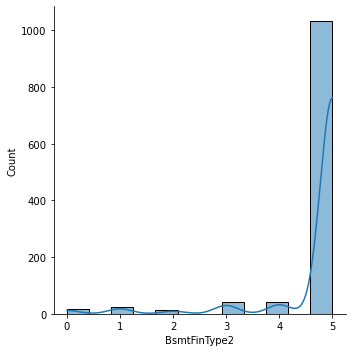

<Figure size 1440x576 with 0 Axes>

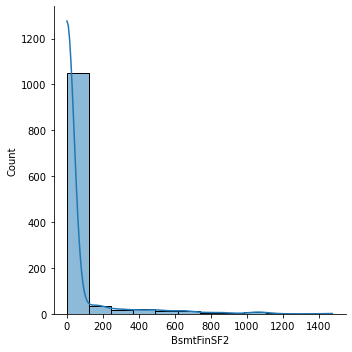

<Figure size 1440x576 with 0 Axes>

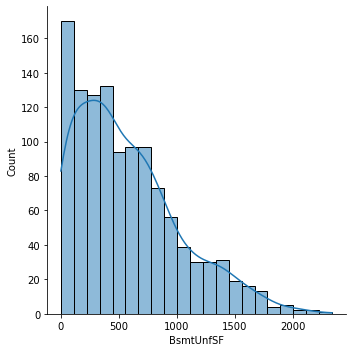

<Figure size 1440x576 with 0 Axes>

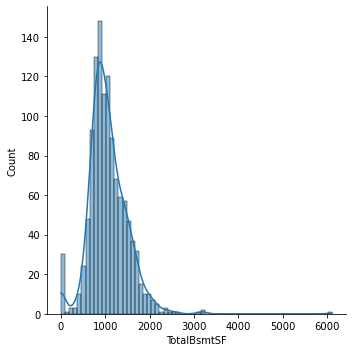

<Figure size 1440x576 with 0 Axes>

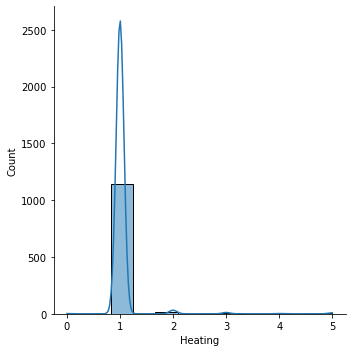

<Figure size 1440x576 with 0 Axes>

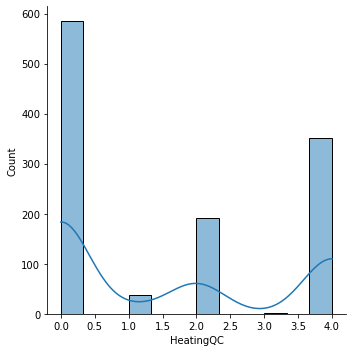

<Figure size 1440x576 with 0 Axes>

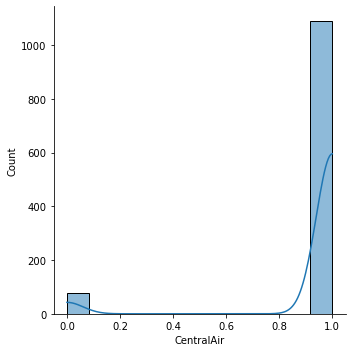

<Figure size 1440x576 with 0 Axes>

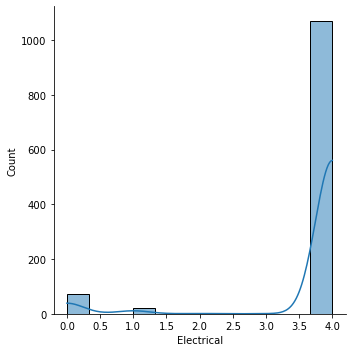

<Figure size 1440x576 with 0 Axes>

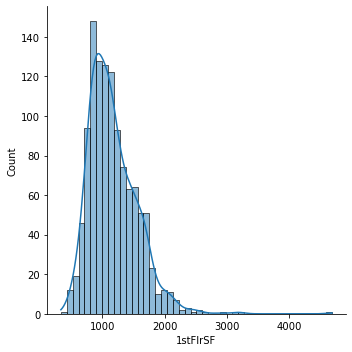

<Figure size 1440x576 with 0 Axes>

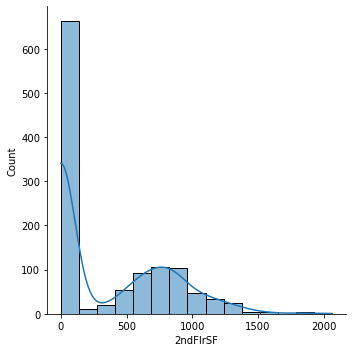

<Figure size 1440x576 with 0 Axes>

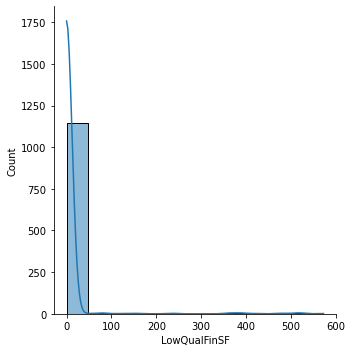

<Figure size 1440x576 with 0 Axes>

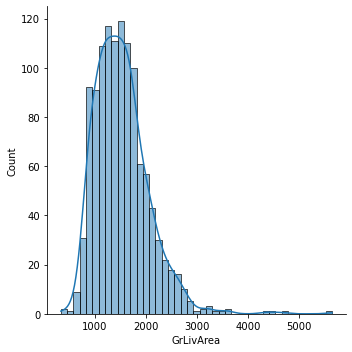

<Figure size 1440x576 with 0 Axes>

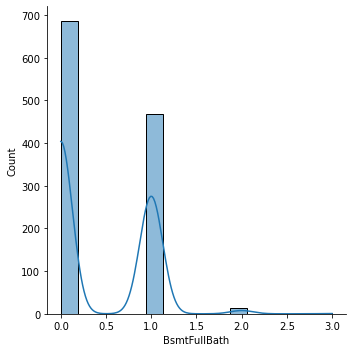

<Figure size 1440x576 with 0 Axes>

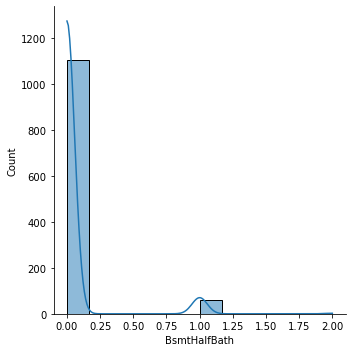

<Figure size 1440x576 with 0 Axes>

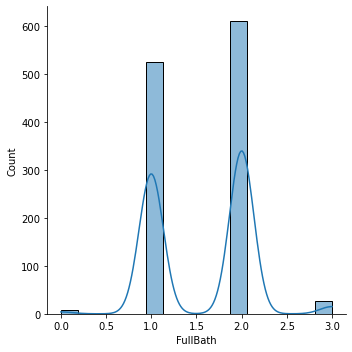

<Figure size 1440x576 with 0 Axes>

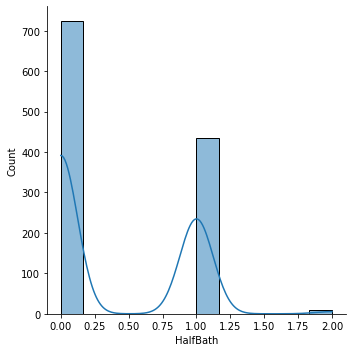

<Figure size 1440x576 with 0 Axes>

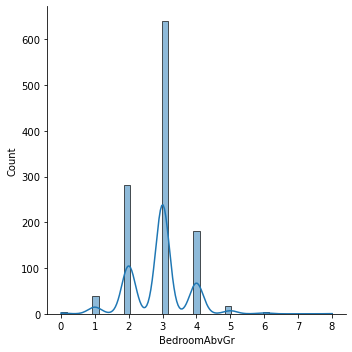

<Figure size 1440x576 with 0 Axes>

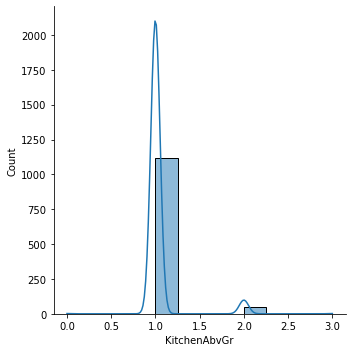

<Figure size 1440x576 with 0 Axes>

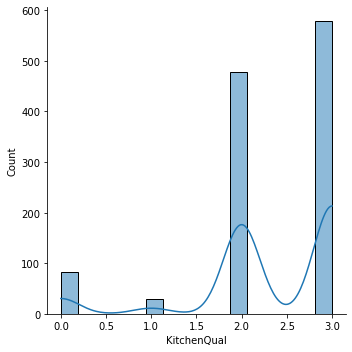

<Figure size 1440x576 with 0 Axes>

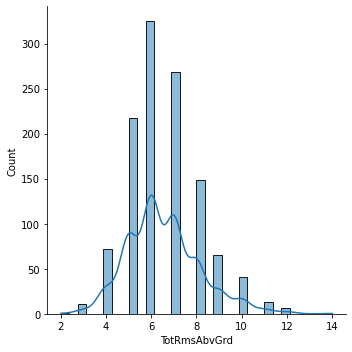

<Figure size 1440x576 with 0 Axes>

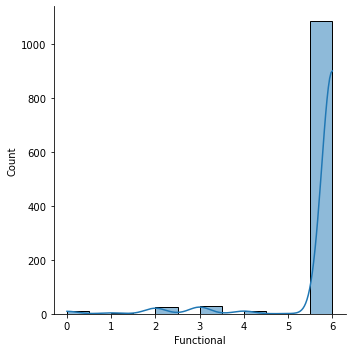

<Figure size 1440x576 with 0 Axes>

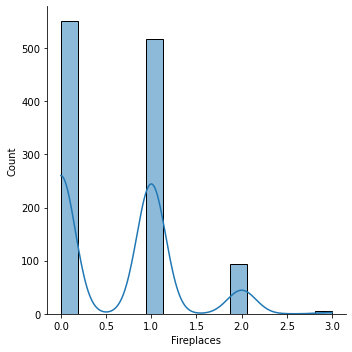

<Figure size 1440x576 with 0 Axes>

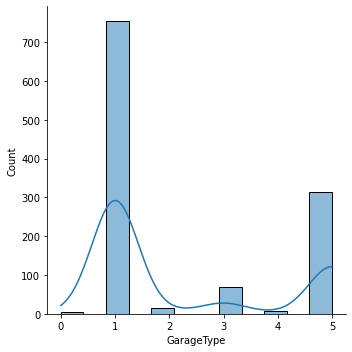

<Figure size 1440x576 with 0 Axes>

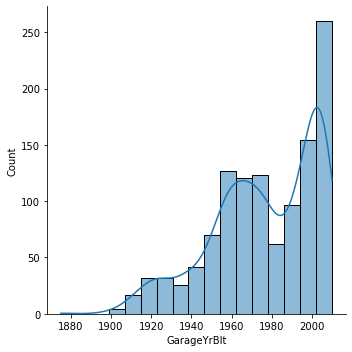

<Figure size 1440x576 with 0 Axes>

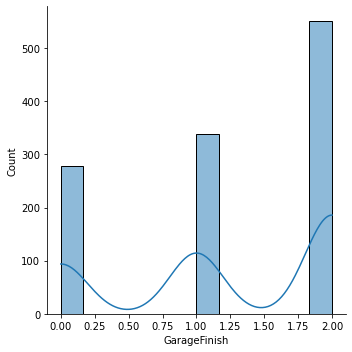

<Figure size 1440x576 with 0 Axes>

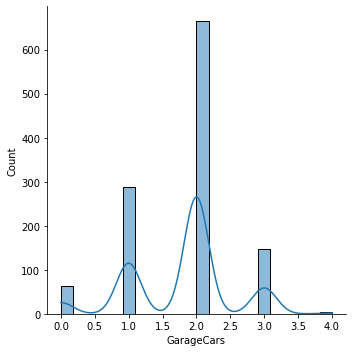

<Figure size 1440x576 with 0 Axes>

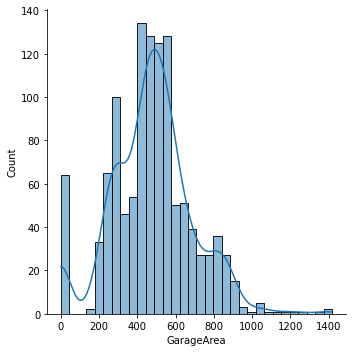

<Figure size 1440x576 with 0 Axes>

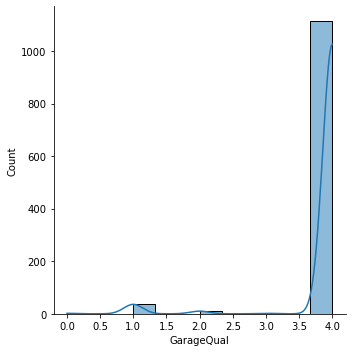

<Figure size 1440x576 with 0 Axes>

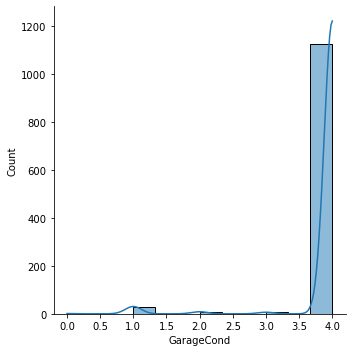

<Figure size 1440x576 with 0 Axes>

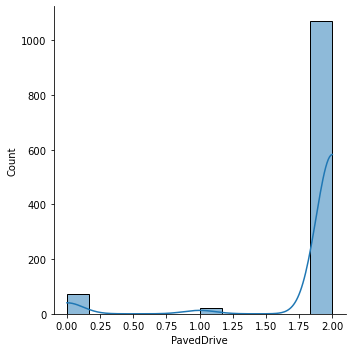

<Figure size 1440x576 with 0 Axes>

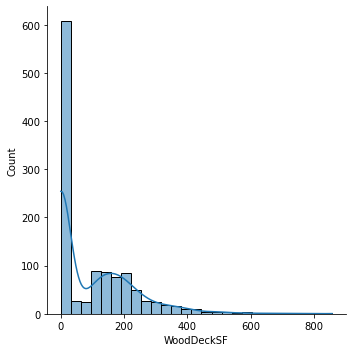

<Figure size 1440x576 with 0 Axes>

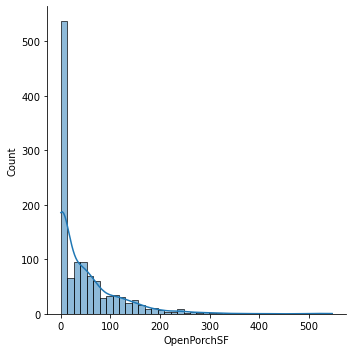

<Figure size 1440x576 with 0 Axes>

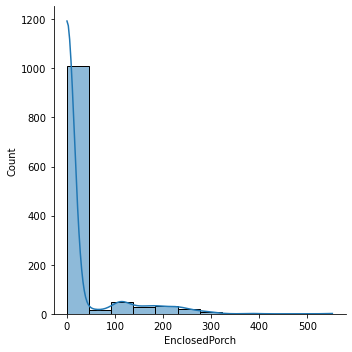

<Figure size 1440x576 with 0 Axes>

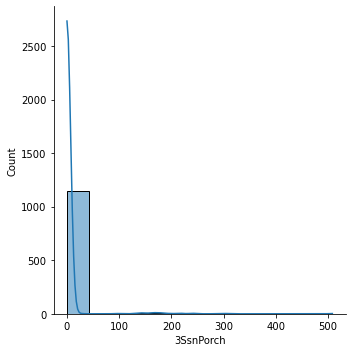

<Figure size 1440x576 with 0 Axes>

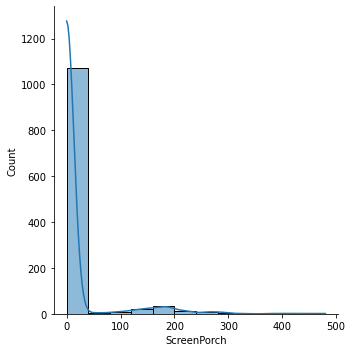

<Figure size 1440x576 with 0 Axes>

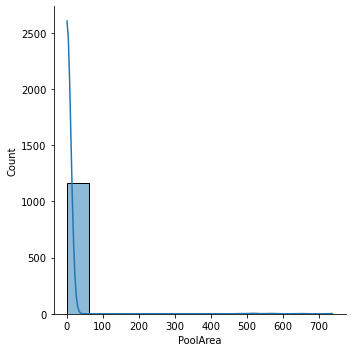

<Figure size 1440x576 with 0 Axes>

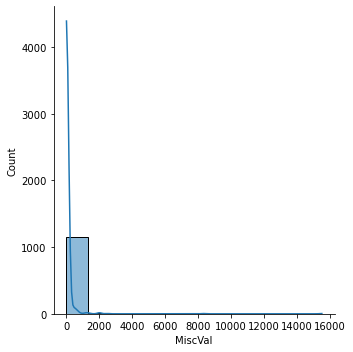

<Figure size 1440x576 with 0 Axes>

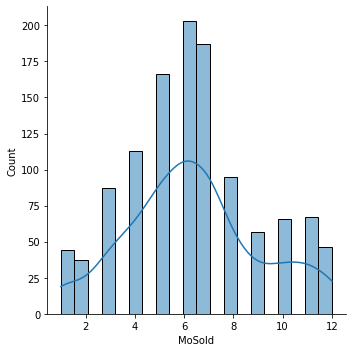

<Figure size 1440x576 with 0 Axes>

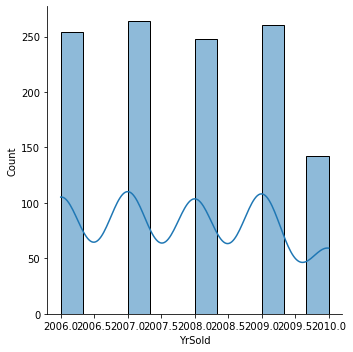

<Figure size 1440x576 with 0 Axes>

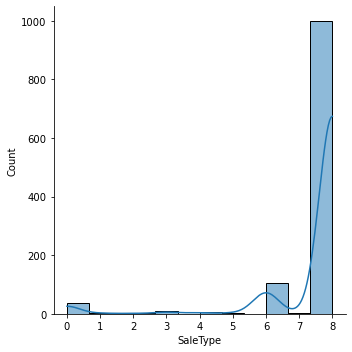

<Figure size 1440x576 with 0 Axes>

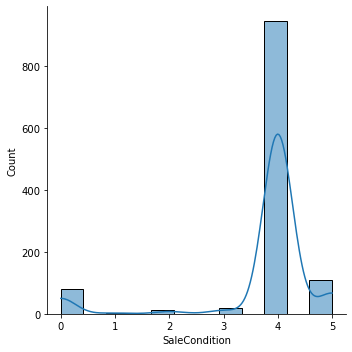

In [51]:
for i in x:
    plt.figure(figsize=(20,8))
    sns.displot(x[i], kde=True)

In [52]:
x.skew()

MSSubClass        1.422019
MSZoning         -1.796785
LotFrontage       2.710383
LotArea          10.659285
Street          -17.021969
LotShape         -0.603775
LandContour      -3.125982
LotConfig        -1.118821
LandSlope         4.812568
Neighborhood      0.043735
Condition1        3.008289
Condition2       11.514458
BldgType          2.318657
HouseStyle        0.285680
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
RoofStyle         1.498560
RoofMatl          7.577352
Exterior1st      -0.612816
Exterior2nd      -0.592349
MasVnrType       -0.104609
MasVnrArea        2.834658
ExterQual        -1.810843
ExterCond        -2.516219
Foundation       -0.002761
BsmtQual         -1.343781
BsmtCond         -3.293554
BsmtExposure     -1.166987
BsmtFinType1     -0.068901
BsmtFinSF1        1.871606
BsmtFinType2     -3.615783
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
Heating          10.103609
H

#### Data is highly skewed. We need to reduce skewness.

### Removing skewness

In [53]:
from sklearn.preprocessing import PowerTransformer

pt=PowerTransformer()

# removing skewness in train data
xs=pt.fit_transform(x)
x=pd.DataFrame(xs,columns=x.columns)

# removing skewness in train data
ts=pt.fit_transform(test)
test=pd.DataFrame(ts,columns=test.columns)

In [54]:
x.skew()

MSSubClass        0.064007
MSZoning          0.233113
LotFrontage       0.161368
LotArea           0.032509
Street          -17.021969
LotShape         -0.594207
LandContour      -2.592303
LotConfig        -1.030401
LandSlope         3.954345
Neighborhood     -0.146541
Condition1        0.225468
Condition2        0.537277
BldgType          1.857194
HouseStyle       -0.080331
OverallQual       0.021658
OverallCond       0.048063
YearBuilt        -0.126641
YearRemodAdd     -0.225131
RoofStyle        -0.292233
RoofMatl         -6.314987
Exterior1st      -0.338023
Exterior2nd      -0.352793
MasVnrType       -0.016203
MasVnrArea        0.416370
ExterQual        -0.605112
ExterCond        -2.270791
Foundation        0.004296
BsmtQual         -0.413999
BsmtCond         -3.025865
BsmtExposure     -0.914214
BsmtFinType1     -0.206639
BsmtFinSF1       -0.404528
BsmtFinType2     -2.420885
BsmtFinSF2        2.394737
BsmtUnfSF        -0.284390
TotalBsmtSF       0.286779
Heating          -4.541694
H

## Scaling

In [55]:
# scaling the data
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler=MinMaxScaler()

# scaling train data
xd=scaler.fit_transform(x)
x=pd.DataFrame(xd,columns=x.columns)

# scaling test data
td=scaler.fit_transform(test)
test=pd.DataFrame(td,columns=test.columns)

In [56]:
x.head()

MSSubClass  MSZoning  LotFrontage   LotArea  Street  LotShape  LandContour  \
0    0.830391  0.554691     0.328447  0.256316     1.0       0.0          1.0   
1    0.000000  0.554691     0.432505  0.492699     1.0       0.0          1.0   
2    0.542392  0.554691     0.420474  0.396442     1.0       0.0          1.0   
3    0.000000  0.554691     0.470981  0.430958     1.0       0.0          1.0   
4    0.000000  0.554691     0.328447  0.502514     1.0       0.0          1.0   

   LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
0   1.000000        0.0      0.610859     0.41988    0.487815       1.0   
1   1.000000        1.0      0.572324     0.41988    0.487815       0.0   
2   0.103558        0.0      0.685987     0.41988    0.487815       0.0   
3   1.000000        0.0      0.648728     0.41988    0.487815       0.0   
4   0.298574        0.0      0.648728     0.41988    0.487815       0.0   

   HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  \
0    0.379856     0.596935     0.613289   0.607531      0.295731   0.626861   
1    0.379856     0.803551     0.722066   0.551199      0.213355   0.000000   
2    0.780072     0.701700     0.613289   0.822032      0.674416   0.626861   
3    0.379856     0.596935     0.722066   0.617258      0.310436   0.912098   
4    0.379856     0.596935     0.821667   0.617258      0.742397   0.626861   

   RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  \
0  0.794357     0.490430     0.530312    0.648792    0.000000   1.000000   
1  0.991186     0.888012     0.898211    0.648792    0.000000   0.340773   
2  0.794357     0.404650     0.372271    0.648792    0.000000   0.340773   
3  0.794357     0.490430     0.530312    0.313121    0.931263   1.000000   
4  0.794357     0.184613     0.173102    1.000000    0.828063   0.340773   

   ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0   1.000000    0.199007  0.471478  1.000000      1.000000      0.000000   
1   0.001106    0.398694  1.000000  0.000177      0.137935      0.000000   
2   1.000000    0.398694  0.471478  1.000000      0.000000      0.449964   
3   1.000000    0.199007  0.471478  1.000000      1.000000      0.239322   
4   1.000000    0.199007  0.471478  1.000000      1.000000      0.000000   

   BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF   Heating  \
0    0.325076      1.000000    0.000000   0.651936     0.279763  0.739155   
1    0.458611      0.107224    0.999976   0.679269     0.475296  0.739155   
2    0.598309      1.000000    0.000000   0.340346     0.287175  0.739155   
3    0.564543      1.000000    0.000000   0.708741     0.415145  0.739155   
4    0.664296      1.000000    0.000000   0.401826     0.374374  0.739155   

   HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0   1.000000         1.0         1.0  0.430955  0.000000           0.0   
1   0.000000         1.0         1.0  0.742886  0.000000           0.0   
2   0.000000         1.0         1.0  0.493438  0.930755           0.0   
3   0.000000         1.0         1.0  0.676654  0.000000           0.0   
4   0.741176         1.0         1.0  0.625234  0.000000           0.0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0   0.372849      0.000000           0.0  0.703947  0.000000      0.271142   
1   0.669731      0.747311           0.0  0.703947  0.000000      0.523174   
2   0.635585      0.747311           0.0  0.703947  0.854202      0.398750   
3   0.604563      0.000000           0.0  0.703947  0.000000      0.398750   
4   0.554790      0.000000           1.0  0.703947  0.000000      0.398750   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
0      0.761142      1.00000      0.410971         1.0    0.567985   
1      0.761142      0.45524      0.664957         1.0    0.567985   
2      0.761142      1.00000      0.664957         1.0    0.567985   
3      0.761142    

In [57]:
test.head()

MSSubClass  MSZoning  LotFrontage   LotArea  Street  LotShape  LandContour  \
0    0.000000  0.673616     0.553513  0.447989     1.0       0.0     0.000421   
1    0.840802  0.673616     0.402786  0.268585     1.0       0.0     1.000000   
2    0.000000  0.673616     0.402786  0.411882     1.0       1.0     1.000000   
3    0.627085  0.673616     0.469927  0.414624     1.0       1.0     0.000000   
4    0.560136  0.673616     0.553513  0.454183     1.0       0.0     1.000000   

   LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
0   0.000000        0.0      0.930577    0.435539         0.0       0.0   
1   0.084023        0.0      0.930577    0.435539         0.0       1.0   
2   1.000000        0.0      0.238829    0.435539         0.0       0.0   
3   1.000000        0.0      0.288664    0.435539         0.0       0.0   
4   0.084023        0.0      0.895272    0.254471         0.0       0.0   

   HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  \
0    0.395458     0.895710     0.540862   0.939266      0.887846   0.968816   
1    0.395458     0.783013     0.540862   0.666540      0.412993   0.743788   
2    0.395458     0.783013     0.540862   0.881539      0.760111   0.968816   
3    0.789762     0.660169     0.824153   0.293021      0.000000   0.743788   
4    0.789762     0.524807     0.540862   0.969248      0.915020   0.743788   

   RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  \
0       0.0     0.713521     0.760940    1.000000    0.874024   0.289613   
1       0.0     0.273931     0.218898    0.681061    0.000000   0.289613   
2       0.0     0.713521     0.760940    0.681061    0.000000   0.289613   
3       0.0     0.366596     0.368883    0.681061    0.000000   1.000000   
4       0.0     0.713521     0.760940    1.000000    0.774823   0.289613   

   ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0        1.0    0.440811  0.000000       1.0      0.115219      0.466845   
1        1.0    0.231921  0.471579       1.0      0.000000      0.466845   
2        1.0    0.440811  0.471579       1.0      0.000000      1.000000   
3        1.0    0.231921  1.000000       1.0      1.000000      0.834676   
4        1.0    0.440811  0.471579       1.0      0.419256      1.000000   

   BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  \
0    0.902688           1.0         0.0   0.579847     0.689026      0.0   
1    0.853602           1.0         0.0   0.292341     0.482711      0.0   
2    0.000000           1.0         0.0   0.950614     0.641136      0.0   
3    0.563610           1.0         0.0   0.458256     0.313700      0.0   
4    0.000000           1.0         0.0   0.671922     0.378343      0.0   

   HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0   0.000000         1.0         1.0  0.878853  0.000000           0.0   
1   0.848849         1.0         1.0  0.691754  0.000000           0.0   
2   0.000000         1.0         1.0  0.839674  0.000000           0.0   
3   0.000000         1.0         1.0  0.445459  0.930271           0.0   
4   0.000000         1.0         1.0  0.466224  0.964515           0.0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0   0.686451      0.797194           0.0  0.671840  0.000000      0.489240   
1   0.502774      0.797194           0.0  0.339328  0.000000      0.159244   
2   0.647952      0.000000           0.0  0.671840  0.000000      0.489240   
3   0.576816      0.000000           0.0  0.339328  0.889877      0.489240   
4   0.689494      0.000000           0.0  0.671840  0.889877      0.657839   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
0           0.0     0.427886      0.690973         1.0    0.675139   
1           0.0     0.427886      0.191446         1.0    0.675139   
2           0.0     0.000000      0.591426         1.0    0.675139   
3           0.0     0.120

## Co-relation

In [58]:
train.corr()

MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
MSSubClass       1.000000  0.007478    -0.336681 -0.124151 -0.035981   
MSZoning         0.007478  1.000000    -0.069661 -0.023328  0.140215   
LotFrontage     -0.336681 -0.069661     1.000000  0.299452 -0.035309   
LotArea         -0.124151 -0.023328     0.299452  1.000000 -0.263973   
Street          -0.035981  0.140215    -0.035309 -0.263973  1.000000   
LotShape         0.104485  0.053655    -0.144523 -0.189201 -0.012941   
LandContour     -0.021387  0.001175    -0.073451 -0.159038  0.105226   
LotConfig        0.076880 -0.027246    -0.192468 -0.152063  0.000153   
LandSlope       -0.014930 -0.023952     0.046051  0.395410 -0.141572   
Neighborhood     0.013918 -0.251833     0.065824  0.010707  0.001420   
Condition1      -0.042474 -0.025651    -0.025581  0.029520  0.002189   
Condition2      -0.044319  0.031959     0.011761  0.040096  0.001406   
BldgType         0.731815 -0.024776    -0.403220 -0.215345 -0.013606   
HouseStyle       0.381585 -0.110991     0.056321 -0.040637  0.016793   
OverallQual      0.070462 -0.134037     0.229218  0.107188  0.057140   
OverallCond     -0.056978  0.189553    -0.047573  0.017513  0.031082   
YearBuilt        0.023988 -0.299732     0.112655  0.005506  0.020292   
YearRemodAdd     0.056618 -0.174586     0.088799  0.027228  0.057866   
RoofStyle       -0.100641  0.000913     0.146222  0.038615 -0.006875   
RoofMatl        -0.032214  0.009719     0.082566  0.194142  0.007889   
Exterior1st     -0.090178 -0.012037     0.087727  0.048265  0.012482   
Exterior2nd     -0.120022  0.005548     0.110762  0.027328  0.014618   
MasVnrType      -0.013252 -0.033521    -0.034388 -0.005204  0.000822   
MasVnrArea       0.027813 -0.063862     0.188758  0.121086  0.024583   
ExterQual       -0.024133  0.184815    -0.169835 -0.057865  0.044509   
ExterCond        0.004186 -0.099269     0.044582  0.011438  0.017738   
Foundation       0.053951 -0.244844     0.090734 -0.021195  0.032701   
BsmtQual        -0.052242  0.123822    -0.176402 -0.075262 -0.031959   
BsmtCond        -0.013220  0.002336     0.043165  0.010165 -0.017190   
BsmtExposure    -0.068192  0.037414    -0.123896 -0.136900  0.065253   
BsmtFinType1     0.017515  0.021518    -0.031507 -0.053584 -0.006420   
BsmtFinSF1      -0.052236 -0.034161     0.228996  0.221851 -0.009066   
BsmtFinType2     0.040573 -0.031322    -0.007509 -0.084713  0.045208   
BsmtFinSF2      -0.062403  0.027055     0.002159  0.056656  0.003550   
BsmtUnfSF       -0.134170 -0.032638     0.113924  0.006600  0.024205   
TotalBsmtSF     -0.214042 -0.058896     0.356107  0.259733  0.016422   
Heating          0.047734  0.051188    -0.026622 -0.020394  0.006981   
HeatingQC       -0.001994  0.119852    -0.078262 -0.003337 -0.047968   
CentralAir      -0.113883 -0.015887     0.077404  0.051182  0.043024   
Electrical       0.045533 -0.079205     0.066868  0.050388  0.038720   
1stFlrSF        -0.227927 -0.033095     0.403436  0.312843  0.011486   
2ndFlrSF         0.300366 -0.048968     0.089675  0.059803  0.040957   
LowQualFinSF     0.053737  0.012098     0.007506 -0.001915  0.007352   
GrLivArea        0.086448 -0.064125     0.374251  0.281360  0.043322   
BsmtFullBath     0.004556 -0.007287     0.094046  0.142387 -0.036483   
BsmtHalfBath     0.008207  0.006345     0.001389  0.059282  0.013788   
FullBath         0.140807 -0.188837     0.171773  0.123197  0.033208   
HalfBath         0.168423 -0.121209     0.047816  0.007271  0.045146   
BedroomAbvGr    -0.013283 -0.001906     0.237199  0.117351  0.027587   
KitchenAbvGr     0.283506  0.026744    -0.002729 -0.013075  0.012304   
KitchenQual     -0.011378  0.111689    -0.174713 -0.064278 -0.012056   
TotRmsAbvGrd     0.051179 -0.031062     0.318771  0.184546  0.038259   
Functional       0.022913 -0.091684     0.039272 -0.033165 -0.015309   
Fireplaces      -0.035792  0.010658     0.230610  0.285983  0.010574   
GarageType       0.077469  0.125155    -0.216237 -0.123

<AxesSubplot:>

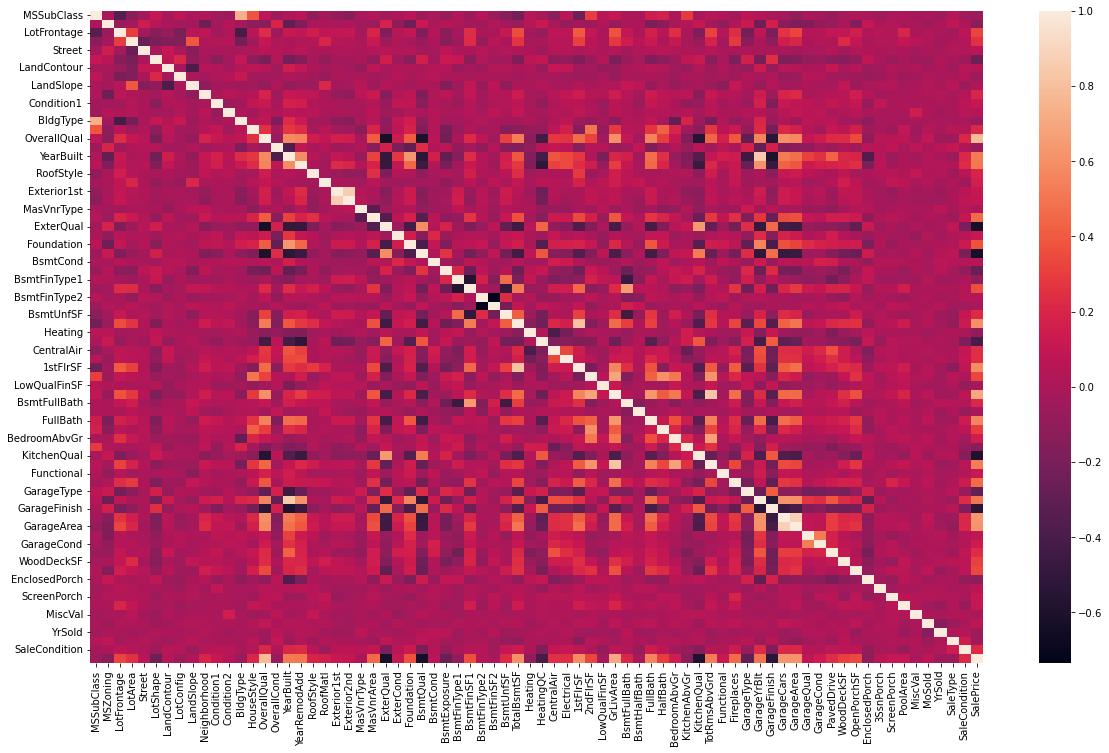

In [59]:
plt.figure(figsize=(20,12))
sns.heatmap(train.corr())

In [60]:
train.corr()['SalePrice']

MSSubClass      -0.060775
MSZoning        -0.133221
LotFrontage      0.323779
LotArea          0.249499
Street           0.044753
LotShape        -0.248171
LandContour      0.032836
LotConfig       -0.060452
LandSlope        0.015485
Neighborhood     0.198942
Condition1       0.105820
Condition2       0.033956
BldgType        -0.066028
HouseStyle       0.205502
OverallQual      0.789185
OverallCond     -0.065642
YearBuilt        0.514408
YearRemodAdd     0.507831
RoofStyle        0.192654
RoofMatl         0.159865
Exterior1st      0.108451
Exterior2nd      0.097541
MasVnrType       0.007732
MasVnrArea       0.463626
ExterQual       -0.624820
ExterCond        0.115167
Foundation       0.374169
BsmtQual        -0.626850
BsmtCond         0.048125
BsmtExposure    -0.268559
BsmtFinType1    -0.092109
BsmtFinSF1       0.362874
BsmtFinType2     0.032285
BsmtFinSF2      -0.010151
BsmtUnfSF        0.215724
TotalBsmtSF      0.595042
Heating         -0.100021
HeatingQC       -0.406604
CentralAir  

In [61]:
x.skew()

MSSubClass        0.064007
MSZoning          0.233113
LotFrontage       0.161368
LotArea           0.032509
Street          -17.021969
LotShape         -0.594207
LandContour      -2.592303
LotConfig        -1.030401
LandSlope         3.954345
Neighborhood     -0.146541
Condition1        0.225468
Condition2        0.537277
BldgType          1.857194
HouseStyle       -0.080331
OverallQual       0.021658
OverallCond       0.048063
YearBuilt        -0.126641
YearRemodAdd     -0.225131
RoofStyle        -0.292233
RoofMatl         -6.314987
Exterior1st      -0.338023
Exterior2nd      -0.352793
MasVnrType       -0.016203
MasVnrArea        0.416370
ExterQual        -0.605112
ExterCond        -2.270791
Foundation        0.004296
BsmtQual         -0.413999
BsmtCond         -3.025865
BsmtExposure     -0.914214
BsmtFinType1     -0.206639
BsmtFinSF1       -0.404528
BsmtFinType2     -2.420885
BsmtFinSF2        2.394737
BsmtUnfSF        -0.284390
TotalBsmtSF       0.286779
Heating          -4.541694
H

#### We will drop columns with high skewness and lower corelation with target.

In [62]:
# for train data
x.drop(['Street','LandContour','LandSlope','BsmtCond','BsmtFinType2','BsmtFinSF2',
        'LowQualFinSF','BsmtHalfBath','GarageQual','3SsnPorch','MiscVal', 'SaleType','PoolArea'], axis=1, inplace=True)

# for test data
test.drop(['Street','LandContour','LandSlope','BsmtCond','BsmtFinType2','BsmtFinSF2',
        'LowQualFinSF','BsmtHalfBath','GarageQual','3SsnPorch','MiscVal','SaleType','PoolArea'], axis=1, inplace=True)

# PCA

In [63]:
from sklearn.decomposition import PCA
pca = PCA().fit(x)

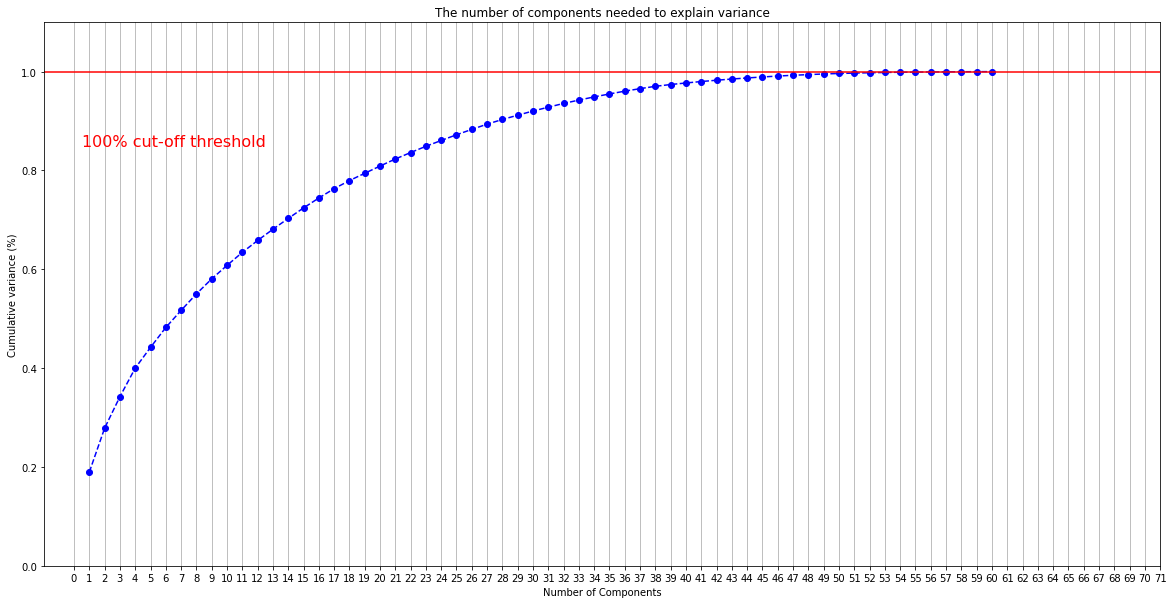

In [64]:
fig, ax = plt.subplots(figsize=(20,10))
xi = np.arange(1, 61, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 72, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=1, color='r', linestyle='-')
plt.text(0.5, 0.85, '100% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

#### We can see with 55 feature we are able to retain most information.

In [65]:
pca=PCA(n_components=55)
xp=pca.fit_transform(x)
xn=pd.DataFrame(xp)
xn.head()

0         1         2         3         4         5         6   \
0 -0.277890 -0.257006  0.322190  0.185692  0.032661  0.925131  0.230429   
1  0.381486 -0.882948 -0.061733 -0.526325  0.609025 -0.641452 -0.196856   
2  0.917723  0.115078  0.859545 -0.494155  0.812493 -0.045460  0.143028   
3  0.257209 -0.578336 -0.092906 -0.407012 -0.860720  0.153112  0.098949   
4  0.537968 -0.855542  0.320952 -0.601114 -0.357694  0.400317  0.013799   

         7         8         9         10        11        12        13  \
0 -0.796550  0.318061 -0.085202 -0.111355  0.055327  0.427051 -0.048753   
1 -0.464658  0.504783  0.183782 -0.230911  1.004036 -0.270677 -0.327186   
2  0.023608 -0.207912 -0.438158  0.021929  0.207271 -0.042422  0.095929   
3 -0.355227  0.263063  0.548149 -0.110302 -0.261676 -0.311440  0.225670   
4  0.005464 -0.222696  0.565547  0.594848 -0.056356  0.312613  0.001599   

         14        15        16        17        18        19        20  \
0  0.446069 -0.477606  0.158645 -0.545951 -0.464537  0.175930  0.529936   
1  0.450866 -0.049906 -0.461349 -0.106221 -0.509382 -0.210034 -0.077149   
2 -0.189426  0.406923 -0.477349 -0.183082  0.045860 -0.332747  0.098817   
3  0.068181  0.211033 -0.087793 -0.694264 -0.281043  0.108309  0.454249   
4  0.003221 -0.005200  0.086632  0.172125 -0.061835  0.841563  0.045624   

         21        22        23        24        25        26        27  \
0 -0.001077 -0.068002  0.152059  0.324140  0.300624 -0.106347 -0.017932   
1 -0.333353  0.433358 -0.087595 -0.058544 -0.431285 -0.012688  0.314714   
2 -0.234904 -0.087677  0.135613  0.197056 -0.055710  0.136364  0.219136   
3 -0.150556 -0.000900  0.054619  0.510963  0.298452 -0.080100  0.017894   
4  0.274198 -0.066191 -0.098297  0.044617  0.149240  0.136917 -0.074464   

         28        29        30        31        32        33        34  \
0  0.041114  0.112684  0.068763  0.006075 -0.033040  0.140355  0.010196   
1  0.019905  0.016527  0.262911 -0.313998 -0.190826  0.197500 -0.019750   
2 -0.118117 -0.323958 -0.072525 -0.226602  0.243168 -0.093667 -0.118968   
3  0.080272  0.110180  0.088895  0.158385 -0.047633  0.038766 -0.066561   
4 -0.041280  0.068693 -0.084022 -0.055046  0.143837 -0.028692  0.066879   

         35        36        37        38        39        40        41  \
0 -0.074812  0.114139 -0.085181  0.125439 -0.013819  0.126737 -0.006366   
1 -0.029375  0.039648  0.380832  0.208630  0.499293 -0.163887 -0.030643   
2  0.037995 -0.118663  0.156540 -0.043202 -0.071049 -0.048333 -0.004854   
3 -0.035077 -0.171580 -0.164228 -0.053438 -0.121966  0.051024 -0.031197   
4  0.467055 -0.022336 -0.104580  0.147686  0.223535 -0.070028 -0.062777   

         42        43        44        45        46        47        48  \
0 -0.048367 -0.065158 -0.002390 -0.049132  0.118217 -0.023360  0.051406   
1  0.085533  0.204225  0.003585 -0.096710 -0.131681 -0.111503 -0.043074   
2  0.029546 -0.008792  0.010471 -0.005393  0.023197  0.027109  0.016738   
3  0.022424 -0.042868 -0.035643  0.010917  0.001387  0.028077  0.049602   
4 -0.033339 -0.024802  0.077709  0.001037  0.001764  0.082502 -0.030355   

         49        50        51        52        53        54  
0 -0.076662 -0.129366 -0.013448 -0.009008 -0.048844  0.009374  
1  0.044519 -0.060521 -0.031463  0.000322  0.001452 -0.043728  
2  0.008762 -0.066590 -0.081722 -0.054047 -0.005818 -0.007771  
3  0.003724 -0.011174 -0.059365 -0.007377  0.036370 -0.012955  
4 -0.004441  0.077409  0.007478 -0.003104 -0.042533  0.029354

In [66]:
pca=PCA(n_components=55)
testp=pca.fit_transform(test)
testn=pd.DataFrame(testp)
testn.head()

0         1         2         3         4         5         6   \
0  1.914412 -0.892921 -0.152342 -0.495919  0.368212 -0.066282  0.279334   
1  0.522173 -0.780945  0.983392  0.123314  1.085831 -0.270471  0.342653   
2  0.980603 -0.151094 -1.233284  0.246157 -0.016305 -0.401129 -0.242060   
3 -0.599523  0.887916  0.014310 -0.109241 -0.302985  0.556104 -0.021978   
4  1.463070  1.031109 -0.258033 -0.613199  0.518961 -0.193346  0.188294   

         7         8         9         10        11        12        13  \
0  0.059075 -0.331545 -0.213135  0.093919 -0.004458  0.107240 -0.210756   
1  0.444628 -0.534270  0.248163 -0.372906  0.051306  0.131536  0.366843   
2  0.656951 -0.282779  0.126195  0.181153 -0.162482 -0.175785  0.178252   
3  0.106593  0.447900  0.215933 -0.188299  0.213793 -0.281026  0.498860   
4 -0.198574 -0.291059  0.052083 -0.138296 -0.165197 -0.198024  0.242578   

         14        15        16        17        18        19        20  \
0 -0.012079 -0.107282 -0.018798 -0.098696  0.091900 -0.263441 -0.229113   
1  0.250463 -0.334084 -0.190882  0.106116 -0.162954  0.135249 -0.195416   
2  0.316189 -0.227050 -0.103071 -0.093243 -0.120479  0.446296  0.508107   
3  0.480712 -0.107435 -0.126372 -0.040871 -0.154816  0.552735  0.225383   
4 -0.050756 -0.057384  0.040362 -0.073433 -0.020574 -0.056842 -0.139385   

         21        22        23        24        25        26        27  \
0  0.016204 -0.012026 -0.049453 -0.159320  0.108043  0.010094  0.097924   
1  0.222631  0.090405 -0.129121 -0.120276  0.245233 -0.206565 -0.020463   
2  0.067648  0.000941  0.005605 -0.153375 -0.250138  0.033912 -0.136878   
3  0.078012 -0.068100 -0.294463 -0.026220 -0.200680  0.064748  0.291073   
4 -0.335651 -0.157104  0.269462 -0.212528  0.050949 -0.333157  0.099439   

         28        29        30        31        32        33        34  \
0  0.059971  0.163362  0.010838 -0.166405  0.044762  0.019812  0.011353   
1 -0.355188 -0.090175  0.272794  0.238167 -0.061269 -0.006459  0.154933   
2 -0.062235 -0.070545  0.058933  0.167732  0.136618 -0.000328  0.017153   
3 -0.256684  0.230302  0.083125 -0.143635  0.422295 -0.104090 -0.084165   
4  0.139323  0.042735 -0.290315 -0.169082 -0.108993 -0.017297  0.088433   

         35        36        37        38        39        40        41  \
0  0.044320 -0.158903  0.097260  0.272935 -0.084965  0.046252 -0.019837   
1  0.229376 -0.123222 -0.043330  0.082069  0.036698  0.027795 -0.173653   
2  0.040683 -0.017318  0.135638 -0.183673  0.013890  0.094079 -0.024976   
3  0.326706 -0.000488 -0.054484 -0.003667  0.091457 -0.009572 -0.046544   
4 -0.133054 -0.075112  0.135852  0.323844  0.027412  0.075953  0.205433   

         42        43        44        45        46        47        48  \
0 -0.013074  0.015587 -0.024225 -0.111083 -0.048117  0.040556 -0.028317   
1  0.096481  0.063574 -0.112647 -0.016329 -0.084340  0.059139  0.046913   
2 -0.056967 -0.071486 -0.076173 -0.069332 -0.091577 -0.044984  0.036759   
3  0.028373  0.037097 -0.090938 -0.100045  0.039605 -0.025541 -0.008727   
4 -0.069277 -0.079566  0.142133  0.088039 -0.029557 -0.128577 -0.047845   

         49        50        51        52        53        54  
0  0.027021  0.023175  0.026101 -0.007760  0.008836 -0.017874  
1 -0.079972 -0.008392 -0.009230  0.010144  0.013918  0.006962  
2  0.049373  0.025854 -0.051415  0.049874 -0.023442  0.042938  
3 -0.069875 -0.033076 -0.004617 -0.042224  0.047122  0.032057  
4 -0.028255 -0.016988  0.036789  0.023665 -0.001177 -0.014237

# ML Modeling

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, max_error, mean_squared_error

# Checking the best random state
lnr=LinearRegression()
for i in range(1,100):
    x_train, x_test, y_train, y_test=train_test_split(xn,y, test_size=0.2, random_state=i)
    lnr.fit(x_train,y_train)
    pred_train=lnr.predict(x_train)
    pred_test=lnr.predict(x_test)
    if r2_score(y_train,pred_train)*100>81.5 and r2_score(y_test,pred_test)*100>81.5:
        print('At random state',i,'the train accuracy is', r2_score(y_train,pred_train))
        print('At random state',i,'the test accuracy is', r2_score(y_test,pred_test))
        print('\n')

At random state 19 the train accuracy is 0.8155270605850127
At random state 19 the test accuracy is 0.8236330859092318


At random state 33 the train accuracy is 0.8158638327122185
At random state 33 the test accuracy is 0.8192472111033362


At random state 55 the train accuracy is 0.8157286956508712
At random state 55 the test accuracy is 0.8228124063475402


At random state 56 the train accuracy is 0.8153412103567637
At random state 56 the test accuracy is 0.8229140193114369


At random state 75 the train accuracy is 0.8170974191051683
At random state 75 the test accuracy is 0.8189827750839296


At random state 89 the train accuracy is 0.8154212763317712
At random state 89 the test accuracy is 0.8216359111681243




#### At random stae=75 we are getting the best accuracy of our model. So we will use random state=75.

## LinearRegression

In [68]:
x_train, x_test, y_train, y_test=train_test_split(xn,y, test_size=0.2, random_state=75)
lnr.fit(x_train,y_train)

pred_test_lnr=lnr.predict(x_test)

print('r2 score', r2_score(y_test,pred_test_lnr))
print('\n max error', max_error(y_test,pred_test_lnr))
print('\n Root mean squared error', mean_squared_error(y_test,pred_test_lnr, squared=False))
print('\n MAPE',(abs((y_test-pred_test_lnr)/y_test).mean())*100)

r2 score 0.8189827750839296

 max error 315386.43660979276

 Root mean squared error 33712.12569326364

 MAPE 13.925965928286562


In [69]:
# Checking for the best value of cross fold
for j in range(2,15):
    cv_score=cross_val_score(lnr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print('At cv=',j, 'cross vallue score is', cv_mean)
    print('Differnce between in r2_score and cross value score', r2_score(y_test,pred_test_lnr)-cv_mean)

At cv= 2 cross vallue score is 0.7701372373291364
Differnce between in r2_score and cross value score 0.04884553775479317
At cv= 3 cross vallue score is 0.7784977951070046
Differnce between in r2_score and cross value score 0.04048497997692502
At cv= 4 cross vallue score is 0.781641900936302
Differnce between in r2_score and cross value score 0.037340874147627545
At cv= 5 cross vallue score is 0.7782034618613342
Differnce between in r2_score and cross value score 0.040779313222595426
At cv= 6 cross vallue score is 0.7845277441038313
Differnce between in r2_score and cross value score 0.03445503098009828
At cv= 7 cross vallue score is 0.7843371908851765
Differnce between in r2_score and cross value score 0.03464558419875308
At cv= 8 cross vallue score is 0.7843303542288915
Differnce between in r2_score and cross value score 0.03465242085503806
At cv= 9 cross vallue score is 0.7881511404399691
Differnce between in r2_score and cross value score 0.030831634643960437
At cv= 10 cross vallue

### At CV=13 we are getting minimum differnce between in r2_score and cross value score

In [86]:
# cross validation for lnr model
cv_score=cross_val_score(lnr,x,y,cv=13)
cv_mean=cv_score.mean()
print('cross val score is', cv_mean)
print('Differnce between in r2_score and cross val score', r2_score(y_test,pred_test_lnr)-cv_mean)

cross val score is 0.7891877459785804
Differnce between in r2_score and cross val score 0.029795029105349147


## Predicting output for test data

In [87]:
# predicting for test set we are given
prediction_lnr=lnr.predict(testn)
prediction_lnr

array([311010.94936028, 212571.81719534, 268437.08751059, 180663.22647393,
       228029.74991285, 115512.15451622, 143259.63155506, 237889.74861919,
       237796.91706727, 172870.46982558, 111914.17414661, 227265.58027843,
        84029.953096  , 355999.05717656, 280299.64657687,  64388.15338745,
        72317.38641733,  85125.36254713, 228218.87209972, 244282.06942747,
        85992.51932638, 225135.97999311, 154326.66671259,  79694.91287859,
        93152.76867198, 133709.46496537, 205592.73374791, 144667.43161203,
       207461.24776541, 122735.67780557, -11127.22757839, 182274.80926792,
       276002.79134779, 219261.19411427, 127978.7493755 , 207577.46897565,
       281311.36392495, 104700.27318787, 177834.61257407, 191758.71492227,
        68162.40061979, 215983.38666502, 248854.0213722 , 194848.76453316,
       210255.38403061, 124178.86134719,  99796.36752231,  54738.67519935,
       255835.81561606, 289903.39111941, 140442.69725683, 177731.05696275,
        45687.42011663, 1

## DecisionTreeRegressor

In [88]:
from sklearn.tree import DecisionTreeRegressor

dtr=DecisionTreeRegressor()
dtr.fit(x_train, y_train)

pred_test_dtr=lnr.predict(x_test)

print('r2 score', r2_score(y_test,pred_test_dtr))
print('\n max error', max_error(y_test,pred_test_dtr))
print('\n Root mean squared error', mean_squared_error(y_test,pred_test_dtr, squared=False))
print('\n MAPE',(abs((y_test-pred_test_dtr)/y_test).mean())*100)

r2 score 0.8189827750839296

 max error 315386.43660979276

 Root mean squared error 33712.12569326364

 MAPE 13.925965928286562


In [90]:
# cross validation for dtr model
cv_score=cross_val_score(dtr, x,y, cv=13)
cv_mean=cv_score.mean()

print('cross val score is', cv_mean)
print('Differnce between in r2_score and cross val score', r2_score(y_test,pred_test_dtr)-cv_mean)

cross val score is 0.7019363831231034
Differnce between in r2_score and cross val score 0.11704639196082622


In [91]:
# predicting for test set we are given
prediction_dtr=dtr.predict(testn)
prediction_dtr

array([325624., 200000., 190000., 154900., 219210., 160000., 141000.,
       266000., 228000., 160200., 117000., 160000., 108480., 158000.,
       262500., 106000., 147000.,  97500., 181000., 262280., 105500.,
       120000., 143750., 127000., 115000., 169000., 155000., 154900.,
       167500.,  58500.,  80000., 195400., 215000., 295000., 121600.,
       272000., 195400., 110500., 171000., 129000., 105500., 242000.,
       187000., 193500., 256000., 120000., 132500., 123000., 235000.,
       380000., 135000., 165000., 104900.,  35311., 267000., 171000.,
       104000., 185000., 158000., 214000., 147000., 180000., 161000.,
       175500., 227000., 144000., 153500., 194500., 124000., 243000.,
       201000.,  75500., 136500.,  96500., 168500., 237000., 354000.,
       153500., 235000., 189950., 183500., 239000., 134500., 207500.,
       179900., 198900., 109000., 611657., 135000., 266000., 220000.,
        75000., 119900., 132000., 181900., 160200., 262500., 176500.,
       380000., 1400

## SVR

In [92]:
from sklearn.svm import SVR

svr=SVR()
svr.fit(x_train, y_train)

pred_test_svr=svr.predict(x_test)

print('r2 score', r2_score(y_test,pred_test_svr))
print('\n max error', max_error(y_test,pred_test_svr))
print('\n Root mean squared error', mean_squared_error(y_test,pred_test_svr, squared=False))
print('\n MAPE',(abs((y_test-pred_test_svr)/y_test).mean())*100)

r2 score -0.05356266627398587

 max error 590935.9881206203

 Root mean squared error 81331.04875626473

 MAPE 32.35590782561008


In [93]:
# cross validation for svr model
cv_score=cross_val_score(svr, x,y, cv=13)
cv_mean=cv_score.mean()

print('cross val score is', cv_mean)
print('Differnce between in r2_score and cross val score', r2_score(y_test,pred_test_svr)-cv_mean)

cross val score is -0.05971803951376769
Differnce between in r2_score and cross val score 0.006155373239781818


In [94]:
# predicting for test set we are given
prediction_svr=svr.predict(testn)
prediction_svr

array([164076.04103621, 164019.43119046, 164051.24802183, 163984.67477543,
       164071.80683273, 163972.61467653, 164008.00034925, 164058.00265019,
       164036.55234085, 164017.4199148 , 163970.84016823, 163980.20989964,
       163963.9650187 , 164010.86960147, 164046.97447434, 163962.12274955,
       163977.66070765, 163953.15063272, 164026.0151052 , 164023.58081581,
       163970.1514408 , 164009.27675143, 163991.65315231, 163984.84330996,
       163954.00965301, 163978.62241641, 164022.2962231 , 163982.26454325,
       164006.61810165, 163965.74688537, 163964.7984876 , 164040.63867352,
       164050.18240006, 163997.15755203, 163979.02679031, 164031.96211053,
       164050.41916479, 163984.19845288, 164002.54534799, 163983.65438057,
       163950.78824059, 164059.38000142, 164063.95435695, 164031.71421298,
       164014.40726853, 163961.7975499 , 163958.35022095, 163963.55368966,
       164055.58676174, 164064.90330901, 163970.72140363, 164020.68421946,
       163951.34180554, 1

## KNN

In [95]:
from sklearn.neighbors import KNeighborsRegressor

knn=KNeighborsRegressor()
knn.fit(x_train, y_train)

pred_test_knn=knn.predict(x_test)

print('r2 score', r2_score(y_test,pred_test_knn))
print('\n max error', max_error(y_test,pred_test_knn))
print('\n Root mean squared error', mean_squared_error(y_test,pred_test_knn, squared=False))
print('\n MAPE',(abs((y_test-pred_test_knn)/y_test).mean())*100)


r2 score 0.7774662948231394

 max error 214293.80000000005

 Root mean squared error 37378.69076964831

 MAPE 15.111943905027786


In [96]:
# cross validation for knn model
cv_score=cross_val_score(knn, x,y, cv=13)
cv_mean=cv_score.mean()

print('cross val score is', cv_mean)
print('Differnce between in r2_score and cross value score', r2_score(y_test,pred_test_knn)-cv_mean)

cross val score is 0.6931798133079993
Differnce between in r2_score and cross value score 0.08428648151514018


In [97]:
# predicting for test set we are given
prediction_knn=knn.predict(testn)
prediction_knn

array([337300. , 180600. , 238629. , 188700. , 187100. , 156850. ,
       138791.8, 281480. , 245080. , 181560. , 134230. , 174380. ,
       114890. , 170780. , 243235.6, 126000. , 123531.6, 125280. ,
       154380. , 253756. , 127000. , 148850. , 137740. ,  86300. ,
       116980. , 139530. , 184698. , 151460. , 211000. ,  98700. ,
       106980. , 199620. , 225495.8, 129580. , 107640. , 192950. ,
       226150. , 109480. , 184560. , 149000. , 112280. , 253000. ,
       190588. , 203860. , 178475. , 116600. , 138940. , 120990. ,
       212180. , 310550. , 132494.2, 200700. , 103296. , 111320. ,
       206400. , 144680. , 123280. , 189178. , 142980. , 204750. ,
       136480. , 271000. , 147550. , 140800. , 182900. ,  95480. ,
       155100. , 207100. , 120711.6, 146100. , 285500. , 128750. ,
       121180. , 147900. , 172200. , 212300. , 316400. , 176220. ,
       265300. , 198560. , 239450. , 124325.2, 140400. , 137580. ,
       193470. , 179457. , 112120. , 262300. , 146900. , 19704

## Random Forest Regressor

In [98]:
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

pred_test_rfr=rfr.predict(x_test)

print('r2 score', r2_score(y_test,pred_test_rfr))
print('\n max error', max_error(y_test,pred_test_rfr))
print('\n Root mean squared error', mean_squared_error(y_test,pred_test_rfr, squared=False))
print('\n MAPE',(abs((y_test-pred_test_rfr)/y_test).mean())*100)

r2 score 0.721559509193331

 max error 347121.18

 Root mean squared error 41811.17586506602

 MAPE 15.564814835312543


In [99]:
# cross validation for rfr model
cv_score=cross_val_score(rfr, x,y, cv=13)
cv_mean=cv_score.mean()

print('cross val score is', cv_mean)
print('Differnce between in r2_score and cross value score', r2_score(y_test,pred_test_rfr)-cv_mean)

cross val score is 0.8412547924798951
Differnce between in r2_score and cross value score -0.11969528328656409


In [100]:
# predicting for test set we are given
prediction_rfr=rfr.predict(testn)
prediction_rfr

array([381825.91, 203065.13, 224245.29, 131739.44, 283518.02, 132767.14,
       160575.45, 285274.34, 224195.05, 181238.42, 116506.08, 137289.27,
       144263.7 , 208248.75, 268452.8 , 111280.98, 131137.52, 129073.5 ,
       183413.12, 204911.9 , 117876.21, 167723.65, 170435.61, 138577.98,
       126959.  , 141786.48, 182041.74, 152054.32, 210207.15, 100367.8 ,
       121596.81, 192258.81, 222402.27, 184150.22, 123474.  , 199249.39,
       230398.38, 115141.87, 173005.16, 133728.7 , 113432.58, 218559.35,
       224403.64, 195879.77, 211375.97, 114819.5 , 126252.92, 112745.04,
       251936.28, 404289.59, 133056.64, 197832.72, 101990.75,  81641.94,
       256063.78, 184033.57, 112336.92, 204092.09, 162212.87, 233970.39,
       132874.  , 249944.39, 132891.69, 184700.98, 245189.89, 119152.03,
       174172.01, 213009.1 , 161743.48, 135001.21, 235832.99, 165668.98,
       126700.49, 116825.37, 206578.48, 210211.64, 344609.61, 178272.92,
       264162.08, 183278.29, 232131.07, 143643.5 , 

# Regularisation

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso

## Ridge

In [102]:
rg=Ridge()
rg.fit(x_train,y_train)

pred_test_rg=rg.predict(x_test)

print('r2 score', r2_score(y_test,pred_test_rg))
print('\n max error', max_error(y_test,pred_test_rg))
print('\n Root mean squared error', mean_squared_error(y_test,pred_test_rg, squared=False))
print('\n MAPE',(abs((y_test-pred_test_rg)/y_test).mean())*100)

r2 score 0.8187686141403463

 max error 328063.05790235195

 Root mean squared error 33732.06215642944

 MAPE 13.341463185508932


In [103]:
# cross validation for rg
cv_score=cross_val_score(rg, x,y, cv=13)
cv_mean=cv_score.mean()

print('cross val score is', cv_mean)
print('Differnce between in r2_score and cross value score', r2_score(y_test,pred_test_rg)-cv_mean)

cross val score is 0.7929581715329479
Differnce between in r2_score and cross value score 0.0258104426073984


In [104]:
# predicting for test set we are given
prediction_rg=rg.predict(testn)
prediction_rg

array([308397.87764544, 213763.53873147, 270036.54484664, 180037.52864129,
       227447.67912764, 116530.05749034, 147108.48785252, 242188.85466778,
       241887.73067821, 170997.53399631, 107268.8911182 , 223060.69568033,
        83477.10552839, 348911.31157249, 278310.51706011,  76184.7954334 ,
        80215.85136461,  88473.70725723, 230562.76571869, 246109.71508283,
        88846.58413559, 223432.46593357, 158473.64624628,  82362.9870234 ,
        96847.82283335, 137210.16403596, 203487.14334961, 140680.58865115,
       205319.12236665, 123311.21109841,  -5820.64625039, 181519.57534212,
       274340.74913113, 211703.18827898, 123040.69179798, 206102.66352464,
       277958.80751252, 107193.91299925, 178886.09153144, 177882.85381296,
        68008.86453793, 218913.2594733 , 247440.73535751, 190166.49746978,
       203295.99572229, 123407.46166631, 112265.80449463,  59202.16470866,
       255409.34914074, 290330.31445485, 134975.854682  , 182387.62432695,
        54720.27666351,  

## Parameter Tuning

In [105]:
parameters={'alpha':[.001,.01,1,10], 'solver':['auto', 'svd', 'saga'],'random_state':list(range(0,10))}

clf=GridSearchCV(Ridge(),parameters)
clf.fit(x_train, y_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 3, 'solver': 'saga'}


In [106]:
rg_reg=Ridge(alpha=10,random_state=3, solver='saga')

rg_reg.fit(x_train, y_train)

pred_test_rg_reg=rg_reg.predict(x_test)

print('r2 score', r2_score(y_test,pred_test_rg_reg))
print('\n max error', max_error(y_test,pred_test_rg_reg))
print('\n Root mean squared error', mean_squared_error(y_test,pred_test_rg_reg, squared=False))
print('\n MAPE',(abs((y_test-pred_test_rg_reg)/y_test).mean())*100)

r2 score 0.7992347351862548

 max error 359359.99359577755

 Root mean squared error 35503.4432209391

 MAPE 12.771244541124732


In [107]:
# cross validation for rg_reg
cv_score=cross_val_score(rg_reg, x,y, cv=13)
cv_mean=cv_score.mean()

print('cross val score is', cv_mean)
print('Differnce between in r2_score and cross value score', r2_score(y_test,pred_test_rg_reg)-cv_mean)

cross val score is 0.7848194836293392
Differnce between in r2_score and cross value score 0.014415251556915587


In [108]:
# predicting for test set we are given
prediction_rg_reg=rg_reg.predict(testn)
prediction_rg_reg

array([302365.23564917, 213358.96567413, 265320.14699136, 172083.08501628,
       231614.97037543, 119335.06230114, 159107.91025401, 250638.91947237,
       252597.07492827, 165743.54595507, 101200.10654624, 207921.68318535,
        83144.13308179, 312196.70373082, 274300.22783701,  93274.21718123,
        95545.74318469,  97139.28931439, 224844.60339325, 248090.9441378 ,
        97479.07630326, 222231.74761375, 166141.52834166,  79538.57279913,
       104302.18637104, 139912.3036354 , 199009.30002087, 140229.70773103,
       202326.40712546, 119259.52799914,  18999.63013317, 186047.71772513,
       265691.55861147, 204388.61028121, 118490.99627751, 207433.51309844,
       271021.63623955, 119259.12019551, 175618.79060749, 159275.33013454,
        77518.44775436, 228562.8160667 , 246810.08577043, 185474.57522515,
       188444.67788689, 123095.6486564 , 125383.88887455,  66228.01987717,
       250730.49237176, 286826.68383828, 123092.92119395, 197380.35078531,
        67451.20647652,  

## Lasso

In [109]:
ls=Ridge()
ls.fit(x_train,y_train)

pred_test_ls=ls.predict(x_test)

print('r2 score', r2_score(y_test,pred_test_ls))
print('\n max error', max_error(y_test,pred_test_ls))
print('\n Root mean squared error', mean_squared_error(y_test,pred_test_ls, squared=False))
print('\n MAPE',(abs((y_test-pred_test_ls)/y_test).mean())*100)

r2 score 0.8187686141403463

 max error 328063.05790235195

 Root mean squared error 33732.06215642944

 MAPE 13.341463185508932


In [110]:
# cross validation for lasso
cv_score=cross_val_score(ls, x,y, cv=13)
cv_mean=cv_score.mean()

print('cross val score is', cv_mean)
print('Differnce between in r2_score and cross value score', r2_score(y_test,pred_test_ls)-cv_mean)

cross val score is 0.7929581715329479
Differnce between in r2_score and cross value score 0.0258104426073984


In [111]:
# predicting for test set we are given
prediction_ls=ls.predict(testn)
prediction_ls

array([308397.87764544, 213763.53873147, 270036.54484664, 180037.52864129,
       227447.67912764, 116530.05749034, 147108.48785252, 242188.85466778,
       241887.73067821, 170997.53399631, 107268.8911182 , 223060.69568033,
        83477.10552839, 348911.31157249, 278310.51706011,  76184.7954334 ,
        80215.85136461,  88473.70725723, 230562.76571869, 246109.71508283,
        88846.58413559, 223432.46593357, 158473.64624628,  82362.9870234 ,
        96847.82283335, 137210.16403596, 203487.14334961, 140680.58865115,
       205319.12236665, 123311.21109841,  -5820.64625039, 181519.57534212,
       274340.74913113, 211703.18827898, 123040.69179798, 206102.66352464,
       277958.80751252, 107193.91299925, 178886.09153144, 177882.85381296,
        68008.86453793, 218913.2594733 , 247440.73535751, 190166.49746978,
       203295.99572229, 123407.46166631, 112265.80449463,  59202.16470866,
       255409.34914074, 290330.31445485, 134975.854682  , 182387.62432695,
        54720.27666351,  

## Parameter Tuning

In [112]:
parameters={'alpha':[.001,.01,1,10],'random_state':list(range(0,10))}

clf=GridSearchCV(Lasso(),parameters)
clf.fit(x_train, y_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [113]:
ls_reg=Lasso(alpha=10,random_state=0)

ls_reg.fit(x_train, y_train)

pred_test_ls_reg=ls_reg.predict(x_test)

print('r2 score', r2_score(y_test,pred_test_ls_reg))
print('\n max error', max_error(y_test,pred_test_ls_reg))
print('\n Root mean squared error', mean_squared_error(y_test,pred_test_ls_reg, squared=False))
print('\n MAPE',(abs((y_test-pred_test_ls_reg)/y_test).mean())*100)

r2 score 0.818494155481501

 max error 317739.2415031061

 Root mean squared error 33757.59458290023

 MAPE 13.836524738387682


In [114]:
# cross validation for lasso
cv_score=cross_val_score(ls_reg, x,y, cv=13)
cv_mean=cv_score.mean()

print('cross val score is', cv_mean)
print('Differnce between in r2_score and cross value score', r2_score(y_test,pred_test_ls_reg)-cv_mean)

cross val score is 0.7904603600580296
Differnce between in r2_score and cross value score 0.028033795423471397


In [115]:
# predicting for test set we are given
prediction_ls_reg=ls_reg.predict(testn)
prediction_ls_reg

array([310691.87162749, 212932.92929548, 268686.13251879, 180478.97498639,
       228344.68590229, 116170.09341347, 143896.06359528, 238643.09179773,
       238733.21926297, 172301.83981501, 109138.85410111, 226154.84507775,
        83869.04594092, 354026.24457639, 279880.83082725,  65794.78906157,
        73411.11437552,  85992.29123845, 228066.84913675, 244113.38021632,
        86084.82046089, 225305.78824248, 155144.01203331,  79713.58090865,
        92826.24958517, 134284.34377548, 205180.07613903, 144201.3056715 ,
       206923.86133722, 122360.84883079,  -9614.81915243, 182261.23035293,
       275602.48118468, 218333.39547986, 127513.07588394, 207299.08269979,
       281076.63605797, 105657.31357946, 177693.23782328, 189752.56676461,
        68767.97713644, 216471.16041932, 248857.57656507, 193864.87256137,
       209209.8469392 , 124152.44177313, 101333.25139864,  55091.75860846,
       255768.05515596, 290121.41923337, 139466.76854237, 179263.04858347,
        47118.73462823,  

# Model Saving

#### Since rg_rg model (Tuned Ridge) is providing us the best accuracy(minimum difference between accuracy and validation score with high accuracy). So we will save the rg_reg model.

In [121]:
import pickle
filename='House_Price.pkl'
pickle.dump(rg_reg, open(filename,'wb'))

# Conclusion

In [124]:
loaded_model=pickle.load(open('House_Price.pkl','rb'))


original=np.array(y_test)
predicted=np.array(loaded_model.predict(x_test))

r2_score(y_test,loaded_model.predict(x_test))

0.7992347351862548

In [125]:
df=pd.DataFrame({'Original':original,'Predicted':predicted})
df

Original      Predicted
0      133000  128483.493874
1      108000  117524.814672
2      220000  255821.744157
3      200000  251082.430709
4      253293  312227.869369
5      134900  124087.443747
6      144000  144201.695247
7      299800  285599.531664
8      109900  129593.547791
9      168000  175279.528205
10     102000   97042.227381
11     279500  257864.965743
12     225000  243831.407643
13     233230  254464.094609
14     107500  114625.770908
15     145000  136930.169969
16      84500  108816.353013
17     160000  158953.622226
18     102776   95937.417607
19     215000  238321.607652
20     165000  170517.118914
21     181134  218029.949070
22     125000   94733.295889
23      92900   77626.091028
24     271000  255460.178892
25     127500  150035.595967
26     124500  131267.259908
27     107500   84826.638548
28     181000  193771.477930
29     143000  140482.196421
30     141000  150640.599931
31     255500  281394.629278
32     287000  290621.813650
33     134450  135564.078915
34     128000  132468.268519
35     163000  194735.652376
36     269790  257052.107551
37     275000  289797.052905
38     165500  189092.616926
39     185000  212109.444125
40     108000   96282.360377
41     180000  182942.974451
42     188500  224016.733800
43     171000  192478.130094
44     287090  271924.233098
45     293077  293697.443089
46     274900  314821.016576
47     114500  105899.445769
48     118858  104211.322474
49     108000  108593.459618
50     117500  157364.038304
51     135500  132881.095795
52     169500  191708.209252
53     132500  125945.663645
54     310000  291019.590772
55     175900  213507.812064
56     260000  245791.945753
57     139900  111494.606581
58     109900   82570.948553
59     155835  216305.034891
60     140000  156356.002600
61     325300  308173.852603
62     110000  104740.274964
63     328000  257783.293146
64     246578  242993.003474
65     214900  246606.062293
66     189000  216276.682105
67     151000  151495.491328
68     175000  182880.495332
69     163500  135187.167708
70     194000  210246.890747
71     178740  188426.626546
72     187500  185776.660292
73     110000  138107.394748
74     257500  241759.103868
75     240000  199378.393779
76     254000  230139.316132
77     176000  160352.151945
78     216000  216323.038233
79     149500  170653.666910
80      66500   98016.753123
81     283463  305078.855393
82      55993  135281.706723
83     160000  164359.627040
84     315500  323096.561538
85     213250  239915.907487
86     137000  121979.035886
87     755000  395640.006404
88     140000  163598.710518
89     159000  206988.685864
90     191000  208913.436450
91     176500  214092.698396
92     131000  144677.172533
93     124900  108879.719092
94     325000  290619.024241
95     213000  241353.781968
96     378500  320692.165118
97     402000  304209.011509
98     106250   72637.941154
99     148000  150518.577886
100    193000  203505.927188
101    239000  196681.433297
102    147000  134331.621178
103    108500  116516.599262
104    297000  299745.633413
105    126000  118570.754247
106    149350  143481.479540
107    222500  255264.523344
108    152000  157927.598232
109    156000  173163.440454
110    117500   99451.920400
111    244000  252497.656208
112    168000  214802.144933
113    250000  297493.814557
114    205000  230778.308856
115    133000  129331.932133
116    192500  219181.970941
117    135960  148146.227760
118    172500  211826.506920
119    225000  193162.334772
120    350000  327773.860835
121    126175  119116.271415
122    112000  149366.838993
123     67000   86902.274310
124    189000  165969.870452
125    193000  187453.492675
126    158000  182333.355441
127    187100  193817.256583
128    176432  192217.360306
129    133900  118827.180864
130    192000  208368.236944
131    250580  211250.220564
132    223000  235041.403320
133    264561  264293.748364
134    242000  247149.516829
135    200100  173328.270401
136    125500  126206.929771
137

# Lets make data frame for results on test data for all the model

In [117]:
df=pd.DataFrame({'LinearRegression':prediction_lnr,
                 'DecisionTreeRegressor':prediction_dtr, 
                 'SVR':prediction_svr,
                 'KNN':prediction_knn, 
                 'Random Forest Regressor':prediction_rfr,
                'Ridge':prediction_rg,
                'tuned_Ridge':prediction_rg_reg,
                'Lasso':prediction_ls,
                'tuned_Lasso':prediction_ls_reg})
df

LinearRegression  DecisionTreeRegressor            SVR       KNN  \
0       311010.949360               325624.0  164076.041036  337300.0   
1       212571.817195               200000.0  164019.431190  180600.0   
2       268437.087511               190000.0  164051.248022  238629.0   
3       180663.226474               154900.0  163984.674775  188700.0   
4       228029.749913               219210.0  164071.806833  187100.0   
5       115512.154516               160000.0  163972.614677  156850.0   
6       143259.631555               141000.0  164008.000349  138791.8   
7       237889.748619               266000.0  164058.002650  281480.0   
8       237796.917067               228000.0  164036.552341  245080.0   
9       172870.469826               160200.0  164017.419915  181560.0   
10      111914.174147               117000.0  163970.840168  134230.0   
11      227265.580278               160000.0  163980.209900  174380.0   
12       84029.953096               108480.0  163963.965019  114890.0   
13      355999.057177               158000.0  164010.869601  170780.0   
14      280299.646577               262500.0  164046.974474  243235.6   
15       64388.153387               106000.0  163962.122750  126000.0   
16       72317.386417               147000.0  163977.660708  123531.6   
17       85125.362547                97500.0  163953.150633  125280.0   
18      228218.872100               181000.0  164026.015105  154380.0   
19      244282.069427               262280.0  164023.580816  253756.0   
20       85992.519326               105500.0  163970.151441  127000.0   
21      225135.979993               120000.0  164009.276751  148850.0   
22      154326.666713               143750.0  163991.653152  137740.0   
23       79694.912879               127000.0  163984.843310   86300.0   
24       93152.768672               115000.0  163954.009653  116980.0   
25      133709.464965               169000.0  163978.622416  139530.0   
26      205592.733748               155000.0  164022.296223  184698.0   
27      144667.431612               154900.0  163982.264543  151460.0   
28      207461.247765               167500.0  164006.618102  211000.0   
29      122735.677806                58500.0  163965.746885   98700.0   
30      -11127.227578                80000.0  163964.798488  106980.0   
31      182274.809268               195400.0  164040.638674  199620.0   
32      276002.791348               215000.0  164050.182400  225495.8   
33      219261.194114               295000.0  163997.157552  129580.0   
34      127978.749375               121600.0  163979.026790  107640.0   
35      207577.468976               272000.0  164031.962111  192950.0   
36      281311.363925               195400.0  164050.419165  226150.0   
37      104700.273188               110500.0  163984.198453  109480.0   
38      177834.612574               171000.0  164002.545348  184560.0   
39      191758.714922               129000.0  163983.654381  149000.0   
40       68162.400620               105500.0  163950.788241  112280.0   
41      215983.386665               242000.0  164059.380001  253000.0   
42      248854.021372               187000.0  164063.954357  190588.0   
43      194848.764533               193500.0  164031.714213  203860.0   
44      210255.384031               256000.0  164014.407269  178475.0   
45      124178.861347               120000.0  163961.797550  116600.0   
46       99796.367522               132500.0  163958.350221  138940.0   
47       54738.675199               123000.0  163963.553690  120990.0   
48      255835.815616               235000.0  164055.586762  212180.0   
49      289903.391119               380000.0  164064.903309  310550.0   
50      140442.697257               135000.0  163970.721404  132494.2   
51      177731.056963               165000.0  164020.684219  200700.0   
52       45687.420117               104900.0  163951.341806  103296.0   
53      100137.013829                35311.0  163958.567083  11